# E-commerce — Выявление профилей потребления интернет-магазина товаров для дома и быта «Пока все ещё тут».

**Цель исследования:**

Необходимо провести исследовательский анализ данных транзакций интернет-магазина товаров для дома и быта «Пока все ещё тут», категоризировать товары по содержанию, а также сегментировать покупателей на основе истории их покупок, проверить статистические гипотезы о различиях в среднем чеке и количестве заказов по сегментам покупателей. 

На основании полученных сегментов покупателей выработать рекомендации менеджменту интернет-магазина по разработке персонализированных предложений для покупателей.

**Исходные данные:**

Датасет с  транзакциями интернет-магазина товаров для дома и быта «Пока все ещё тут» (/datasets/ecom_dataset_upd.csv):

* date — дата заказа;
* customer_id — идентификатор покупателя;
* order_id — идентификатор заказа;
* product — наименование товара;
* quantity — количество товара в заказе;
* price — цена товара.

**Материалы:**

Презентация [https://disk.yandex.ru/i/QflZbtmfqxHqMg] 

**Ход исследования::**
1. Обзор данных.


2. Предобработка данных:
- Обработка пропусков;
- Обработка дубликатов;
- Преобразование типов данных;
- Добавление новых столбцов:   выручка, год, месяц, день

3. Исследовательский анализ данных (EDA):
- Анализ выбросов и аномалий;
- Анализ коммерческих показателей интернет-магазина;
- Оценка пользовательской активности (DAU, MAU);
- Категоризация наименований товаров, в т.ч.:
сезонность продаж, выручка, средний чек и среднее количество товарных позиций по каждой категории товаров.

4. Сегментация покупателей на основе истории покупок:
- Сегментации по покупкам на основе анализа RFM;
- Обобщение полученных сегментов в группы;
- Анализ полученных групп по категориям товара/сезонности.

5. Проверка статистических гипотез:
- Посчитаем статистическую значимость различий в среднем чеке между сегментами покупателей;
  * Нулевая гипотеза H₀: Нет различий в среднем чеке между сегментами покупателей.
  * Альтернативная гипотеза H₁: Есть различия в среднем чеке между сегментами покупателей.
- Посчитаем статистическую значимость различий в количестве заказов между сегментами покупателей;
  * Нулевая гипотеза H₀: Нет различий в количестве заказов между сегментами покупателей.
  * Альтернативная гипотеза H₁: Есть различия в количестве заказов между сегментами покупателей.
  
6. Общий вывод и рекомендации по разработке персонализированных предложений






## Обзор данных.


In [1]:
# импортируем библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import math as mth
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from scipy import stats as st
import plotly.express as px
from plotly import graph_objects as go



# снимаем ограничение на количество столбцов
pd.set_option('display.max_colwidth', None)
# игнорируем предупреждения
pd.set_option('chained_assignment', None)  
import warnings
warnings.filterwarnings(action = 'ignore') 
# Отображение числовых данных в читаемом виде
pd.options.display.float_format = '{:.2f}'.format


In [2]:
# открываем файл 
try:
    df = pd.read_csv('/datasets/ecom_dataset_upd.csv')
    
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/ecom_dataset_upd.csv')

In [3]:
## Выведем общую инфо 
print(f'Файл с данными о транзакциях интернет-магазина товаров для дома и быта «Пока все ещё тут» состоит из \
{df.shape[0]} строк в {df.shape[1]} столбцах.')

Файл с данными о транзакциях интернет-магазина товаров для дома и быта «Пока все ещё тут» состоит из 7474 строк в 6 столбцах.


In [4]:
## Получим более детальную инфо по датасету
display(df.head())
print('*'*100)
display('Количество уникальных покупателей:', df['customer_id'].nunique())
print('*'*100)
display('Количество уникальных заказов:', df['order_id'].nunique())
print('*'*100)
display('Количество уникальных наименований товаров:', df['product'].nunique())
print('*'*100)
print('Количество пропусков =',df.isna().sum())
print('*'*100)
df.info()
print('Количество дубликатов =', df.duplicated().sum(), ',что составляет', round(df.duplicated().sum()/len(df)*100,2), '%')
print('*'*100)
display(df.columns)
print('*'*100)
display(df.describe().T)
print()

date                           customer_id  order_id  \
0  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                              product  quantity  price  
0     Комнатное растение в горшке Алое Вера, d12, h30         1 142.00  
1  Комнатное растение в горшке Кофе Арабика, d12, h25         1 194.00  
2                         Радермахера d-12 см h-20 см         1 112.00  
3                    Хризолидокарпус Лутесценс d-9 см         1 179.00  
4                      Циперус Зумула d-12 см h-25 см         1 112.00

****************************************************************************************************


'Количество уникальных покупателей:'

2451

****************************************************************************************************


'Количество уникальных заказов:'

3521

****************************************************************************************************


'Количество уникальных наименований товаров:'

2343

****************************************************************************************************
Количество пропусков = date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB
Количество дубликатов = 0 ,что составляет 0.0 %
****************************************************************************************************


Index(['date', 'customer_id', 'order_id', 'product', 'quantity', 'price'], dtype='object')

****************************************************************************************************


count          mean       std           min           25%  \
date     7474.00 2018912614.03 427887.84 2018100100.00 2019021713.00   
order_id 7474.00      49449.88  32679.64      12624.00      14833.00   
quantity 7474.00          2.36     14.50          1.00          1.00   
price    7474.00        478.74    901.62          9.00         97.00   

                   50%           75%           max  
date     2019051409.00 2019063013.00 2020013115.00  
order_id      68768.00      71257.75     112789.00  
quantity          1.00          1.00       1000.00  
price           135.00        439.00      14917.00

**Вывод по п.1 Обзор данных**

1. Файл с данными о  транзакциях интернет-магазина товаров для дома и быта «Пока все ещё тут» состоит из 7474 строк в 6 столбцах;

2. Количество уникальных покупателей:2451;

3. Количество уникальных заказов:3521;

4. Пропуски в данных отсутствуют;

5. Явные дубликаты отсутствуют;

6. Датасет хранит 2 строковых столбца, 1 численный и 3 целочисленных. Необходимо поменять тип данных в столбце date с object на datetime;

7. В столбцах quantity и price очень большой разброс значений, скорее всего, присутствуют выбросы.

## Предобработка данных

### Обработка пропусков

In [5]:
print(df.isna().sum())

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64


Пропуски в данных отсутствуют.

### Обработка дубликатов

**Проверка на явные дубликаты**

In [6]:
# Проверка на явные дубликаты
print('Количество явных дубликатов =', df.duplicated().sum(), ',что составляет', round(df.duplicated().sum()/len(df)*100,2), '%')

Количество явных дубликатов = 0 ,что составляет 0.0 %


**Проверка на неявные дубликаты**

In [7]:
# Редактируем столбец  ['product']
# Приведем значения к нижнему регистру
df['product'] = df['product'].str.lower()
# Заменим ё на е
df['product'] = df['product'].str.replace('ё','е', regex=True) 


In [8]:
# Посмотрим, есть ли  дубликаты по совпадениям в  столбцах ['customer_id', 'order_id', 'product']
duplicates_count=df.duplicated(subset=['product','customer_id', 'order_id']).sum()
print('Количество неявных дубликатов составило:', duplicates_count)

Количество неявных дубликатов составило: 1886


In [9]:
# Посчитаем долю дубликатов
duplicates_ratio=duplicates_count/len(df)
print(f'Доля неявных дубликатов от общего количества записей: {round(duplicates_ratio,2)}') 

Доля неявных дубликатов от общего количества записей: 0.25


Количество неявных дубликатов  1886, что составляет 25% от общего количества записей.
Возможно, дубликаты образовались на одном из этапов обработки заказа. Либо произошел технический сбой.
Удалим дубликаты.


In [10]:
# Удалим строки-дубликаты, оставив первые значения
df.drop_duplicates(subset=['product','customer_id', 'order_id'], keep='first', inplace=True)

In [11]:
df.duplicated(subset=['product','customer_id', 'order_id']).sum()

0

Было удалено 1886 неявных дубликатов по совпадению в столбцах ['product','customer_id', 'order_id'].

Проверим, чтобы одному номеру заказа соответствовал только 1 покупатель.

In [12]:
# Сгруппируем датафрейм по номеру заказа и подсчету числа покупателей
df_grouped = df.groupby('order_id')['customer_id'].nunique()
# Выведем инфо по заказам, где количество покупателей > 1
duplicated_orders = df_grouped[df_grouped > 1]
print(duplicated_orders.value_counts())
duplicated_orders

2    26
3     2
4     1
Name: customer_id, dtype: int64


order_id
14872    2
68785    2
69283    2
69310    2
69345    2
69410    2
69485    3
69531    2
69833    2
70114    2
70542    2
70631    2
70726    2
70808    2
70903    2
70946    2
71054    2
71226    2
71461    2
71480    3
71542    2
71571    2
71648    2
71663    2
72188    2
72778    2
72790    2
72845    4
72950    2
Name: customer_id, dtype: int64

Итого 28 заказов, которым соответствует более 1 покупателя, в т.ч. 26 заказов по 2 покупателя, 2 заказа по 3 покупателя и 1 заказ 4 покупателя.
Удалим их из датасета.

In [13]:
# Удалим из датасета заказы, соответствующие нескольким клиентам
df = df[~df['order_id'].isin(duplicated_orders)]  

### Преобразование типов данных

Поменяем тип данных в столбце date с object на datetime.

In [14]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H') 
df.head()

date                           customer_id  order_id  \
0 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                              product  quantity  price  
0     комнатное растение в горшке алое вера, d12, h30         1 142.00  
1  комнатное растение в горшке кофе арабика, d12, h25         1 194.00  
2                         радермахера d-12 см h-20 см         1 112.00  
3                    хризолидокарпус лутесценс d-9 см         1 179.00  
4                      циперус зумула d-12 см h-25 см         1 112.00

In [15]:
print('Датасет содержит информацию о транзакциях интернет-магазина за период с', df['date'].min(), 'по', df['date'].max())

Датасет содержит информацию о транзакциях интернет-магазина за период с 2018-10-01 00:00:00 по 2020-01-31 15:00:00


In [16]:
print('Период данных:', df['date'].max()-df['date'].min())

Период данных: 487 days 15:00:00


Датасет с транзакциями интернет-магазина товаров для дома и быта «Пока все ещё тут» содержит данные с 1 октября 2018 года по 31 января 2020 года (487 дней).

### Добавление новых столбцов

**Столбец revenue**

In [17]:
# Добавим столбец с данными по выручке
df['revenue']=df['quantity']*df['price']

**Столбцы ['date'], ['month'], ['year']**

In [18]:
# Переименуем столбец date на datetime и создадим новые столбцы с информацией о днях ['date'],\
# месяце['month'] и годе ['year'] транзакций интернет-магазина
df.rename(columns={'date': 'datetime'}, inplace=True)
df['date'] = df['datetime'].dt.date
df['month'] = df['datetime'].dt.strftime('%Y-%m')
df['year'] = df['datetime'].dt.year
df.head()

datetime                           customer_id  order_id  \
0 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                              product  quantity  price  \
0     комнатное растение в горшке алое вера, d12, h30         1 142.00   
1  комнатное растение в горшке кофе арабика, d12, h25         1 194.00   
2                         радермахера d-12 см h-20 см         1 112.00   
3                    хризолидокарпус лутесценс d-9 см         1 179.00   
4                      циперус зумула d-12 см h-25 см         1 112.00   

   revenue        date    month  year  
0   142.00  2018-10-01  2018-10  2018  
1   194.00  2018-10-01  2018-10  2018  
2   112.00  2018-10-01  2018-10  2018  
3   179.00  2018-10-01  2018-10  2018  
4   112.00  2018-10-01  2018-10  2018

**Вывод по п.2 Предобработка данных:**

**Пропуски:**
* Пропуски в данных отсутствуют.

**Дубликаты:**

*  Явные дубликаты в датасете отсутствуют;
*  Было удалено 1886 неявных дубликатов (25% от общего количества записей) по совпадению в столбцах ['product','customer_id', 'order_id'];
*  Было удалено 28 заказов, которым соответствует более 1 покупателя, в т.ч. 26 заказов по 2 покупателя, 2 заказа по 3 покупателя и 1 заказ 4 покупателя.

**Преобразование типов данных:**
* Тип данных в столбце date был изменен с object на datetime.

Датасет с транзакциями интернет-магазина товаров для дома и быта «Пока все ещё тут» содержит данные с 1 октября 2018 года по 31 января 2020 года (487 дней).

**Добавление новых столбцов:**

Добавили 4 новых столбца в датасет: 
* столбец revenue с данными по выручке;
* новые столбцы с информацией о днях ['date'], месяце['month'] и годе ['year'] транзакций интернет-магазина.


## Исследовательский анализ данных (EDA)

### Анализ выбросов и аномалий

**Данные  о количестве товаров**

In [19]:
df['quantity'].describe()

count   5588.00
mean       2.60
std       16.45
min        1.00
25%        1.00
50%        1.00
75%        1.00
max     1000.00
Name: quantity, dtype: float64

Наблюдается большой разброс в количестве купленного товара- 25%, 50% и 75% перецентили составляют 1 товар, однако среднее значение -2,6 товара и стандартное отклонение 16.45. Также есть всплески - максимальное количество товаров в заказе 1000 шт.

Построим боксплот.

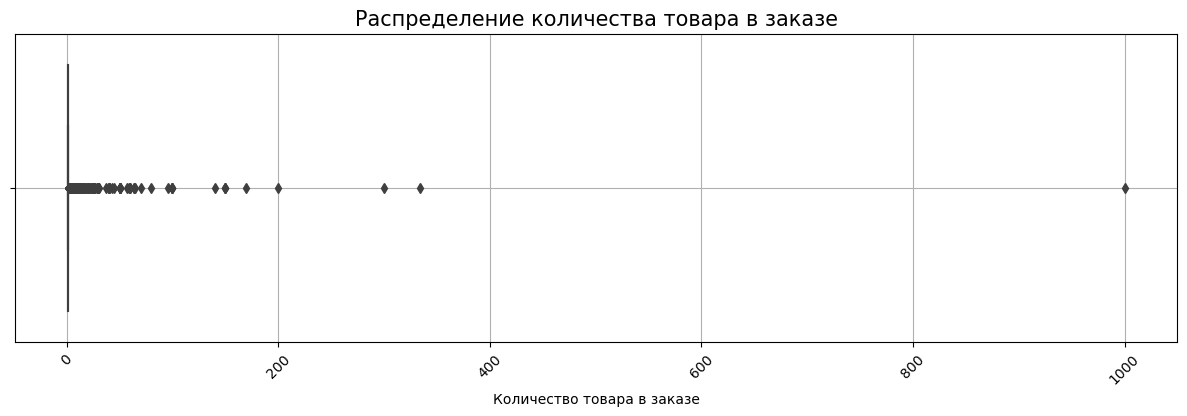

In [20]:
plt.figure(figsize=(15, 4))

ax = sns.boxplot(x='quantity', data=df) 

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение количества товара в заказе',fontsize=15)
plt.xlabel('Количество товара в заказе')

# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)

plt.grid()

plt.show()

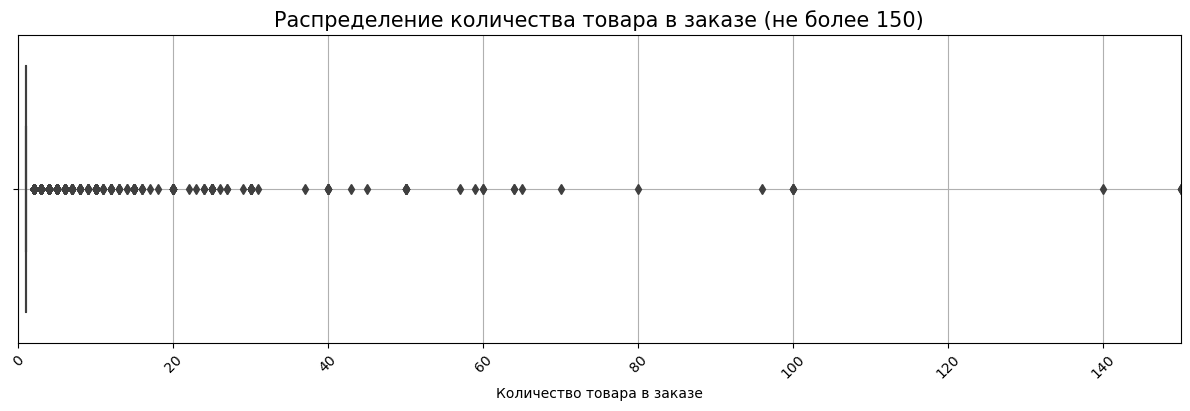

In [21]:
plt.figure(figsize=(15, 4))

ax = sns.boxplot(x='quantity', data=df) 

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение количества товара в заказе (не более 150)',fontsize=15)
plt.xlabel('Количество товара в заказе')

# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)

# ограничиваем ось x для наглядности
plt.xlim(0,150)
plt.grid()

plt.show()

In [22]:
max_quantity = df['quantity'].quantile(.99)
max_quantity

30.0

Не более чем 1% транзакций интернет-магазина, имеют больше 30 наименований товара в корзине. Посмотрим, что это за товары и примем решение, удалять или нет.

In [23]:
df.query('quantity > @max_quantity')['product'].unique()

array(['крючок одежный 2-х рожковый серый металлик с полимерным покрытием *тонар*, 1110027',
       'набор вешалок для костюма 45см 4шт цвет: кремовый, attribute, ahp224',
       'стяжка оконная с болтом ст-55 цинк, 1108354',
       'крепеж для пружины дверной, 1107055',
       'пружина дверная 240 мм оцинкованная (д-19 мм) без крепления, 1107014',
       'петля приварная гаражная d 14х90 мм с шаром, 1103003',
       'щетка для посуды *мила* sv3182 1807009',
       'щетка-утюжок с ручкой миди, standart, york, g1126',
       'муляж яблоко 9 см красное',
       'набор ножей attribute chef 5 предметов akf522',
       'щетка для посуды *оля*, мультипласт 1807010',
       'ручка-скоба рс-100 белая *трибатрон*, 1108035',
       'тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия',
       'муляж яблоко зеленый 9 см полиуретан',
       'вешалка valiant для брюк и юбок металлическая 30*10.5 см 121b11',
       'щетка для мытья посуды колибри м5202 большая',
  

In [24]:
# Посмотрим, какой товар закупили по самому большому заказу
df.query('quantity > 999')['product'].unique()

array(['вантуз с деревянной ручкой d14 см красный, burstenmann, 0522/0000'],
      dtype=object)

Возможно, заказ совершали мелкие оптовики либо были проведены совместные закупки либо закупались большие семьи на проведение ремонта и т.д. Скорее всего, такой заказ больше не повторится. Удалим его из датасета.

In [25]:
df=df.query('quantity < 999')

**Стоимость заказа**

In [26]:
df['price'].describe()

count    5587.00
mean      531.26
std       973.32
min         9.00
25%        90.00
50%       150.00
75%       524.00
max     14917.00
Name: price, dtype: float64

Наблюдается большой разброс в цене товара- среднее значение -531.26, в то время как медианное значение составляет 150, стандартное отклонение 973.32, что говорит о наличии выбросов. Максимальная цена товара составляет 14 917.

Построим боксплот.

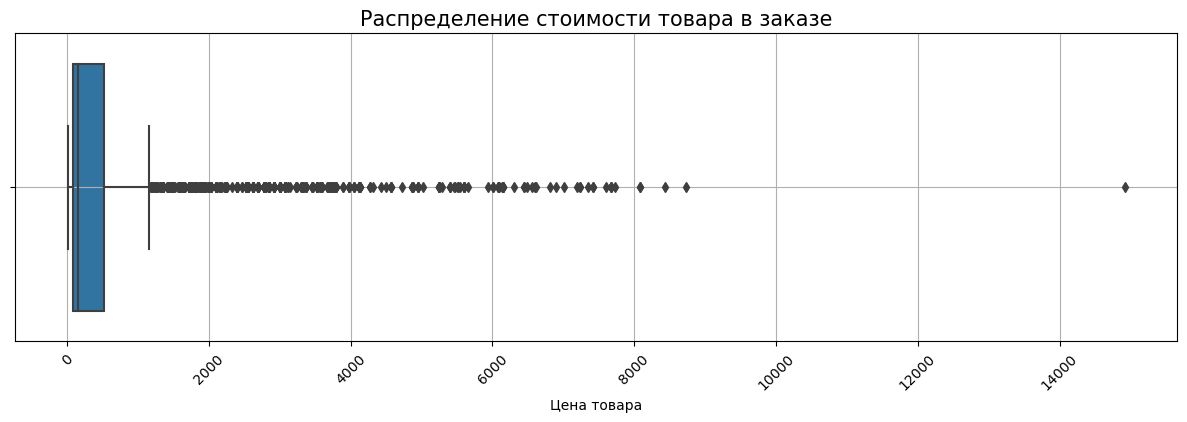

In [27]:
plt.figure(figsize=(15, 4))

ax = sns.boxplot(x='price', data=df) 

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение стоимости товара в заказе',fontsize=15)
plt.xlabel('Цена товара')

# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)

plt.grid()

plt.show()

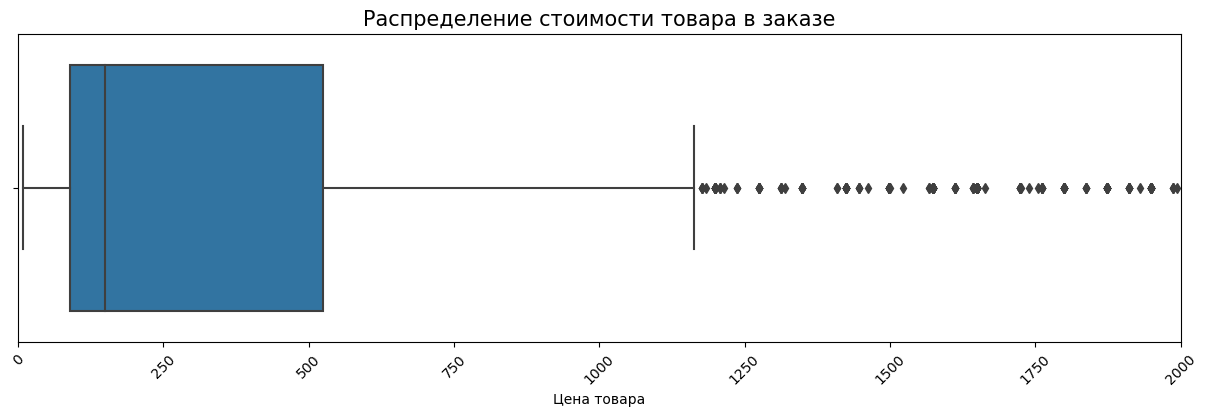

In [28]:
plt.figure(figsize=(15, 4))

ax = sns.boxplot(x='price', data=df) 

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение стоимости товара в заказе',fontsize=15)
plt.xlabel('Цена товара')

# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)

# ограничиваем ось x для наглядности
plt.xlim(0,2000)
plt.grid()


plt.grid()

plt.show()

In [29]:
# Посмотрим, какие товары стоят дороже 75% перцентиля 524
df.query('price > 524')['product'].unique()

array(['настенная сушилка для белья gimi brio super 100',
       'чехол для гладильной доски colombo persia beige 130х50 см из хлопка 5379',
       'сушилка для белья потолочная zalger lift basic 1520 200 см, 10 м',
       'сковорода алюминиевая с антипригарным покрытием marble alpenkok d = 26 см ak-0039a/26n',
       'сушилка для белья напольная colombo star 18, 3679',
       'доска гладильная eurogold professional 130х48 см металлическая сетка 35748w',
       'чехол для гладильной доски festival 137x60 см из хлопка 4738',
       'сумка-тележка 2-х колесная gimi argo синяя',
       'ерш для туалета с подставкой malibu фарфор 47х12,5 см белый, spirella, 1001768',
       'котел алюминиевый 70,0 л без крышки балезино, хозлэнд, 1502050',
       'сушилка для белья attribute прима 11 м синяя напольная adp410',
       'коврик придверный 45х75см. с рельефным рисунком "welcome", коричневый, cr005',
       'корзина пластиковая для белья 60л. с крышкой бежевая 1860/2, виолет',
       'сушилка дл

In [30]:
len(df.query('price > 524')['product'].unique())

681

Имеется 681 единица разнопланового ассортимента товара, стоимость которых превышает 524 (75% перцентиль).

In [31]:
# Посчитаем 95-й и 99-й перцентили стоимости товаров
print('95-й перцентиль стоимости товаров:',np.percentile(df['price'],95))
print('99-й перцентиль стоимости товаров:',np.percentile(df['price'],99))

95-й перцентиль стоимости товаров: 2399.0
99-й перцентиль стоимости товаров: 5249.0


In [32]:
# Посмотрим, какие товары стоят дороже 2399 (95-й перцентиль)
len(df.query('price > 2399')['product'].unique())

143

In [33]:
df.query('price > 2399')['product'].unique()

array(['доска гладильная eurogold professional 130х48 см металлическая сетка 35748w',
       'ерш для туалета с подставкой malibu фарфор 47х12,5 см белый, spirella, 1001768',
       'котел алюминиевый 70,0 л без крышки балезино, хозлэнд, 1502050',
       'сумка-тележка хозяйственная andersen scala shopper plus, elba, черная 133-051-80',
       'сумка-тележка хозяйственная rolser jet cuadro mh joy серо-желтая, jet019 marengo joy',
       'стремянка алюминиевая hailo 4302-301 livingstep comfort plus 2 ступенчатая алюминиевая',
       'сумка-тележка 3-х колесная gimi tris floral синяя',
       'сумка-тележка хозяйственная andersen scala shopper, elba, черная 112-051-80',
       'сумка-тележка хозяйственная rolser jet c. capri joy синяя, jet017 azul joy',
       'стремянки colombo leonardo 3 ступени g300a03w черая 3649',
       'афеляндра скуарроса дания микс в кашпо с автополивом',
       'гладильная доска sarayli orion 130x44 см',
       'мусорный контейнер hailo profiline solid 14 0514-

In [34]:
# Посмотрим, какие товары стоят дороже 5249 (99-й перцентиль)
len(df.query('price > 5249')['product'].unique())

35

In [35]:
df.query('price > 5249')['product'].unique()

array(['сумка-тележка хозяйственная rolser imx005 marengo logic dos+2 серая',
       'сумка-тележка хозяйственная rolser mou041 malva rd6 сиреневая',
       'коврик для ванной комнаты gobi полиэстер 120х70 см темно-зеленый, spirella, 1012778',
       'покрывало жаккард karna стеганое kalven 260x260 см наволочки 50х70 см 2 шт 8681914002162',
       'сумка-тележка хозяйственная andersen treppensteiger scala shopper, hera, черная 119-004-80',
       'гладильная доска leifheit airboard compact m plus 120х38 см малиновый 71630',
       'сумка-тележка хозяйственная rolser pack gloria logic rg серая, pac036 marengo logic rg',
       'комплект для мытья полов из нержавеющей стали и пластика clean twist mop зеленый: швабра-моп + ведро 20 л с механизмом отжима, l',
       'мусорный контейнер hailo bigbin swing 45 0845-010 45 л хром',
       'сиденье для гладильной доски leifheit niveau, 71325',
       'сумка-тележка хозяйственная andersen alu star shopper, hava, синяя 115-103-90',
       'сушилк

* Наблюдается большой разброс в цене товара- среднее значение -531.26, в то время как медианное значение составляет 150, стандартное отклонение 973.32, что говорит о наличии выбросов. Максимальная цена товара составляет 14 917;
* Имеется 681 единица разнопланового ассортимента товара, стоимость которых превышает 524 (75% перцентиль);
* Не более 5% товаров стоят 2399 (143 ед. товара),  Не более 1% товаров стоят 5249 (35 ед. товара). Скорее всего, это товары премиальной цены. Не будем их удалять из датасета, так как можем потерять важную информацию касательно премиальных товаров.



**Аномалии в датах заказов**

Поищем, есть ли такие заказы, которым соответствует несколько дат одновременно.

In [36]:
# Сгруппируем датафрейм по номеру заказа и посчитаем количество дат, относящихся к нему
multiple_orders=(df.groupby('order_id')
                 .agg(nunique=('date', 'nunique'))
                .sort_values(by='nunique', ascending=False)
                .query('nunique > 1')
                .reset_index()
                )
print(f'Количество заказов, которым соответствует несколько дат одновременно, составляет: {len(multiple_orders)}')         

Количество заказов, которым соответствует несколько дат одновременно, составляет: 34


34 уникальных id заказов, даты которых повторяются. Так как мы не знаем точную дату совершения заказа, оставим наиболее позднюю дату.

In [37]:
# Фильтруем исходный DataFrame, оставляя только данные по последним датам для заказов с несколькими датами
df = df[~df['order_id'].isin(multiple_orders)].groupby('order_id').last().reset_index()

**Покупатели с аномальным количеством заказов**

In [38]:
print('Количество уникальных покупателей:', df['customer_id'].nunique())

Количество уникальных покупателей: 2429


In [39]:
ordersByUsers=(df.groupby('customer_id')
                 .agg(count_orders=('order_id', 'nunique'))
                .sort_values(by='count_orders', ascending=False)
                .reset_index()
                )
ordersByUsers.head()

customer_id  count_orders
0  c971fb21-d54c-4134-938f-16b62ee86d3b           126
1  4d93d3f6-8b24-403b-a74b-f5173e40d7db            35
2  73d1cd35-5e5f-4629-8cf2-3fda829d4e58            17
3  b7b865ab-0735-407f-8d0c-31f74d2806cc             7
4  0184f535-b60a-4914-a982-231e3f615206             5

Построим диаграмму рассеяния количества заказов на покупателя

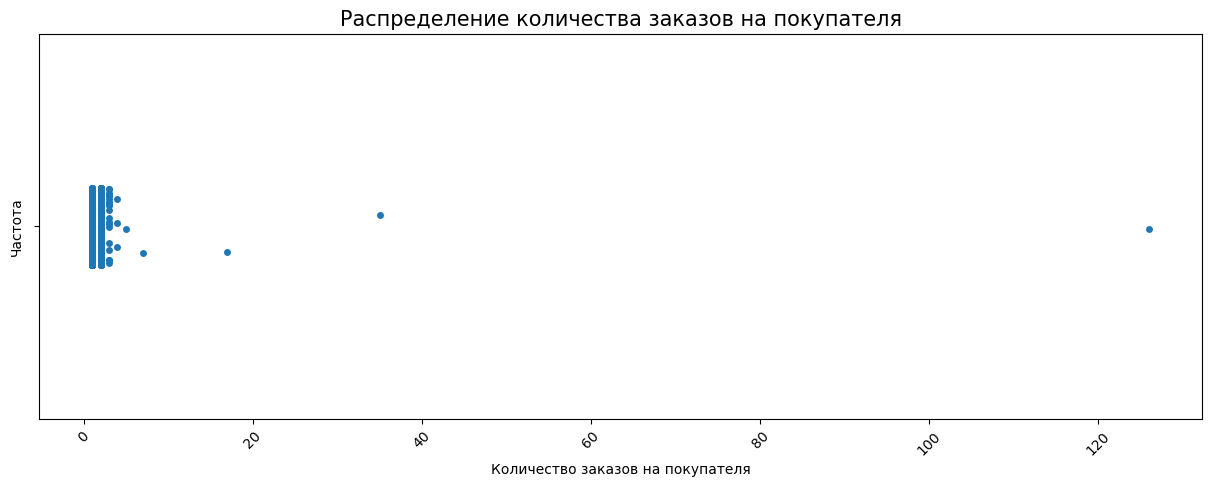

In [40]:
# назначаем размер графика
plt.figure(figsize=(15, 5))
sns.stripplot(x='count_orders', data=ordersByUsers) 
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение количества заказов на покупателя',fontsize=15)
plt.xlabel('Количество заказов на покупателя')
plt.ylabel('Частота')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)


# Отображение графика
plt.show()

In [41]:
# Посчитаем 95-й и 99-й перцентили количества заказов по покупателелям 
print('95-й перцентиль количества заказов на покупателя:',np.percentile(ordersByUsers['count_orders'],95))
print('99-й перцентиль количества заказов на покупателя:',np.percentile(ordersByUsers['count_orders'],99))

95-й перцентиль количества заказов на покупателя: 2.0
99-й перцентиль количества заказов на покупателя: 3.0


Как видно из графика стрипплот, а также из расчета 95-й и 99-й перцентилей не более 1% покупателей совершает более 3-х заказов, не более 5% покупателей совершает более 2-х заказов. 
Можно установить в качестве нижней границы количества заказов на покупателя 3 заказа.
Выясним, сколько покупателей совершили более 3-х заказов.

**Следут отметить, что значения 95-го и 99-го перцентилей показывают крайне низкую "возвращаемость" покупателей в интернет-магазин.**

In [42]:
abnormalCustomers = pd.concat([ordersByUsers[ordersByUsers['count_orders']>3]['customer_id']], axis = 0)
print('Всего покупателей, совершивших более 3-х , ',len(abnormalCustomers),'человек.')

Всего покупателей, совершивших более 3-х ,  8 человек.


Возможно, это клиенты оптовики или клиенты, осуществляющие совместные закупки.
Будем иметь их в виду при разработке персонализированных предложений.

### Анализ коммерческих показателей интернет-магазина

**Сезонность продаж**

In [43]:
# Сгруппируем датасет по дате и посчитаем количество заказов 
orders_unique = (df.groupby(df['month'])
                 .agg(count_orders=('order_id', 'count'))
                 .reset_index()
                )
orders_unique


month  count_orders
0   2018-10           239
1   2018-11           204
2   2018-12           282
3   2019-01           165
4   2019-02           288
5   2019-03           246
6   2019-04           265
7   2019-05           182
8   2019-06           160
9   2019-07           198
10  2019-08           174
11  2019-09           181
12  2019-10           204
13  2019-11           217
14  2019-12           246
15  2020-01           269

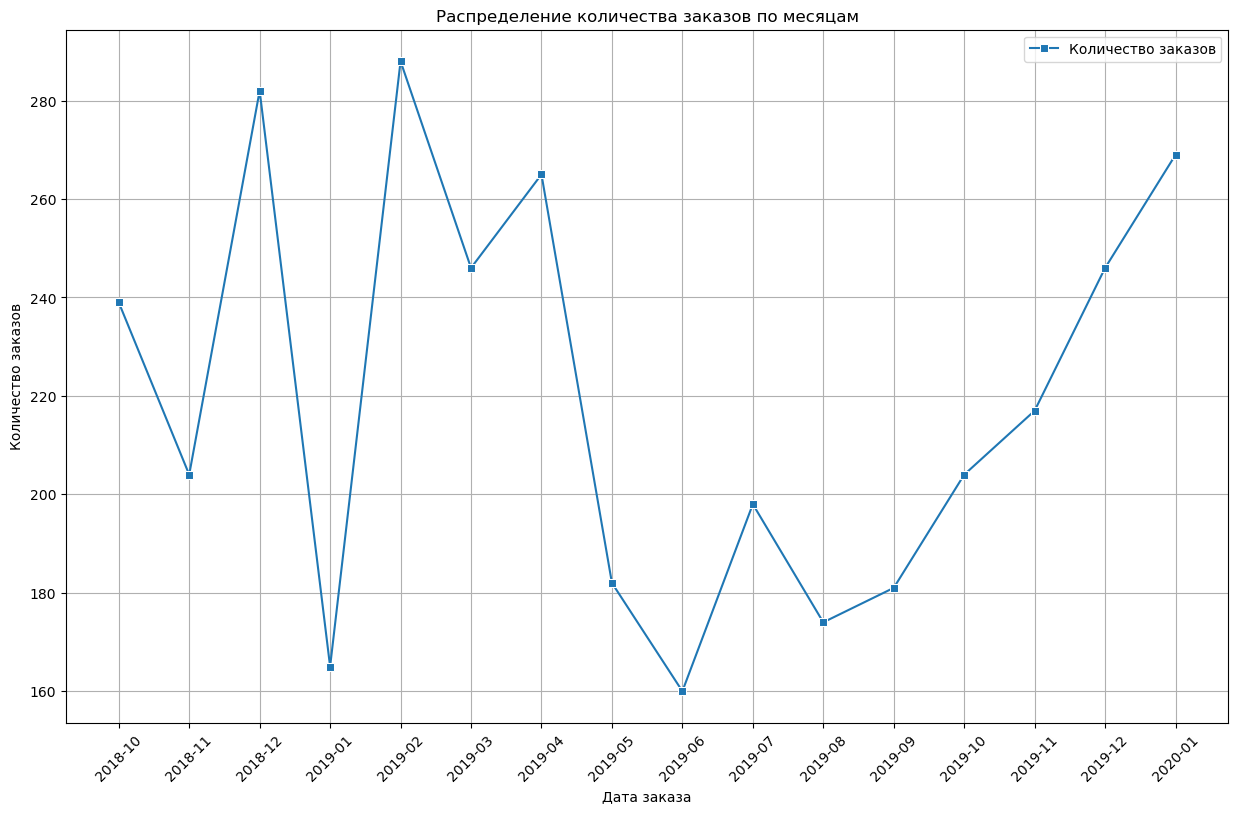

In [44]:
# Построим график
plt.figure(figsize=(15, 9))

sns.lineplot(data=orders_unique,x = 'month',  y='count_orders', marker='s', label='Количество заказов')
                   
# Настройка заголовка и подписей осей
plt.title('Распределение количества заказов по месяцам', fontsize=12)
plt.xlabel('Дата заказа')
plt.ylabel('Количество заказов')

# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)

plt.grid()
# Отображение гистограммы
plt.show()

На графике виден всплеск количества заказов в декабре 2018, феврале 2019 года. Начиная с апреля 2019 года по сентябрь 2019 года количество заказов снижается с небольшим увеличением заказов в июле 2019 года и с октября наблюдается постепенный рост вплоть до января 2020 года.

Видимо, покупатели интернет-магазина предпочитают сезонные закупки впрок.

Менеджменту магазина стоить задуматься о стимулировании спроса покупателей в застойные месяцы, например, посредством предложения скидок на товары, рассылки персонализированных предложений.


**Выручка**

Посмотрим на динамику по выручке.

In [45]:
# Сгруппируем данные в датасете по году, месяцу и посчитаем сумму и среднее по выручке
df_revenue = df.pivot_table(index=['month'],values='revenue',aggfunc=['sum', 'median'])
# Переименовываем столбцы
df_revenue.columns = ['revenue_sum','avg_revenue' ]
# Сбрасываем индексы
df_revenue.reset_index()

month  revenue_sum  avg_revenue
0   2018-10    249676.00       637.00
1   2018-11    267124.00       637.00
2   2018-12    340618.00       715.50
3   2019-01    229130.00       598.00
4   2019-02    294072.00       542.00
5   2019-03    229786.00       524.00
6   2019-04    256595.00       370.00
7   2019-05    150006.00       220.50
8   2019-06    202941.00       437.50
9   2019-07    218278.00       527.00
10  2019-08    166968.00       554.00
11  2019-09    175016.00       598.00
12  2019-10    208121.00       520.50
13  2019-11    128791.75       187.00
14  2019-12    202885.33       195.00
15  2020-01    174036.33       188.00

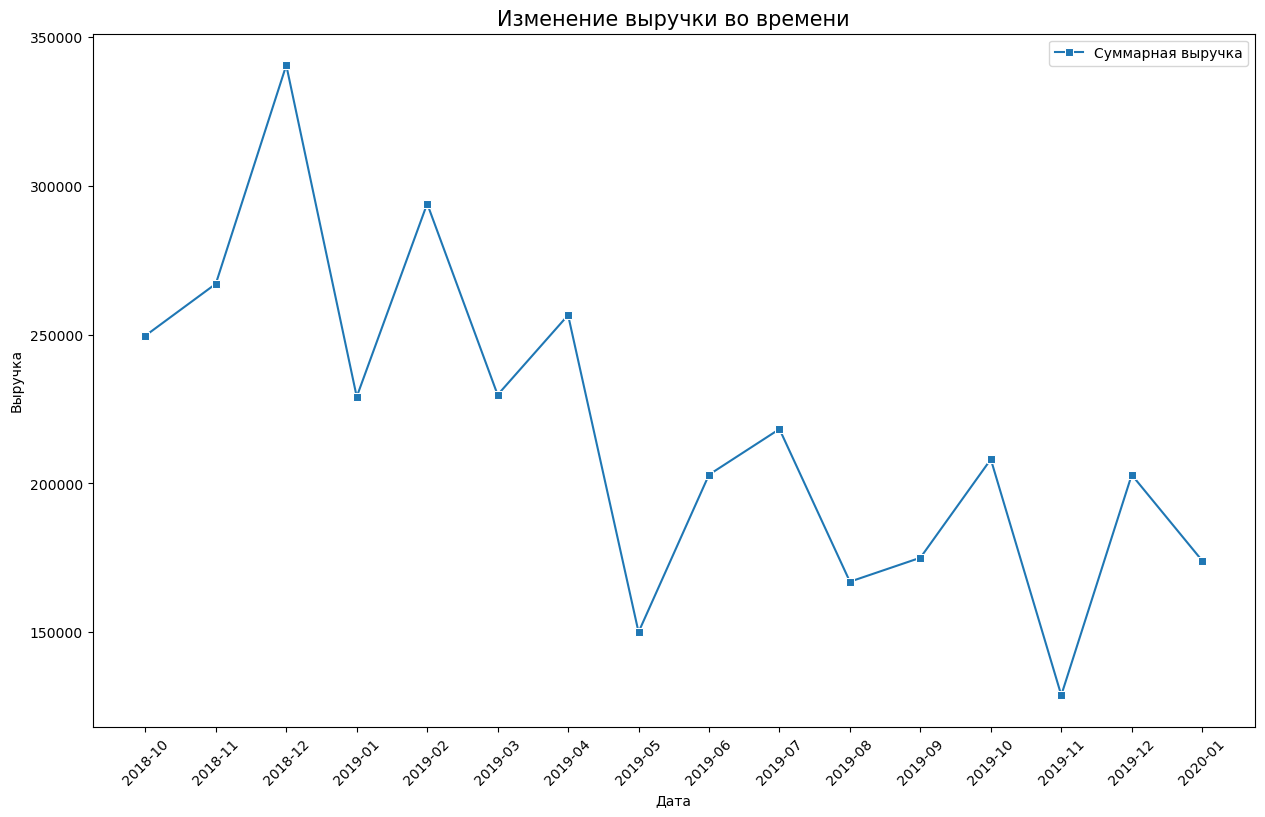

In [46]:
# Построим график
plt.figure(figsize=(15, 9))

sns.lineplot(x='month', y='revenue_sum', data=df_revenue, marker='s', label='Суммарная выручка')

# Настройка заголовка и подписей осей
plt.title('Изменение выручки во времени', fontsize=15)
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation=45)  # Поворот подписей по оси X на 45 градусов
plt.legend()

# Отображение графика
plt.show()



В течение всего периода наблюдается зигзагообразное (небольшие всплески через каждые 2-3 месяца) падение выручки с продаж к текущему периоду.

Темп роста продаж = (выручка янв 2020г / выручка янв 2020г) * 100 = (174036.33 / 229130.00) * 100 = 75,96%. Динамика роста выручки с продаж отрицательная.


Построим график, отображающий изменение средней выручки во времени. Чтобы исключить влияние выбросов, возьмем медианное значение.

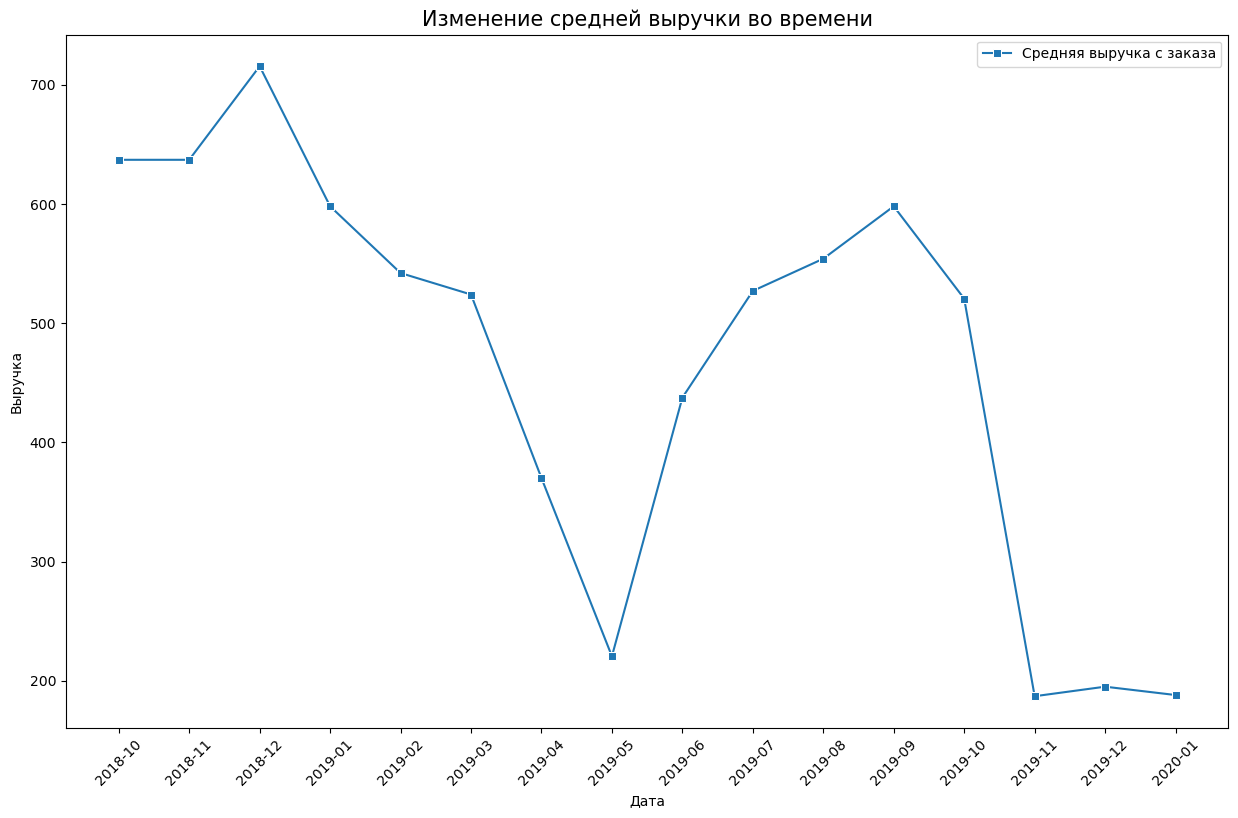

In [47]:
# Построение lineplot
plt.figure(figsize=(15, 9))

sns.lineplot(x='month', y='avg_revenue', data=df_revenue, marker='s', label='Средняя выручка с заказа')

# Настройка заголовка и подписей осей
plt.title('Изменение средней выручки во времени', fontsize=15)
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation=45)  # Поворот подписей по оси X на 45 градусов
plt.legend()

# Отображение графика
plt.show()


Динамика средней выручки по медиане демонстрирует резкий спад средней выручки  в мае 2019 года и ноябре 2019 года- январе 2020 года.

Для увеличения прибыльности интернет-магазина необходимо провести более тщательный анализ покупателей интернет-магазина по покупкам и выработать персонализированные рекомендации для каждой из категорий на увеличение количества покупок и среднего выручки.

### Оценка пользовательской активности (DAU, MAU)

Рассчитаем метрики пользовательской активности — количество уникальных активных пользователей за определённое время:
* *DAU* — количество уникальных пользователей в день;
* *MAU* — количество уникальных пользователей в месяц.

In [48]:
# Сгруппируем данные по дате и месяцу, посчитаем количество уникальных пользователей по столбцу customer_id и найдём среднее
dau_total = (
    df.groupby('date').agg({'customer_id': 'nunique'}).mean()
)

mau_total = (
    df.groupby(['month'])
    .agg({'customer_id': 'nunique'})
    .mean()
)
print(f'Среднее кол-во уникальных покупателей в день: {int(dau_total)}')
print(f'Среднее кол-во уникальных покупателей в месяц: {int(mau_total)}')

Среднее кол-во уникальных покупателей в день: 6
Среднее кол-во уникальных покупателей в месяц: 200


In [49]:
# Также посчитаем регулярность использования интернет-магазина (sticky factor) для месячной аудитории — DAU/MAU
print(f'Месячная аудитория: {int(dau_total/mau_total*100)}')

Месячная аудитория: 3


Показатели пользовательской активности низкие. 
Для увеличения прибыльности интернет-магазина необходимо сегментировать покупателей по покупкам и разработать  персонализированные предложения для целей увеличения прибыльности бизнеса, а также необходимо совместно с маркетологами разработать и внедрить маркетинговые активности для привлечения новых клиентов.

In [50]:
dau = (
    df.groupby('date').agg({'customer_id': 'nunique'})
    .reset_index()
)


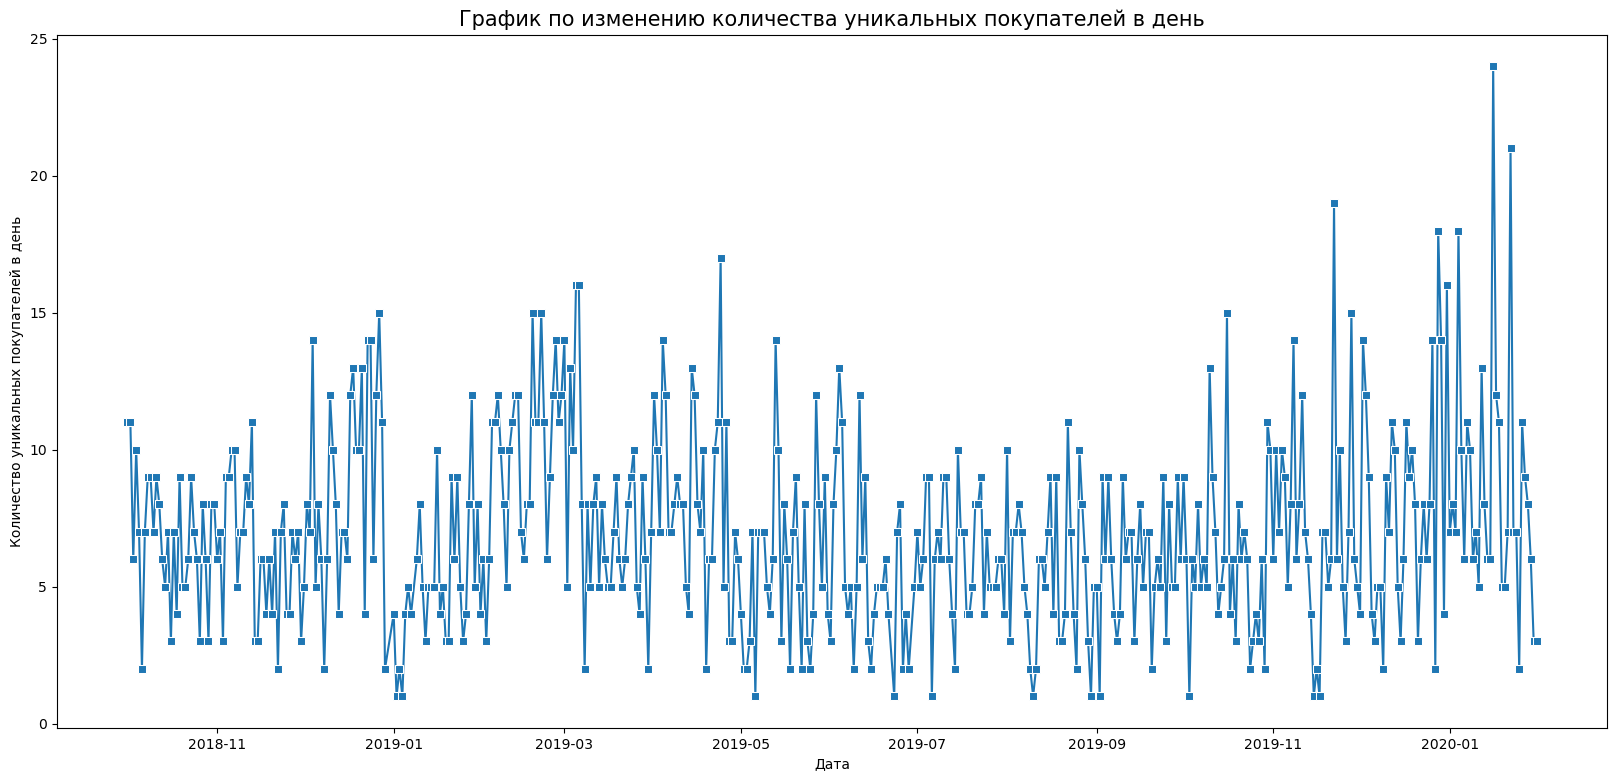

In [51]:
# Построение графика по изменению количества уникальных покупателей в день
plt.figure(figsize=(20, 9))
sns.lineplot(data=dau, x='date', y='customer_id', marker='s')

# Настройка заголовка и подписей осей
plt.title('График по изменению количества уникальных покупателей в день', fontsize=15)
plt.xlabel('Дата')
plt.ylabel('Количество уникальных покупателей в день')

# Отображение тепловой карты
plt.show()

In [52]:
mau = (
    df.groupby('month').agg({'customer_id': 'nunique'})
    .reset_index()
)


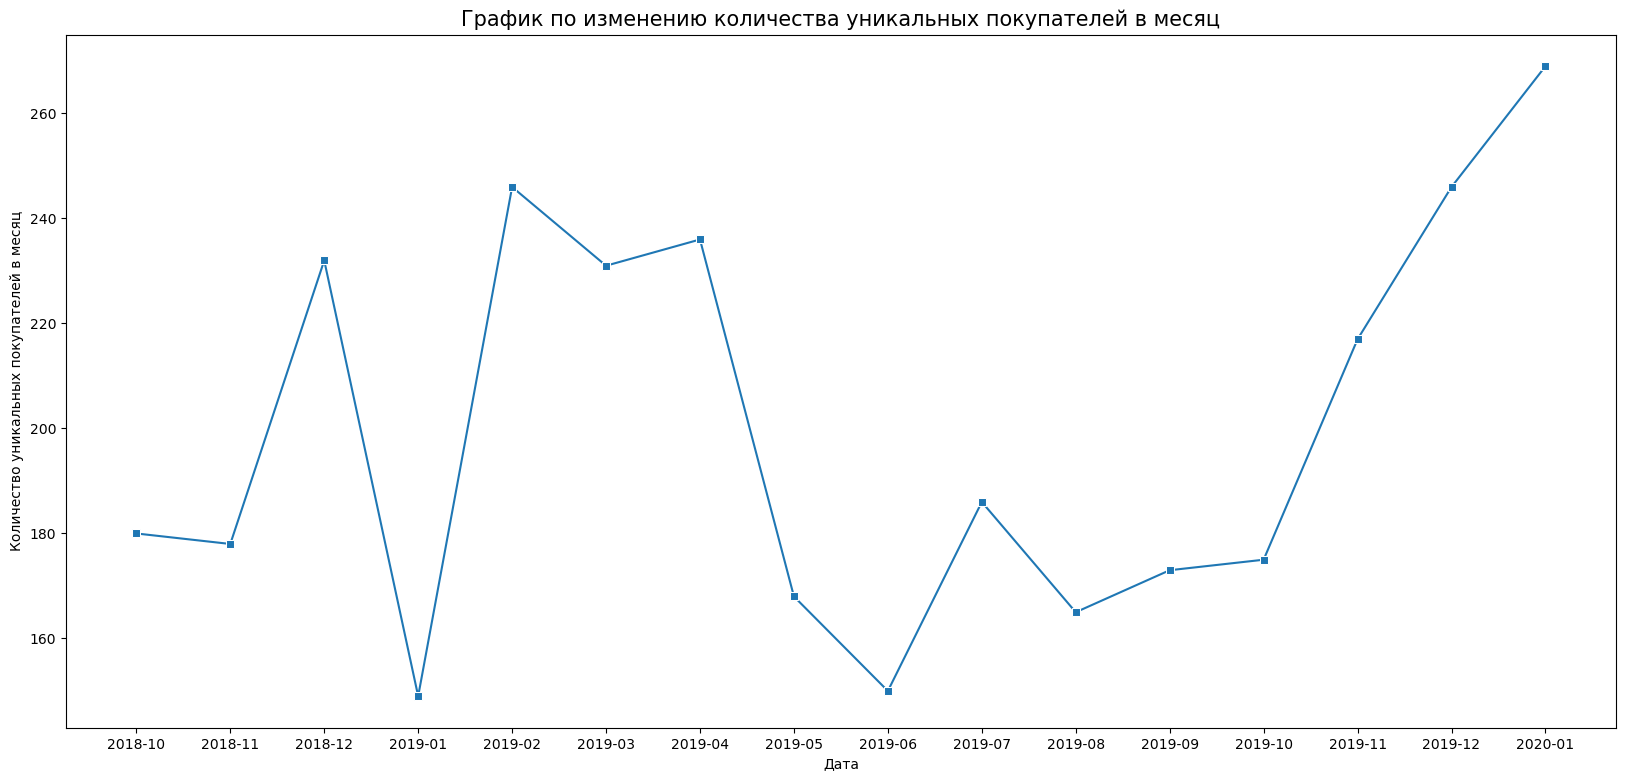

In [53]:
# Построение графика по изменению количества уникальных покупателей в месяц
plt.figure(figsize=(20, 9))
sns.lineplot(data=mau, x='month', y='customer_id', marker='s')

# Настройка заголовка и подписей осей
plt.title('График по изменению количества уникальных покупателей в месяц', fontsize=15)
plt.xlabel('Дата')
plt.ylabel('Количество уникальных покупателей в месяц')

# Отображение тепловой карты
plt.show()

Оценка пользовательской активности:
* Среднее кол-во уникальных покупателей в день (DAU): 6;
* Среднее кол-во уникальных покупателей в месяц (MAU): 200;
* Регулярность использования интернет-магазина (sticky factor) для месячной аудитории — DAU/MAU: 3%.

По метрикам  DAU и MAU и липкому фактору sticky factor  DAU/MAU показатели низкие, очевидно, что новые покупатели у интернет-магазина нечастое явление. Менеджменту магазина необходимо задуматься о проведении маркетинговых активностей/ разработке персонализированных предложений по разным сегментам покупателей.

### Категоризация наименований товаров

In [54]:
print('Количество уникальных наименований товаров:', df['product'].nunique())

Количество уникальных наименований товаров: 1763


Проведем категоризацию товаров по группам для дальнейшего детального анализа каждой из них.

Для категоризации выделим из столбца product первые дня слова, далее образуем словарь из ключевых слов, чтобы разделить все товары на категории.

In [55]:
# Разделение текста в столбце product на слова и выбор первых двух слов
df['first_two_words'] = df['product'].apply(lambda x: ' '.join(x.split()[:2]))


In [56]:
df['first_two_words'].value_counts()

сушилка для                    294
сумка-тележка хозяйственная    131
гладильная доска               128
пеларгония розебудная          120
пеларгония зональная           104
                              ... 
гербера комнатная                1
совок и                          1
кодонанта укорененный            1
весы настольные                  1
молодило в                       1
Name: first_two_words, Length: 730, dtype: int64

In [57]:
# Создание списка слов из столбца 'first_two_words'
category_list = df['first_two_words'].tolist()
print('Количество уникальных наименований товара по первым двум словам:',len(set(category_list)))

Количество уникальных наименований товара по первым двум словам: 730


По результатам анализа наименований товара было выделено **8 категорий товаров**:
* Инструменты/ремонт;
* Разные товары для дома;
* Растения, рассада, семена;
* Текстиль;
* Товары для ванной и туалета;
* Товары для кухни;
* Уборка;
* Хранение.


In [58]:
# Cоздадим словарь
dictionary_category = { 
    'Инструменты/ремонт':[ 'петля рояльная','стремянка-табурет алюминиевая','многофункциональный инструмент',
                          'лестница-стремянка примус', 'ручка-скоба рс-100','стремянка бытовая','шило с',
                          'стремянка металлическая','петля-стрела пс-286','бензин для',
                          'стремянка 5','шнур резиновый','холодная сварка','карниз алюминиевый','сверло-фреза, 8',
                          'стремянки colombo','петля приварная','пружина дверная','стяжка оконная',
                          'лестница-стремянка dogrular','стремянка алюминиевая',
                          'уголок оконный','решетка вентиляционная','завертка форточная','набор инструментов',
                          'измерительный угольник,','шнур хозяйственный','стремянка dogrular','стремянка scab',
                          'фиксатор-шар хром','сверло по','лестница-стремянка sarayli','штангенциркуль 150',
                          'фал капроновый','стремянка colombo','карниз для','лестница стремянка','стремянка eurogold',
                          'стремянка framar', 'шпингалет 80'],

    
    'Разные товары для дома':[ 'фоторамка alparaisa','кольца для','защитный экран','муляж желудь','новогоднее дерево',
                              'муляж груша','муляж мандарин','весы напольные','сетка для','подрукавник gimi',
                              'термометр на','декоративная композиция',	 'муляж яблоко,', 'муляж морковь',
                              'муляж виноград','линейка, длина','сиденье для','муляж персики','муляж чеснок',
                              'сиденье в','настольная гладильная','подголовник для','муляж гранат',
                              'гладильная доска-стремянка','подрукавник складной','муляж лимон','светильник настольный',
                              'муляж красное','вкладыши для','муляж тыквы','муляж яблоко','комплект для','подвесное кашпо',
                              'искусственный цветок','гладильная доска', 'муляж перец','цветок искусственный',
                              'коврик интерьерный','подкладка под','муляж черешня','доска гладильная', 'сушилка для',
                              'пьезозажигалка с','ручка мебельная','муляж долька','муляж томат',
                              'ваза маскарад','искусственный лист','муляж лайм','муляж булка','ерш радиаторный',
                              'муляж клубника','муляж апельсин','муляж манго','искусственная композиция','утюг delta',
                              'сушилка meliconi','муляж банан','кофе арабика','муляж оранжевое','искусственная лиана',
                              'декоративная коробка','крючок проволочный','муляж ананас','ключница картина','муляж зеленое',
                              'муляж баклажан',  'муляж хлеб', 'кипятильник электрический', 'ерш бутылочный',
                               'муляж персик', 'муляж вишня'],


    
    'Растения, рассада, семена':[ 'осина обыкновенная,','примула желтая','рассада зелени','пеларгония зональная','пеларгония розоцветная','хризантема корейская',
                                 'петуния каскад','эшшольция карминный','кипарисовик лавсона','пеларгония розебудная',
                                 'пеларгония toscana','рассада пряной','примула комнатная','роза садовая','цикламен комнатный',
                                 'укроп обильнолистный','рассада томата','петуния махровая','цинния хаага','тимьян крымский',
                                 'ясколка войлочная','виола рассада','энотера миссурийская','рассада тыквы','петуния простая',
                                 'пеларгония angeleyes','рассада огурец','фуксия swingtime','гортензия метельчатая',
                                 'рассада клубники','циния рассада','однолетнее растение','томата (помидор)',
                                 'цинния оранжевый','роза кордана','табак душистый','рассада капусты','фуксия dark',
                                 'петуния surfinia','петуния sweetunia','петуния изи','флокс метельчатый','цинерания рассада',
                                 'тагетис крупноцветковый''петуния рассада','газания рассада','целозия гребенчатая',
                                 'рассада пеларгония','примула рассада','сальвия рассада','петуния ампельная',
                                 'фуксия ампельная,','рассада дыни','петуния гибридная','хоста микс','рассада кабачок',
                                 'рассада огурца','огурец боярский','томат детерминантный','рассада арбуза',
                                 'седум (очиток)','портулак рассада','рассада кабачка','пеларгония тюльпановидная',
                                 'вероника колосковая','патиссон нло','шалфей овощной','эвкалипт сильвердроп','лантана в',
                                 'клен ложноплатановый','роза чайно-гибридная','пуансеттия d-23','розмарин d-9',
                                 'циперус зумула','аспарагус спренжери', 'скиммия японская','рассекатель пламени',
                                 'пуансеттия d-15','крассула d-17','юкка нитчатая','пуансеттия d-12','роза мини',
                                 'пеларгония грандифлора','роза палас','аптения d-10','гиностемма укорененный',
                                 'пуансетия d-12','подсолнечник низкорослый','фаленопсис королевский','диффенбахия d-12',
                                 'роза патио','фиалка карнавал','калоцефалус брауни','герань домашняя','дендробиум санок',
                                 'эхеверия перл','примула акаулис','фиалка микс','бальзамин новогвинейский',
                                 'крассула овата','альбука спиралис','антуриум андрианум','эвкалипт гунни','хлорофитум d-13',
                                 'хризантема красная','фиалка d-11','афеляндра скуарроса','сантолина d-9',
                                 'цветущее комнатное','хризантема космо','глоксиния d-13','цикламен d-13',
                                 'пеларгония душистая',  'петуния рассада','тагетис крупноцветковый','цикламен d-15',
                                 'шеффлера голд''эхеверия лила','диффенбахия камилла','гортензия микс','амариллис red',
                                 'розмарин в','каланхое каландива','замиокулькас d-15','импатиенс нью','фиалка махровая',
                                 'спатифиллум свит','мединилла магнифика','цикламен розовый','зверобой продырявленный',
                                 'хамедорея d-12','мимоза стыдливая','лантана d-13','лавр нобилис','шпагат полипропиленовый',
                                 'фатсия d-17','пряные травы','сциндапсус в','бегония элатиор,','фатсия японская',
                                 'драцена фрагранс','джункус пенсил','муррайя d-9','мускари white','тимьян в',
                                 'базилик пурпурные','мирт d-20','гардения d-9','синнингия (глоксиния)','пеперомия d-12',
                                 'цитрофортунелла кумкват','базилик зеленый','лаванда в','базилик овощной','мята махито',
                                 'гвоздика стандартная','ранункулус клуни','чабер bolero','гиацинт blue','мята перечная',
                                 'тюльпан louvre','дендробиум яблоневый','калла крупноцветковая','нефролепис бостон',
                                 'хризантема кустовая','фиттония скелетон','мирт d-9','фаленопсис желтый','роза кустовая',
                                 'эпипремнум ауреум','дендробиум фиолетовый','тимьян d-9','гипсофила аврора','алоэ вера',
                                 'шеффлера лузеана','спатифиллум d-7','комнатное растение','роза одноголовая',
                                 'крокусы pickwick','фиалка химера','эхеверия микс','аптения d-12','штанга для',
                                 'эхинокактус грузони','спатифиллум шопен','антуриум тропик','фикус каучуконосный',
                                 'калатея кроката','гимнокалициум микс','цикламен d-12','фаленопсис люкс','цикламен, цвет',
                                 'гербера комнатная','кодонанта укорененный','фиалка d-9', 'азалия индика',
                                 'эхеверия лила', 'шеффлера голд', 'хризантема сиреневая', 'душица обыкновенная',
                                 'хлорофитум d-7', 'лавр d-9', 'литопс микс', 'петрушка корневая', 'физостегия вергинская',
                                  'тимьян овощной', 'бархатцы веселая', 'пеларгония плющелистная', 'цинния ацтек',
                          'мята колосистая', 'левкой рассада', 'астра рассада', 'рассада остеоспермум', 'иссоп лекарственный',
                           'клубника хоней', 'вербейник монетчатый', 'кампанула махровая', 'салатник рапсоди', 'гербера d-13',
                             'бегония вечноцветущая', 'вербена red', 'соланум d-10', 'бакопа ампельная', 'базилик застольный',
                            'томат балконное', 'вербена ампельная,', 'калибрахоа sweet', 'пиретрум робинсон', 'виола рогатая',
                         'петуния potunia', 'змееголовник молдавский', 'петуния surprise', 'пуансеттия в',
                        'гвоздика садовая', 'базилик смесь', 'платикодон махровый', 'флокс растопыренный', 'гвоздика турецкая',
                               'лаванда d-9', 'арбуз сибирские', 'гвоздика травянка', 'декабрист в',
                              'хризолидокарпус лутесценс', 'календула бронзовая', 'калатея микс', 'петуния крупноцветковая',
                               'петуния crazytunia', 'калибрахоа aloha', 'бегония клубневая', 'рассада перца',
                                  'молодило в', 'петуния surprise','пахира акватика', 'настурция орхидное', 
                                  'кореопсис золотой', 'космея снежный', 'огурец багратион', 'космея попсокс',
                                  'овсянница сизая', 'львиный зев', 'незабудка смесь', 'котовник блю',
                                   'космея лимонад', 'настурция драгоценность'],


                  'Текстиль':[ 'скатерть арлет','скатерть 350х180','скатерть джулия','скатерть towa','скатерть сидней',
                              'комплект махровых','одеяло silver','комплект постельного','покрывало жаккард',
                              'скатерть прямоугольная','халат вафельный','скатерть азалия','скатерть из','коврик придверный',
                              'коврик придверный,','скатерть лувр','штора со','штора для','набор ковров','штора текстильная',
                              'готовая скатерть','ковер придверный','скатерть династия','чехол eurogold','чехол для',
                              'скатерть муза',  'простыня двуспальная','скатерть рим','скатерть жаклин',
                              'покрывало стеганый','ткань для','скатерть 180','полотенце прессованное','скатерть круглая',
                              'покрывало karna','пододеяльник 214х150','наволочка wellness','одеяло wellness',
                              'наматрацник natures','ткань универсальная','скатерть 350х150','махровый халат',
                              'кухонное полотенце','набор махровых','скатерть dasch','махровое полотенце',
                              'скатерть meiwa','коврик хлопковый','скатерть 150х120','скатерть беатрис','скатерть ажурная',
                              'простынь вафельная','скатерть виниловая','плед флисовый', 'подушка декоративная',
                              'двуспальное постельное',  'подушка 40х40', 'наматрасник wellness'],


    
 'Товары для ванной и туалета':[ 'кондиционер для','вантуз черный','коврик в','мыло ручной','коврик dasch',
                                'мыльница пластмассовая','коврик противоскользящий','коврик bacchetta','ополаскиватель для',
                                'кофр для','коврик ворсовый','коврик sochi','коврик для','мыло жидкое','перчатки латексные',
                                'ерш унитазный','дозатор для','набор прищепок','ерш для',  'стакан для','паста зубная',
                                'отбеливатель пероксоль','прищепки для','ванна 70','вантуз с','бельевые прищепки', 
                                'коврик резиновый', 'концентрат для','мыло-скраб с','подарочный набор',
                                'увлажняющая маска','зубная паста',  'гипоаллергенный концентрированный'],

    
          'Товары для кухни':[ 'кружка бамбук','доска разделочная','термос со','термокружка alpenkok','кувшин luminarc',
                              'набор столовых','нож для','набор бокалов','банка рондо','термостакан webber','пресс для',
                              'кружка прозрачная','миска пластмассовая','вилка столовая','набор форм','сковорода алюминиевая',
                              'жестяная банка','коврик кухонный','картофелемялка металлическая','рыбочистка с',
                              'ковш пластмассовый','мантоварка алюминиевая','кружка для','салатник luminarc',
                              'измельчитель овощей','салфетка махровая','чайник электрический','овощечистка с',
                              'тарелка десертная','чайная ложка','терка webber','набор фужеров',
                              'овощеварка алюминиевая','рыбочистка металлическая,','набор эмалированных',
                              'чайный набор','банка стеклянная', 'сковорода scovo','тарелка суповая','сервировочная салфетка',
                              'масленка коровка','салфетка камушки','ножеточка универсальная','банка с','tepмокружка avex',
                              'миксер delta','стеклянная крышка','противень прямоугольный','банка со','чайник эмалированный',
                              'толкушка для','кувшин пластмассовый','набор кружек','тарелка обеденная','нож столовый',
                              'салфетка protec','банка из',  'кружка с','универсальный нож','терка для',
                              'соковыжималка для','соковарка алюминиевая','соковарка webber','чайник со',
                              'сахарница фарфоровая','миска для','хлебница пластмасовая','шприц кондитерский',
                              'нож поварской','отделитель косточек','кастрюля алюминиевая','бидон пластмассовый',
                              'салатник аспен','хлебница webber','сотейник алюминиевый','кастрюля эмалированная,',
                              'салатник эмпилабль','кружка тачки','нож универсальный','набор посуды','кружка о',
                              'ложка кухонная','термокружка забава','веник для','блюдо pasabahce','тортница curver',
                              'форма для','миска фазенда','сковорода hard','сито webber','венчик с','набор стаканов',
                              'рукав для','скалка силиконовая,','набор ножей','фарфоровая кружка','миксер электрический',
                              'кастрюля круглая','термос 1л','термокружка яромир','салфетка на','орехоколка viva,',
                              'электроштопор qwerty','форма аlpenkok','чайник заварочный','столовый нож',
                              'термокружка вакуумная','блюдце утро','кружка марли','кружка luminarc',
                              'хлебница деревянная','толкушка деревянная','весы настольные','кастрюля чугунная',
                              'просеиватель для','столовая ложка','бульонница luminarc','кружка мерная',
                              'защитная соль','емкость для','мантоварка-пароварка webber','разделочная доска',
                              'миксер василиса',  'кастрюля эмалированная', 'салатник карин',  'нож кухонный',
                              'салфетница металлическая'],


    
                    'Уборка':[ 'швабра многофункциональная,','щетка-сметка 3-х','щетка-сметка с','швабра сальса',
                              'паста для','средство для','сметка с','щетка палубная','веник сорго','пена для',
                              'щетка-утюжок с','щетка для','чистящий крем','щетка-сметка 4-х',
                              'совок для','совок металический','тряпка для','перчатки extra','запасная насадка',
                              'щетка универсальная','перчатки latex','антинакипин для','отжим для','скребок для',
                              'скребок 44','тряпкодержатель с','насадка-моп rozenbal','швабра хозяйственная',
                              'щетка хозяйственная','окномойка с','средство против','насадка для','набор vileda',
                              'пылесос delta','нетканые салфетки','насадка-отжим пластиковая','совок и',
                              'швабра для','перчатки fabrikators', 'универсальное средство', 'швабра leifheit'],

    
                  'Хранение':[ 'комод эльфпласт','сумка хозяйственная','подголовник bacchetta','вешалка-сушилка gimi',
                              'подставка для','вешалка с','вешалка гардеробная','сумка-тележка twin','корзина для',
                              'ящик почтовый','лоток для', 'сумка-тележка delta','сумка-тележка gimi','вешалка-стойка №',
                              'вешалка напольная','урна уличная', 'корыто оцинкованное','вешалка-плечики без','ведро для',
                              'ящик для','контейнер для','тележка хозяйственная','сумка-тележка 3-х''набор вешалок',
                              'тележка багажная','мусорный контейнер','сумка-тележка хозяйственная', 'корзина пластиковая',
                              'котел алюминиевый','сумка-тележка 2-х','корзина мягкая','крючок одежный', 'вешалка для',
                              'настенная сушилка','таз пластмассовый','сумка для','этажерка 2']
    }



    
     
    

In [59]:
# Функция для присваивания категорий
def assign_category(product):
    for category, items_list in dictionary_category.items():
        for item in items_list:
            if item in product:
                return category
    return category

In [60]:
df['category'] = df['product'].apply(assign_category)
df['category'].value_counts()

Растения, рассада, семена      1017
Разные товары для дома          791
Хранение                        707
Товары для кухни                355
Текстиль                        340
Инструменты/ремонт              109
Товары для ванной и туалета     102
Уборка                           99
Name: category, dtype: int64

**Количество проданного товара в каждой из категорий**

In [61]:
# Сгруппируем датасет по категориям и посчитаем количество наименований товаров в каждой из категорий
category_count = (df
                  .groupby('category')
                  .agg(total_products=('product','count'))
                   .sort_values(by='total_products', ascending=False).reset_index()
                 )
category_count['share, %%'] = round(100*category_count['total_products'] / df['product'].count(),0)            
display(category_count.style.background_gradient('Blues'))
# Проверим, что сумма по всем категориям составляет 100%
print(category_count['share, %%'].sum())

100.0


In [62]:
# Построим круговую диаграмму
fig = go.Figure(data=[go.Pie(labels=category_count['category'], values=category_count['total_products'],pull = [0.1, 0])])
fig.update_layout(title='Распределение товаров по категориям', 
                  width=800, 
                  height=500,
                  annotations=[dict(x=1.15, # вручную настраиваем аннотацию легенды
                                    y=1.05,
                                    text='Категории товаров',
                                    showarrow=False)])
fig.show() 

**Топ-3 категории товаров по количеству проданного товара** интернет-магазина товаров для дома и быта «Пока все ещё тут»:
* Растения, рассада, семена;
* Разные товары для дома;
* Хранение.

**Сезонность продаж по категориям**

In [63]:
# Сгруппируем датасет по дате и посчитаем количество заказов 
categories_orders = (df.groupby(['month', 'category'])
                 .agg(count_orders=('order_id', 'count'))
                .sort_values(by='count_orders', ascending=False)
                .reset_index()
                )
categories_orders

month                     category  count_orders
0    2020-01    Растения, рассада, семена           109
1    2019-04    Растения, рассада, семена           101
2    2019-05    Растения, рассада, семена            95
3    2019-12    Растения, рассада, семена            93
4    2019-11    Растения, рассада, семена            88
..       ...                          ...           ...
123  2019-10                       Уборка             2
124  2019-06  Товары для ванной и туалета             2
125  2019-08                       Уборка             2
126  2019-10  Товары для ванной и туалета             1
127  2019-05  Товары для ванной и туалета             1

[128 rows x 3 columns]

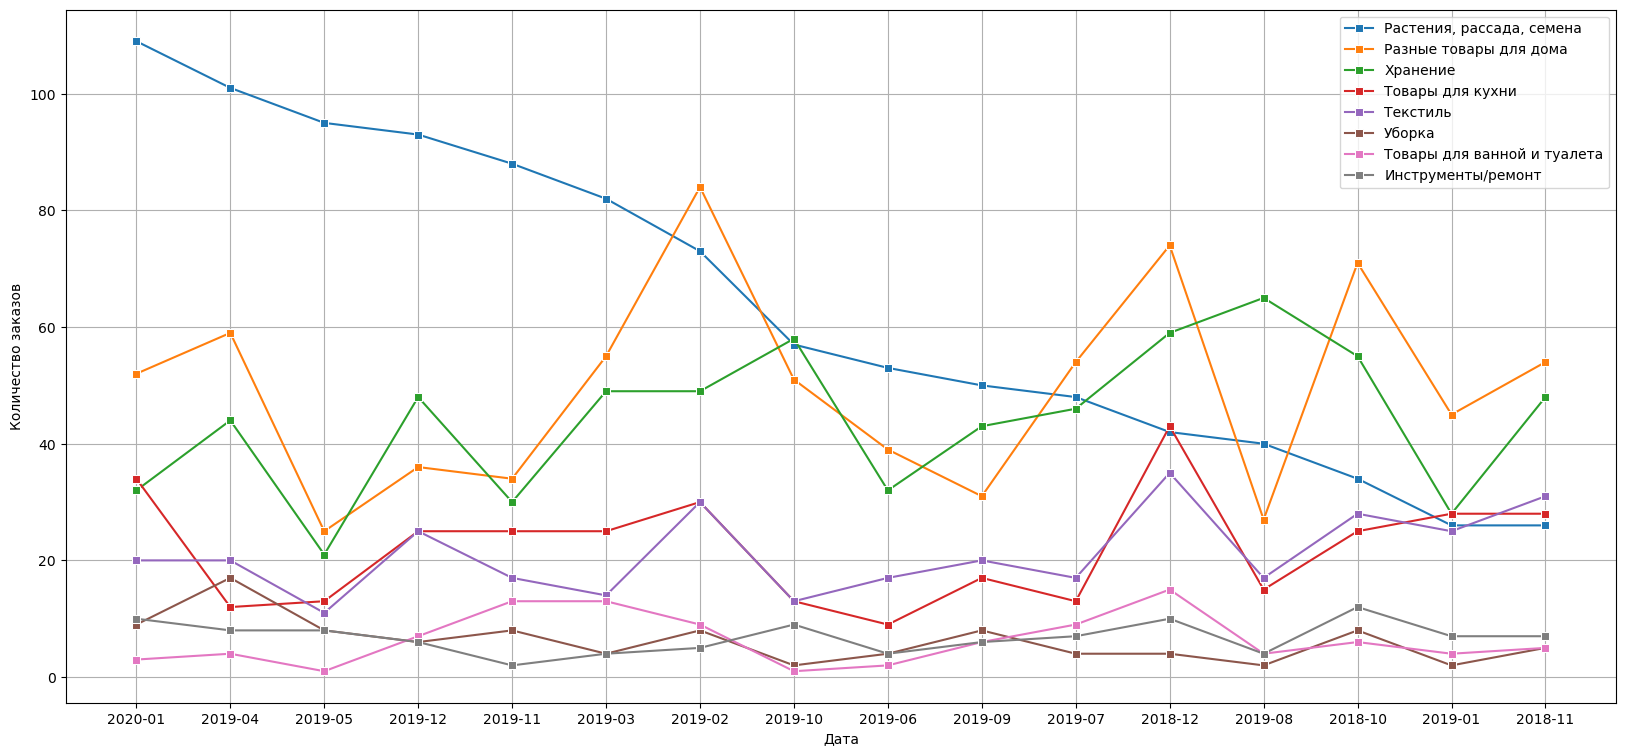

In [64]:
# Создание графика
plt.figure(figsize=(20, 9))

# Перебор уникальных категорий и построение линейного графика для каждой категории
for category in categories_orders['category'].unique():
    data = categories_orders[categories_orders['category'] == category]
    
    sns.lineplot(data=data, x='month', y='count_orders', marker='s', label=category)

plt.xlabel('Дата')
plt.ylabel('Количество заказов')

plt.legend() 
plt.grid(True)
plt.show()

**Топ-3 категории товаров по количеству заказов**:
* Растения, рассада, семена;
* Разные товары для дома;
* Хранение.

По категории товаров "Растения, рассада, семена" наблюдается пик количества заказов в апреле 2019 г и январе 2020 г.
Покупатели закупаются впрок на сезон.

По категории товаров "Разные товары для дома" график скачкообразный - всплески наблюдаются через каждые 2-3 месяца. 

По категории товаров "Хранение" график тоже скачкообразный, с всплесками через каждые 2-3 месяца.

По категориям товаров "Товары для кухни",  "Текстиль", "Инструменты/ремонт", "Товары для ванной и туалета"  и "Уборка", начиная с марта 2019 года, количество заказов приблизительно на одном уровне, нет влияния сезонности.



**Выручка по категориям**

In [65]:
# Сгруппируем датасет по категориям и посчитаем суммарную выручку
categories_revenue = (df.groupby('category')
                 .agg(revenue=('revenue', 'sum'))
                .sort_values(by='revenue', ascending=False)
                .reset_index()
                )
categories_revenue

category    revenue
0                     Хранение 1320209.25
1       Разные товары для дома  805962.83
2                     Текстиль  460467.67
3    Растения, рассада, семена  283303.33
4             Товары для кухни  246687.50
5           Инструменты/ремонт  164363.33
6                       Уборка  115301.50
7  Товары для ванной и туалета   97749.00

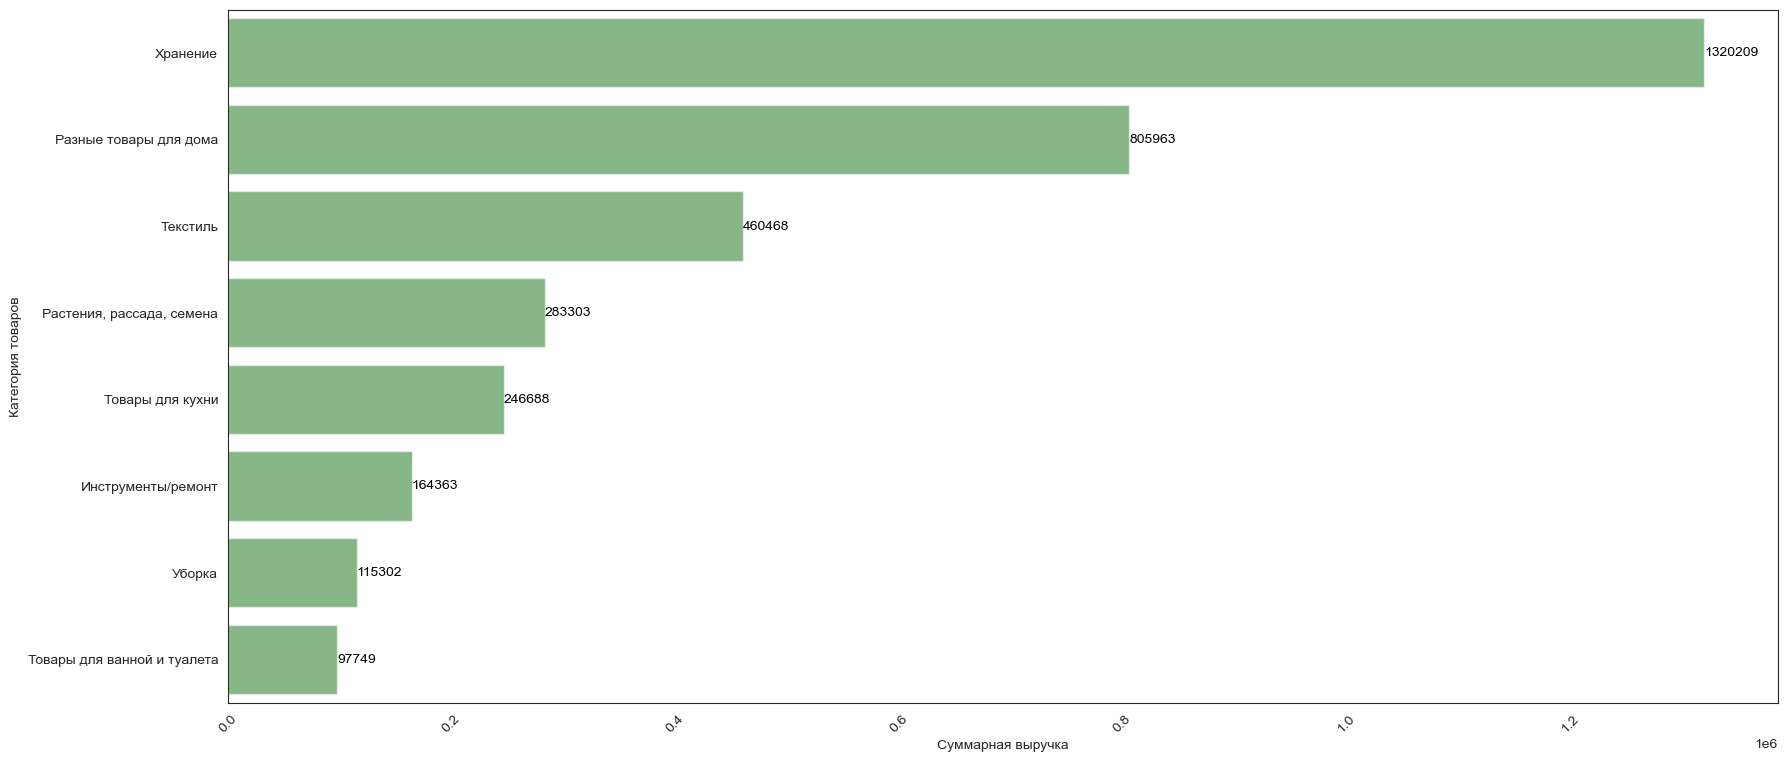

In [66]:
# используем стиль white из библиотеки seaborn
sns.set_style('white')
# назначаем размер графика
plt.figure(figsize=(20, 9))
# Выбираем одноцветную цветовую схему (например, синий)
palette = ['Green']
# строим столбчатый график средствами seaborn
sns.barplot(x='revenue', y='category', data=categories_revenue, palette=palette, alpha =0.5)

# формируем заголовок графика и подписи осей средствами matplotlib

plt.xlabel('Суммарная выручка')
plt.ylabel('Категория товаров')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)

# Округляем значения до целых чисел и добавляем их на столбцы
for i, v in enumerate(categories_revenue['revenue']):
    plt.text(v, i, str(round(v)), color='black', va='center')
    
# отображаем график на экране
plt.show()

Как видно из диаграммы, наиболее прибыльная категория "Хранение": 1 320 209, хотя по объему продаж она составляет всего 20%.
Далее идут "Разные товары для дома" (805 963, 22% по объему продаж) и "Текстиль" (460 468,  10% по объему продаж).

Самая продаваемая категория "Растения, рассада, семена" находится на 4-м месте по объему выручки - 283 303.

Менее всего выручки приносят категории "Товары для ванной и туалета"(97 749) и "Уборка" (115 301), которые также являются наименее продаваемыми  (не более 3% по объему продаж).

**Средний чек по категориям**

In [67]:
# Сгруппируем датасет по категориям и посчитаем количество наименований товаров в каждой из категорий
category_avg_bill = (df
                  .groupby('category')
                  .agg(orders_count=('order_id','count'), revenues=('revenue', 'sum'))
                   .reset_index()
                 )
category_avg_bill['avg_bill'] = category_avg_bill['revenues'] / category_avg_bill['orders_count']
display(category_avg_bill.sort_values(by='avg_bill', ascending=False).style.background_gradient('Blues'))


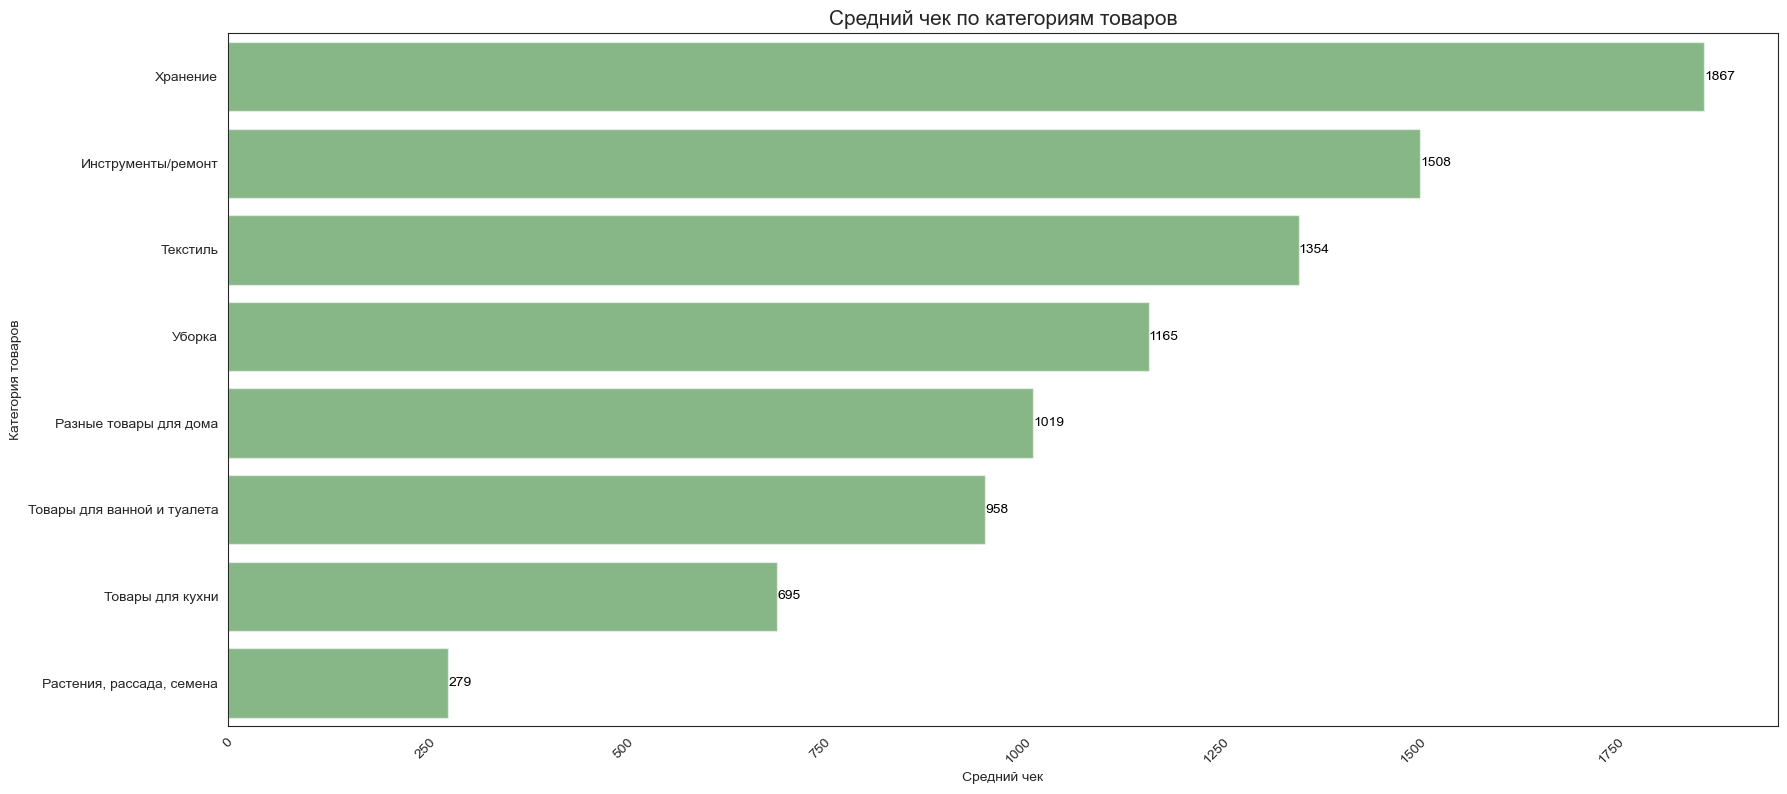

In [68]:
category_avg_bill=category_avg_bill.sort_values(by='avg_bill', ascending=False)
# используем стиль white из библиотеки seaborn
sns.set_style('white')
# назначаем размер графика
plt.figure(figsize=(20, 9))
# Выбираем одноцветную цветовую схему (например, синий)
palette = ['Green']
# строим столбчатый график средствами seaborn
sns.barplot(x='avg_bill', y='category', data=category_avg_bill, palette=palette, alpha=0.5)

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Средний чек по категориям товаров',fontsize=15)
plt.xlabel('Средний чек')
plt.ylabel('Категория товаров')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)

# Округляем значения до целых чисел и добавляем их на столбцы
for i, v in enumerate(category_avg_bill['avg_bill']):
    plt.text(v, i, str(round(v)), color='black', va='center')
    
# отображаем график на экране
plt.show()


**По среднему чеку** лидируют следующие **топ-3 категории товаров**:

* Хранение (1867);
* Инструменты/ремонт (1508);
* Текстиль (1354).

Самая продаваемая категория "Растения, рассада, семена" дает самый маленький средний чек (279).
С покупателями, приобретающими данную категорию товаров, надо поработать - предлагать сопутствующий товар со скидкой, разрабатывать маркетинговые акции, стимулирующие к покупке. Также необходимо проанализировать ценообразование продуктов в категории.


**Вывод по п.3 Исследовательский анализ данных (EDA):**

В данном разделе был проведен **Анализ выбросов и аномалий**, в результате которого было установлено:

*Количестве товаров:*
* Наблюдается большой разброс в количестве купленного товара- 25%, 50% и 75% перецентили составляют 1 товар, однако среднее значение -2,6 товара и стандартное отклонение 16.45. Также есть всплески - максимальное количество товаров в заказе 1000 шт.;
* Не более чем 1% транзакций интернет-магазина, имеют больше 30 наименований товара в корзине;
* 1 заказ содержал закупку 1000 шт. вантуза с деревянной ручкой d14 см красный, burstenmann, 0522/0000'.     
Возможно, заказ совершали мелкие оптовики либо были проведены совместные закупки либо закупались большие семьи на проведение ремонта и т.д. Скорее всего, такой заказ больше не повторится. Было принято решение удалить его из датасета.

*Стоимость товаров:*

* Наблюдается большой разброс в цене товара- среднее значение -531.26, в то время как медианное значение составляет 150, стандартное отклонение 973.32, что говорит о наличии выбросов. Максимальная цена товара составляет 14 917;
* Имеется 681 единица разнопланового ассортимента товара, стоимость которых превышает 524 (75% перцентиль);
* Не более 5% товаров стоят 2399 (143 ед. товара),  Не более 1% товаров стоят 5249 (35 ед. товара). Скорее всего, это товары премиальной цены. Не будем их удалять из датасета, так как можем потерять важную информацию касательно премиальных товаров.

*Аномалии в датах заказов:*
* 34 уникальных id заказов, даты которых повторяются. Так как мы не знаем точную дату совершения заказа, оставим наиболее позднюю дату.

*Покупатели с аномальным количеством заказов:*

* Не более 1% покупателей совершает более 3-х заказов, не более 5% покупателей совершает более 2-х заказов;
* Всего покупателей, совершивших более 3-х ,  8 человек.Возможно, это клиенты оптовики или клиенты, осуществляющие совместные закупки. Будем иметь их в виду при разработке персонализированных предложений.

*Следут отметить, что значения 95-го и 99-го перцентилей показывают крайне низкую "возвращаемость" покупателей в интернет-магазин.*

**Анализ коммерческих показателей интернет-магазина:**

*Сезонность продаж:*

На графике виден всплеск количества заказов в декабре 2018, феврале 2019 года. Начиная с апреля 2019 года по сентябрь 2019 года количество заказов снижается с небольшим увеличением заказов в июле 2019 года и с октября наблюдается постепенный рост вплоть до января 2020 года.

Видимо, покупатели интернет-магазина предпочитают сезонные закупки впрок.

Менеджменту магазина стоить задуматься о стимулировании спроса покупателей в застойные месяцы, например, посредством предложения скидок на товары, рассылки персонализированных предложений.

*Выручка:*
* В течение всего периода наблюдается зигзагообразное (небольшие всплески через каждые 2-3 месяца) падение выручки с продаж к текущему периоду;
* Темп роста продаж = (выручка янв 2020г / выручка янв 2020г) * 100 = (174036.33 / 229130.00) * 100 = 75,96%. Динамика роста выручки с продаж отрицательная;
* Динамика средней выручки по медиане демонстрирует резкий спад средней выручки  в мае 2019 года и ноябре 2019 года- январе 2020 года.

Для увеличения прибыльности интернет-магазина необходимо провести более тщательный анализ покупателей интернет-магазина по покупкам и выработать персонализированные рекомендации для каждой из категорий на увеличение количества покупок и среднего выручки.

**Оценка пользовательской активности (DAU, MAU):**

* Среднее кол-во уникальных покупателей в день (DAU): 6;
* Среднее кол-во уникальных покупателей в месяц (MAU): 200;
* Регулярность использования интернет-магазина (sticky factor) для месячной аудитории — DAU/MAU: 3%.

По метрикам DAU и MAU и липкому фактору sticky factor DAU/MAU показатели низкие, очевидно, что новые покупатели у интернет-магазина нечастое явление. Менеджменту магазина необходимо задуматься о проведении маркетинговых активностей/ разработке персонализированных предложений по разным сегментам покупателей.

Для возможности проведения в дальнейшем более детального анализа была проведена **Категоризация наименований товаров:**

По результатам анализа наименований товара было выделено **8 категорий товаров**:
* Инструменты/ремонт;
* Разные товары для дома;
* Растения, рассада, семена;
* Текстиль;
* Товары для ванной и туалета;
* Товары для кухни;
* Уборка;
* Хранение.

*Количество проданного товара в каждой из категорий:*

**Топ-3 категории товаров по количеству проданного товара** интернет-магазина товаров для дома и быта «Пока все ещё тут»:
* Растения, рассада, семена;
* Разные товары для дома;
* Хранение.

*Сезонность продаж по категориям:*

**Топ-3 категории товаров по количеству заказов**:
* Растения, рассада, семена;
* Разные товары для дома;
* Хранение.

По категории товаров "Растения, рассада, семена" наблюдается пик количества заказов в апреле 2019 г и январе 2020 г.
Покупатели закупаются впрок на сезон.

По категории товаров "Разные товары для дома" график скачкообразный - всплески наблюдаются через каждые 2-3 месяца. 

По категории товаров "Хранение" график тоже скачкообразный, с всплесками через каждые 2-3 месяца.

По категориям товаров "Товары для кухни",  "Текстиль", "Инструменты/ремонт", "Товары для ванной и туалета"  и "Уборка", начиная с марта 2019 года, количество заказов приблизительно на одном уровне, нет влияния сезонности.

*Выручка по категориям:*

Как видно из диаграммы, наиболее прибыльная категория "Хранение": 1 320 209,хотя по объему продаж она составляет всего 20%.
Далее идут "Разные товары для дома" (805 963, 22% по объему продаж) и "Текстиль" (460 468,  10% по объему продаж).

Самая продаваемая категория "Растения, рассада, семена" находится на 4-м месте по объему выручки - 283 303.

Менее всего выручки приносят категории "Товары для ванной и туалета"(97 749) и "Уборка" (115 301), которые также являются наименее продаваемыми  (не более 3% по объему продаж).

*Средний чек по категориям:*

**По среднему чеку** лидируют следующие **топ-3 категории товаров**:
* Хранение (1867);
* Инструменты/ремонт (1508);
* Текстиль (1354).

Самая продаваемая категория "Растения, рассада, семена" дает самый маленький средний чек (279).
С покупателями, приобретающими данную категорию товаров, надо поработать - предлагать сопутствующий товар со скидкой, разрабатывать маркетинговые акции, стимулирующие к покупке. Также необходимо проанализировать ценообразование продуктов в категории.










## Сегментация покупателей на основе истории покупок


### Сегментация покупателей  по покупкам (RFM- анализ)

**RFM-анализ** — метод анализа, позволяющий сегментировать клиентов по частоте и сумме покупок и выявлять тех, которые приносят больше денег.

Аббревиатура RFM расшифровывается:

* *Recency* — давность (как давно ваши клиенты были у вас на процедурах). Высокий показатель давности означает, что у клиента уже сложилось достаточно хорошее впечатление о вашем бренде, поэтому он недавно посещал вас. Давность в срезе клиентской базы можно посмотреть, если отсортировать клиентов по дате последней покупки.
* *Frequency* — частота (как часто они у вас покупают). Высокий показатель частоты говорит о том, что клиенту нравится ваш бренд, ваши товары и услуги, поэтому он часто к вам возвращается. Для расчета частоты посещения нужно общее кол-во покупок/визитов разделить на кол-во месяцев/дней/годов и т.д.
* *Monetary* — деньги (общая сумма трат). Высокий уровень этого показателя  означает, что клиенту нравится тратить именно у вас.

Проведение RFM-анализа позволит в дальнейшем сформулировать рекомендации по разработке персонализированных предложений по каждому профилю потребления.

In [69]:
# Сгруппируем датасет по покупателям и посчитаем сумму покупок, количество покупок и выведем дату последней покупки
df2 = df.groupby('customer_id').agg(
    purchase_sum = ('revenue', 'sum'),
    count_orders=('order_id', 'nunique'),
    last_purchase = ('datetime', 'last'),
).reset_index()

In [70]:
df2.head()

customer_id  purchase_sum  count_orders  \
0  000d6849-084e-4d9f-ac03-37174eaf60c4        135.00             1   
1  001cee7f-0b29-4716-b202-0042213ab038        442.00             1   
2  00299f34-5385-4d13-9aea-c80b81658e1b        914.00             1   
3  002d4d3a-4a59-406b-86ec-c3314357e498       1649.00             1   
4  003bbd39-0000-41ff-b7f9-2ddaec152037       2324.00             1   

        last_purchase  
0 2019-10-16 08:00:00  
1 2019-02-16 11:00:00  
2 2019-10-14 23:00:00  
3 2019-01-27 17:00:00  
4 2019-09-29 17:00:00

In [71]:
# Добавим столбец, рассчитывающий,сколько прошло дней с даты последней покупки
df2['days_since_last_purchase'] = (max(df['datetime']) - df2['last_purchase']).dt.days

In [72]:
df2.head()

customer_id  purchase_sum  count_orders  \
0  000d6849-084e-4d9f-ac03-37174eaf60c4        135.00             1   
1  001cee7f-0b29-4716-b202-0042213ab038        442.00             1   
2  00299f34-5385-4d13-9aea-c80b81658e1b        914.00             1   
3  002d4d3a-4a59-406b-86ec-c3314357e498       1649.00             1   
4  003bbd39-0000-41ff-b7f9-2ddaec152037       2324.00             1   

        last_purchase  days_since_last_purchase  
0 2019-10-16 08:00:00                       107  
1 2019-02-16 11:00:00                       349  
2 2019-10-14 23:00:00                       108  
3 2019-01-27 17:00:00                       368  
4 2019-09-29 17:00:00                       123

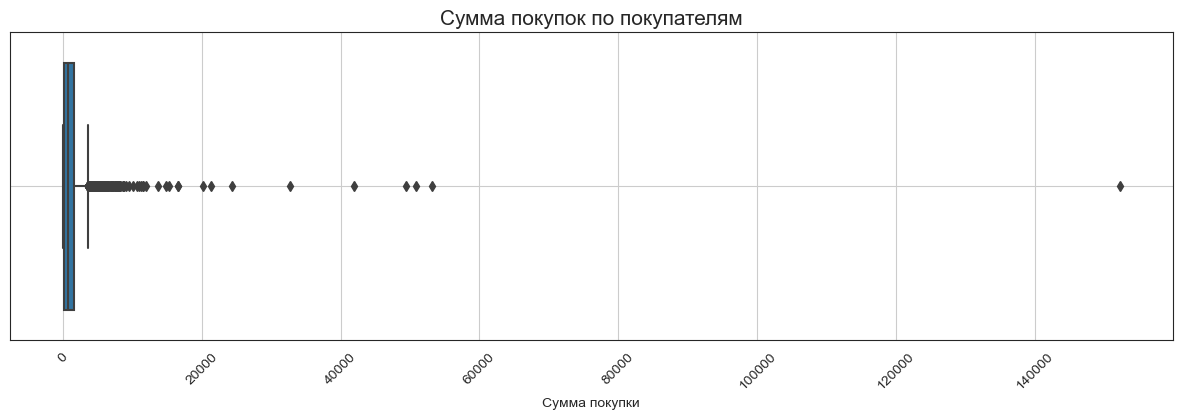

In [73]:
plt.figure(figsize=(15, 4))

ax = sns.boxplot(x='purchase_sum', data=df2) 

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Сумма покупок по покупателям',fontsize=15)
plt.xlabel('Сумма покупки')

# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)


plt.grid()

plt.show()

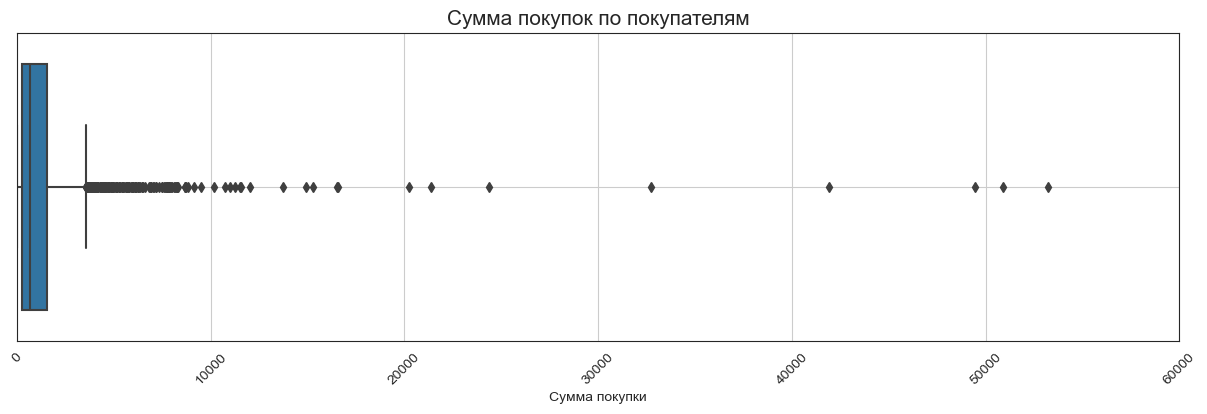

In [74]:
plt.figure(figsize=(15, 4))

ax = sns.boxplot(x='purchase_sum', data=df2) 

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Сумма покупок по покупателям',fontsize=15)
plt.xlabel('Сумма покупки')

# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)

# ограничиваем ось x для наглядности
plt.xlim(0,60000)
plt.grid()

plt.show()



In [75]:
# Посмотрим распределение по квантилям
quantiles = [round(el, 2) for el in np.arange(0.1, 1.1, 0.1)]
df2['purchase_sum'].quantile(quantiles)

0.10      128.00
0.20      194.60
0.30      314.00
0.40      486.00
0.50      682.00
0.60      937.00
0.70     1270.80
0.80     1900.00
0.90     3228.20
1.00   152170.00
Name: purchase_sum, dtype: float64

In [76]:
print('33-й перцентиль суммы покупок  по 1 покупателю:', np.percentile(df2['purchase_sum'],33))
print('66-й перцентиль суммы покупок по 1 покупателю:',np.percentile(df2['purchase_sum'],66))

33-й перцентиль суммы покупок  по 1 покупателю: 374.0
66-й перцентиль суммы покупок по 1 покупателю: 1088.2


* Большое количество покупателей совершили покупки на сумму не более 12 000, есть единичные выбросы. Максимальная стоимость покупок у покупателя составляет 152170;
* 33% покупателей совершили покупки на общую сумму не более 374,  66% - на общую сумму не более 1088.

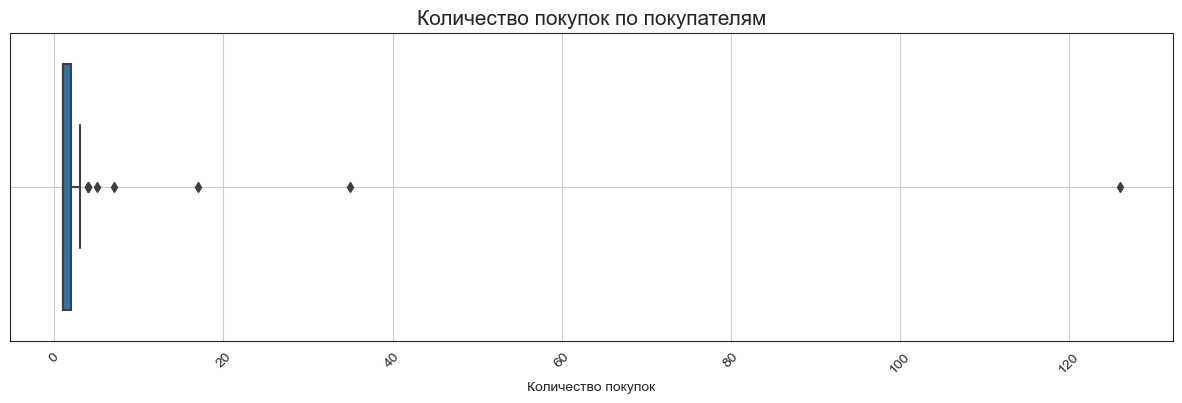

In [77]:
plt.figure(figsize=(15, 4))

ax = sns.boxplot(x='count_orders', data=df2) 

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Количество покупок по покупателям',fontsize=15)
plt.xlabel('Количество покупок')

# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)


plt.grid()

plt.show()

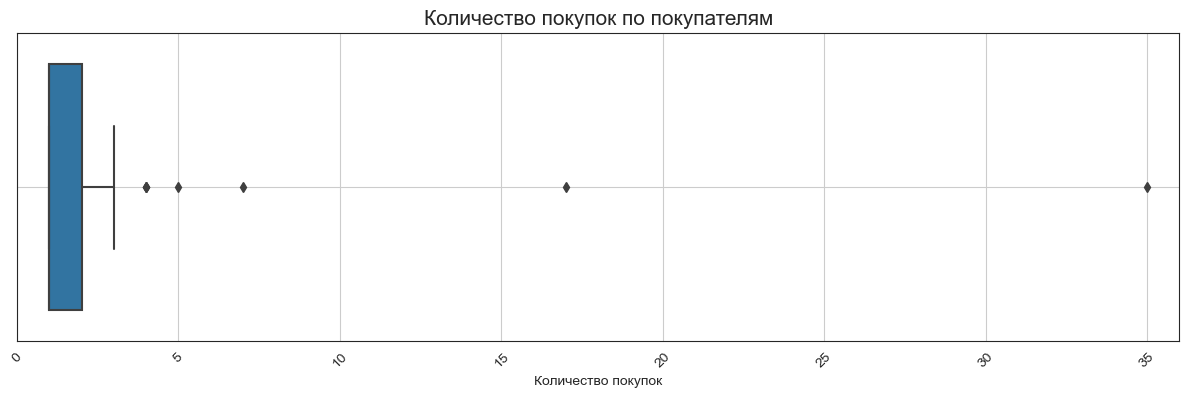

In [78]:
plt.figure(figsize=(15, 4))

ax = sns.boxplot(x='count_orders', data=df2) 

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Количество покупок по покупателям',fontsize=15)
plt.xlabel('Количество покупок')

# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)

# ограничиваем ось x для наглядности
plt.xlim(0,36)
plt.grid()

plt.show()

In [79]:
df2['count_orders'].quantile(quantiles)

0.10     1.00
0.20     1.00
0.30     1.00
0.40     1.00
0.50     1.00
0.60     1.00
0.70     2.00
0.80     2.00
0.90     2.00
1.00   126.00
Name: count_orders, dtype: float64

In [80]:
print('33-й перцентиль количества покупок по 1 покупателю:', np.percentile(df2['count_orders'],33))
print('66-й перцентиль количества покупок по 1 покупателю:',np.percentile(df2['count_orders'],66))

33-й перцентиль количества покупок по 1 покупателю: 1.0
66-й перцентиль количества покупок по 1 покупателю: 2.0


* В основном, все покупатели совершали только 1 покупку. Не более 10% покупателей совершали более 2-х покупок и не более 1 % покупателей совершали покупки 126 раз;
* 33% покупателей совершили 1 покупку,  66% - 2.

In [81]:
df2[df2['count_orders']>3]

customer_id  purchase_sum  count_orders  \
17    0184f535-b60a-4914-a982-231e3f615206       2661.00             5   
693   498f12a4-6a62-4725-8516-cf5dc9ab8a3a      41900.00             4   
735   4d93d3f6-8b24-403b-a74b-f5173e40d7db      50872.00            35   
1088  73d1cd35-5e5f-4629-8cf2-3fda829d4e58      21361.00            17   
1731  b7b865ab-0735-407f-8d0c-31f74d2806cc       1426.00             7   
1803  bea7a833-2074-42db-bc49-4457abd3c930       2135.00             4   
1899  c971fb21-d54c-4134-938f-16b62ee86d3b     152170.00           126   
2126  e0535076-6270-4df2-8621-cb06264a94fa        636.00             4   

           last_purchase  days_since_last_purchase  
17   2019-05-23 12:00:00                       253  
693  2019-04-19 19:00:00                       286  
735  2018-10-24 14:00:00                       464  
1088 2019-10-31 14:00:00                        92  
1731 2019-04-23 17:00:00                       282  
1803 2019-06-17 17:00:00                       227  
1899 2019-03-06 12:00:00                       331  
2126 2019-05-31 13:00:00                       245

In [82]:
df[df['customer_id']=='c971fb21-d54c-4134-938f-16b62ee86d3b']

order_id            datetime                           customer_id  \
316      68480 2018-10-01 09:00:00  c971fb21-d54c-4134-938f-16b62ee86d3b   
322      68490 2018-10-02 08:00:00  c971fb21-d54c-4134-938f-16b62ee86d3b   
333      68511 2018-10-03 08:00:00  c971fb21-d54c-4134-938f-16b62ee86d3b   
334      68514 2018-10-03 10:00:00  c971fb21-d54c-4134-938f-16b62ee86d3b   
366      68561 2018-10-08 07:00:00  c971fb21-d54c-4134-938f-16b62ee86d3b   
...        ...                 ...                                   ...   
1468     70582 2019-03-04 15:00:00  c971fb21-d54c-4134-938f-16b62ee86d3b   
1471     70589 2019-03-04 16:00:00  c971fb21-d54c-4134-938f-16b62ee86d3b   
1480     70606 2019-03-05 13:00:00  c971fb21-d54c-4134-938f-16b62ee86d3b   
1484     70614 2019-03-05 15:00:00  c971fb21-d54c-4134-938f-16b62ee86d3b   
1493     70629 2019-03-06 12:00:00  c971fb21-d54c-4134-938f-16b62ee86d3b   

                                                                                                      product  \
316                                  чехол для гладильной доски colombo persia beige 130х50 см из хлопка 5379   
322                                              чехол для гладильной доски festival 137x60 см из хлопка 4738   
333                                        набор прищепок большие пластиковые rozenbal пиноккио 10 шт r102312   
334                                             сушилка для белья attribute прима 11 м синяя напольная adp410   
366   тележка багажная delta тбр-20 коричневый с оранжевым грузоподъемность 25 кг сумка и 50 кг каркас россия   
...                                                                                                       ...   
1468                                                                                нефролепис бостон d-12 см   
1471                                                                             калла крупноцветковая желтая   
1480                                                    пеларгония розебудная red pandora укорененный черенок   
1484                                                         гладильная доска ника lora fashion hlf 123х46 см   
1493                           сумка-тележка хозяйственная andersen scala shopper, elba, бирюзовая 112-051-90   

      quantity   price  revenue        date    month  year  \
316          1  674.00   674.00  2018-10-01  2018-10  2018   
322          1 1162.00  1162.00  2018-10-02  2018-10  2018   
333         10   86.00   860.00  2018-10-03  2018-10  2018   
334          1  749.00   749.00  2018-10-03  2018-10  2018   
366          1  742.00   742.00  2018-10-08  2018-10  2018   
...        ...     ...      ...         ...      ...   ...   
1468         1  292.00   292.00  2019-03-04  2019-03  2019   
1471         1  374.00   374.00  2019-03-04  2019-03  2019   
1480         1  134.00   134.00  2019-03-05  2019-03  2019   
1484         1 1949.00  1949.00  2019-03-05  2019-03  2019   
1493         1 3787.00  3787.00  2019-03-06  2019-03  2019   

                  first_two_words                     category  
316                     чехол для                     Текстиль  
322                     чехол для                     Текстиль  
333                набор прищепок  Товары для ванной и туалета  
334                   сушилка для       Разные товары для дома  
366              тележка багажная                     Хранение  
...                           ...                          ...  
1468            нефролепис бостон    Растения, рассада, семена  
1471        калла крупноцветковая    Растения, рассада, семена  
1480        пеларгония розебудная    Растения, рассада, семена  
1484             гладильная доска       Разные товары для дома  
1493  сумка-тележка хозяйственная                     Хранение  

[126 rows x 12 columns]

In [83]:
df[df['customer_id']=='c971fb21-d54c-4134-938f-16b62ee86d3b']['product'].unique()

array(['чехол для гладильной доски colombo persia beige 130х50 см из хлопка 5379',
       'чехол для гладильной доски festival 137x60 см из хлопка 4738',
       'набор прищепок большие пластиковые rozenbal пиноккио 10 шт r102312',
       'сушилка для белья attribute прима 11 м синяя напольная adp410',
       'тележка багажная delta тбр-20 коричневый с оранжевым грузоподъемность 25 кг сумка и 50 кг каркас россия',
       'готовая скатерть ажурная dia rose круглая д.152 белая, 5173, towa co., ltd',
       'сушилка для белья потолочная zalger lift basic 1520 200 см, 10 м',
       'таз пластмассовый 18,0 л квадратный (тп-18) "пластхозторг", 1404042',
       'стяжка оконная с болтом ст-55 цинк, 1108354',
       'сумка-тележка 3-х колесная gimi tris floral синяя',
       'сумка-тележка хозяйственная andersen scala shopper, elba, черная 112-051-80',
       'герань домашняя (пеларгония зональная) цветущая d12, h25-30, малиновая с красным, полумахровая',
       'искусственный цветок роза бархат

Покупатель c971fb21-d54c-4134-938f-16b62ee86d3b совершал покупки c различным товарным ассортиментом 126 раз. Возможно, это оптовик, наш топ-клиент.

In [84]:
df2['days_since_last_purchase'].quantile(quantiles)

0.10    26.80
0.20    58.60
0.30    91.00
0.40   140.00
0.50   208.00
0.60   267.00
0.70   320.60
0.80   371.40
0.90   430.00
1.00   487.00
Name: days_since_last_purchase, dtype: float64

In [85]:
print('33-й перцентиль c даты последней покупки:', np.percentile(df2['days_since_last_purchase'],33))
print('66-й перцентиль c даты последней покупки:',np.percentile(df2['days_since_last_purchase'],66))

33-й перцентиль c даты последней покупки: 105.0
66-й перцентиль c даты последней покупки: 299.0


У 33% покупателей с даты последней покупки прошло не более 105 дней, у 66% - не более 299 дней.

**Для целей сегментирования покупателей на основании RFM- анализа рассортируем покупателей по группам на основании значений 33 и 66 перцентилей.**

In [86]:
quantiles_RFM = [0.33, 0.66]

In [87]:
# Функция для присваивания групп
def set_score(val, var, perc_33, perc_66):
  if val < perc_33:
    return 3 if var != 'R' else 1   # Для показателя Recency чем меньше дней прошло с даты последней покупки, тем лучше
  elif val < perc_66:
    return 2
  else:
    return 1 if var != 'R' else 3  # Для показателя Recency чем меньше дней прошло с даты последней покупки, тем лучше

recency_quantiles = df2['days_since_last_purchase'].quantile(quantiles_RFM)
df2['R'] = df2['days_since_last_purchase'].apply(set_score, args=('R', recency_quantiles.iloc[0], recency_quantiles.iloc[1]))

frequency_quantiles = df2['count_orders'].quantile(quantiles_RFM)
df2['F'] = df2['count_orders'].apply(set_score, args=('F', frequency_quantiles.iloc[0], frequency_quantiles.iloc[1]))

monetary_quantiles = df2['purchase_sum'].quantile(quantiles_RFM)
df2['M'] = df2['purchase_sum'].apply(set_score, args=('M', monetary_quantiles.iloc[0], monetary_quantiles.iloc[1]))

In [88]:
df2.head()

customer_id  purchase_sum  count_orders  \
0  000d6849-084e-4d9f-ac03-37174eaf60c4        135.00             1   
1  001cee7f-0b29-4716-b202-0042213ab038        442.00             1   
2  00299f34-5385-4d13-9aea-c80b81658e1b        914.00             1   
3  002d4d3a-4a59-406b-86ec-c3314357e498       1649.00             1   
4  003bbd39-0000-41ff-b7f9-2ddaec152037       2324.00             1   

        last_purchase  days_since_last_purchase  R  F  M  
0 2019-10-16 08:00:00                       107  2  2  3  
1 2019-02-16 11:00:00                       349  3  2  2  
2 2019-10-14 23:00:00                       108  2  2  2  
3 2019-01-27 17:00:00                       368  3  2  1  
4 2019-09-29 17:00:00                       123  2  2  1

In [89]:
# Создадим столбец RFM, объединяющий данные по столбцам Recency, Frequency и Monetary
df2['RFM'] = df2.apply(lambda row: f"{row['R']}{row['F']}{row['M']}", axis=1)

In [90]:
df2.head()

customer_id  purchase_sum  count_orders  \
0  000d6849-084e-4d9f-ac03-37174eaf60c4        135.00             1   
1  001cee7f-0b29-4716-b202-0042213ab038        442.00             1   
2  00299f34-5385-4d13-9aea-c80b81658e1b        914.00             1   
3  002d4d3a-4a59-406b-86ec-c3314357e498       1649.00             1   
4  003bbd39-0000-41ff-b7f9-2ddaec152037       2324.00             1   

        last_purchase  days_since_last_purchase  R  F  M  RFM  
0 2019-10-16 08:00:00                       107  2  2  3  223  
1 2019-02-16 11:00:00                       349  3  2  2  322  
2 2019-10-14 23:00:00                       108  2  2  2  222  
3 2019-01-27 17:00:00                       368  3  2  1  321  
4 2019-09-29 17:00:00                       123  2  2  1  221

In [91]:
# Сгруппируем по значению RFM и посчитаем количество покупателей по сегментам
df3 = df2.groupby('RFM')['RFM'].agg({'count'}).sort_values(by='count', ascending=False).reset_index()
df3

RFM  count
0   111    372
1   223    325
2   323    280
3   322    279
4   112    246
5   222    219
6   321    210
7   221    167
8   113    116
9   211     39
10  123     30
11  212     29
12  311     25
13  213     22
14  122     21
15  312     18
16  313     18
17  121     13

На основании RFM- анализа выделили 18 сегментов покупателей по истории их покупок.

In [92]:
# Визуализируем сегменты на графике

fig = px.treemap(df3, path=['RFM'], values='count')
fig.update_layout(title='Распределение покупателей по сегментам', 
                  width=800, 
                  height=500
                 )
fig.show() 



В соответствии с проведенным RFM - анализом **топ-5 сегментов покупателей по истории покупок**:
* 111 - 372 покупателя (покупали часто, не так давно и на большие суммы);
* 223 - 325 покупателя (покупали не так часто, сравнительно давно и на небольшие суммы);
* 323 - 280 покупателей (покупали не так часто, давно и на небольшие суммы);
* 322 - 279 покупателей (покупали не так часто, давно и на средние суммы);
* 112 - 246 покупателей (покупали часто, не так давно и на средние суммы).



### Обобщение полученных сегментов в группы

Обобщим полученные сегменты в более крупные группы:
* лояльные;
* сомневающиеся;
* в зоне риска;
* в спячке.

In [93]:
# Создадим функцию для деления сегментов на укрупненные группы
def profile(RFM):
    if "111" in RFM or "121" in RFM or "112" in RFM or "122" in RFM or "113" in RFM:
        return "лояльные"
    elif "211" in RFM or "221" in RFM or "222" in RFM or "213" in RFM or "231" in RFM or "212" in RFM or "123" in RFM:
        return "сомневающиеся"
    elif "223" in RFM or "322" in RFM or "321" in RFM or "311" in RFM or "312" in RFM or "313" in RFM:
        return "в зоне риска"
    else:
        return "в спячке"

                
    
            
    

In [94]:
# Применим функцию
df2['profile'] = df2['RFM'].apply(profile)

In [95]:
df2[df2['profile'] == "в спячке"]['RFM'].unique()

array(['323'], dtype=object)

In [96]:
df2.head()

customer_id  purchase_sum  count_orders  \
0  000d6849-084e-4d9f-ac03-37174eaf60c4        135.00             1   
1  001cee7f-0b29-4716-b202-0042213ab038        442.00             1   
2  00299f34-5385-4d13-9aea-c80b81658e1b        914.00             1   
3  002d4d3a-4a59-406b-86ec-c3314357e498       1649.00             1   
4  003bbd39-0000-41ff-b7f9-2ddaec152037       2324.00             1   

        last_purchase  days_since_last_purchase  R  F  M  RFM        profile  
0 2019-10-16 08:00:00                       107  2  2  3  223   в зоне риска  
1 2019-02-16 11:00:00                       349  3  2  2  322   в зоне риска  
2 2019-10-14 23:00:00                       108  2  2  2  222  сомневающиеся  
3 2019-01-27 17:00:00                       368  3  2  1  321   в зоне риска  
4 2019-09-29 17:00:00                       123  2  2  1  221  сомневающиеся

In [97]:
# Сгруппируем по значению profile и посчитаем количество покупателей по укрупненным сегментам
profile_large = (df2.groupby('profile')
                 .agg(customer_count=('customer_id','count'), R_avg=('R','mean'), F_avg=('F','mean'),M_avg=('M','mean') )
                 .sort_values(by='R_avg')
                      .reset_index()
                     )
profile_large

profile  customer_count  R_avg  F_avg  M_avg
0       лояльные             768   1.00   1.04   1.65
1  сомневающиеся             506   1.94   1.82   1.70
2   в зоне риска             875   2.63   1.93   2.12
3       в спячке             280   3.00   2.00   3.00

In [98]:
# Проверим, что все покупатели разбились в укрупненные сегменты
profile_large['customer_count'].sum()==df['customer_id'].nunique()

True

Ранее полученные на основании RFM- анализа 18 сегментов покупателей укрупнили по группам:
* сомневающиеся	(506 покупателей);
* лояльные	(768 покупателей);
* в спячке	(280 покупателей);
* в зоне риска	(875 покупателей).


### Анализ полученных групп по категориям товара/сезонности

In [99]:
# Объединим данные из двух таблиц (изначально датасета и получившейся таблицей по сегментам покупателей) для дальнейшего анализа
df_final=df.merge(df2,on='customer_id', how = 'left')
df_final.head()

order_id            datetime                           customer_id  \
0     12624 2019-06-02 20:00:00  d17861fa-db5f-4de4-93fd-dc5e60d24d3e   
1     13547 2018-10-05 00:00:00  b80e4826-7218-4bf9-ac08-eb2c81ab3f62   
2     14480 2018-10-02 11:00:00  f08d9018-438e-4e96-b519-f74c0302a433   
3     14481 2018-10-02 17:00:00  49b9c587-c19e-4481-bace-967aeac357fa   
4     14482 2018-10-07 12:00:00  43993fd2-20c9-44f7-8634-cf0aee26df4f   

                                                      product  quantity  \
0                        осина обыкновенная, высота 50-100 см         1   
1          рассада зелени для кухни тимьяна в кассете по 6 шт         1   
2        рассада зелени для кухни мелиссы в горшке диам. 9 см         1   
3          пеларгония зональная диам. 12 см сиреневый простая         1   
4  пеларгония зональная диам. 12 см темнорозовая полумахровая         1   

   price  revenue        date    month  year  ...                   category  \
0 225.00   225.00  2019-06-02  2019-06  2019  ...  Растения, рассада, семена   
1 162.00   162.00  2018-10-05  2018-10  2018  ...  Растения, рассада, семена   
2 101.00   101.00  2018-10-02  2018-10  2018  ...  Растения, рассада, семена   
3 150.00   150.00  2018-10-02  2018-10  2018  ...  Растения, рассада, семена   
4 188.00   188.00  2018-10-07  2018-10  2018  ...  Растения, рассада, семена   

  purchase_sum  count_orders       last_purchase days_since_last_purchase  R  \
0       225.00             1 2019-06-02 20:00:00                      242  2   
1       162.00             1 2018-10-05 00:00:00                      483  3   
2       101.00             1 2018-10-02 11:00:00                      486  3   
3       338.00             2 2018-10-23 13:00:00                      465  3   
4       188.00             1 2018-10-07 12:00:00                      481  3   

   F  M  RFM       profile  
0  2  3  223  в зоне риска  
1  2  3  323      в спячке  
2  2  3  323      в спячке  
3  1  3  313  в зоне риска  
4  2  3  323      в спячке  

[5 rows x 21 columns]

**Сезонность продаж по сегментам покупателей по категориям товаров**

In [100]:
# Сгруппируем датасет по дате и посчитаем количество заказов по сегментам по категориям
final_orders = (df_final.groupby(['month', 'category','profile'])
                 .agg(count_orders=('order_id', 'count'))
                .sort_values(by='count_orders', ascending=False)
                .reset_index()
                )
final_orders

month                     category        profile  count_orders
0    2020-01    Растения, рассада, семена       лояльные           108
1    2019-12    Растения, рассада, семена       лояльные            92
2    2019-11    Растения, рассада, семена       лояльные            86
3    2019-05    Растения, рассада, семена   в зоне риска            58
4    2020-01       Разные товары для дома       лояльные            51
..       ...                          ...            ...           ...
315  2019-09           Инструменты/ремонт   в зоне риска             1
316  2019-05  Товары для ванной и туалета  сомневающиеся             1
317  2019-01    Растения, рассада, семена  сомневающиеся             1
318  2019-10                       Уборка       лояльные             1
319  2019-10  Товары для ванной и туалета  сомневающиеся             1

[320 rows x 4 columns]

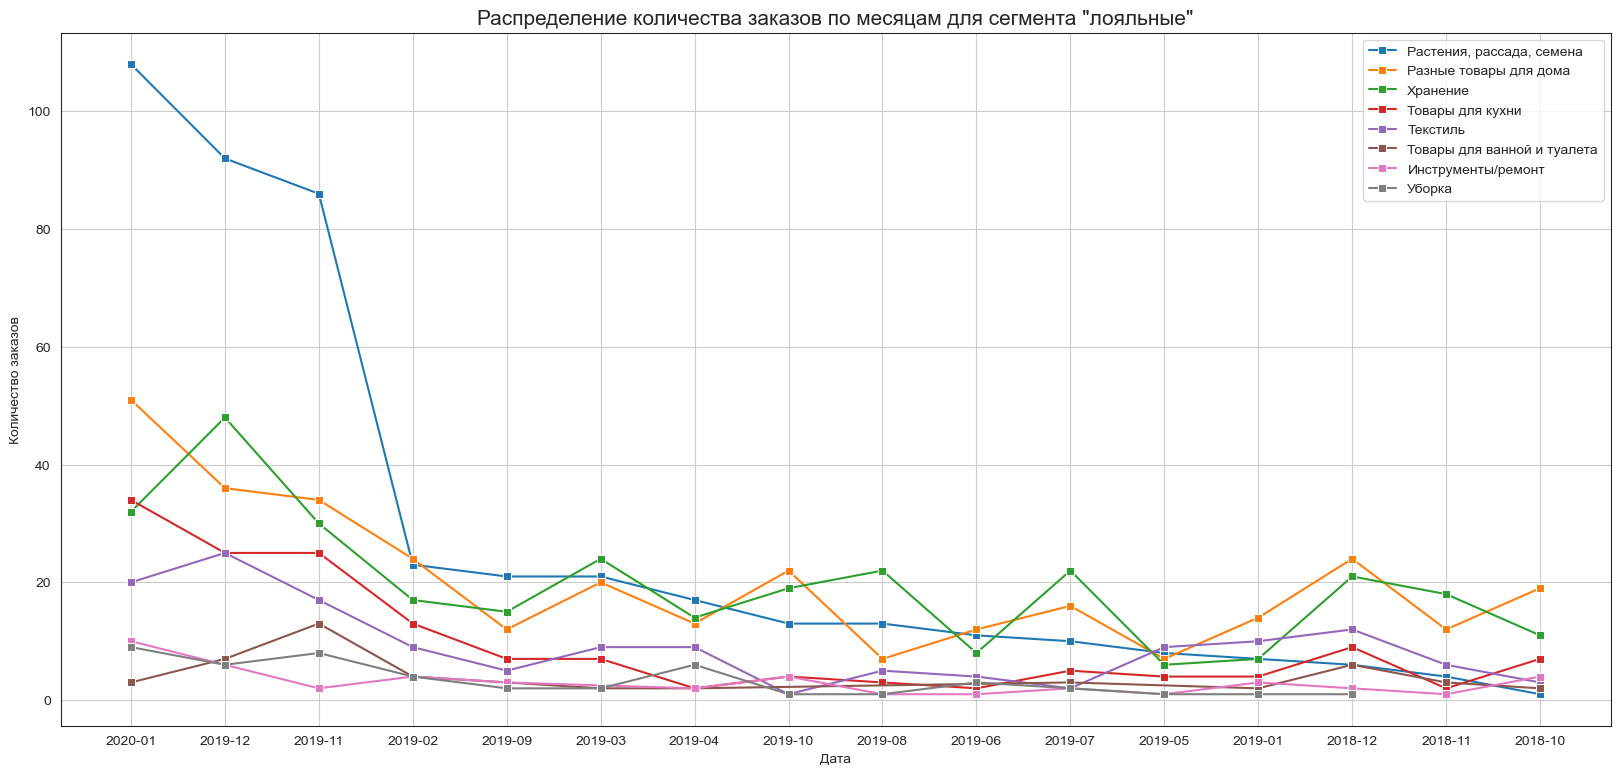

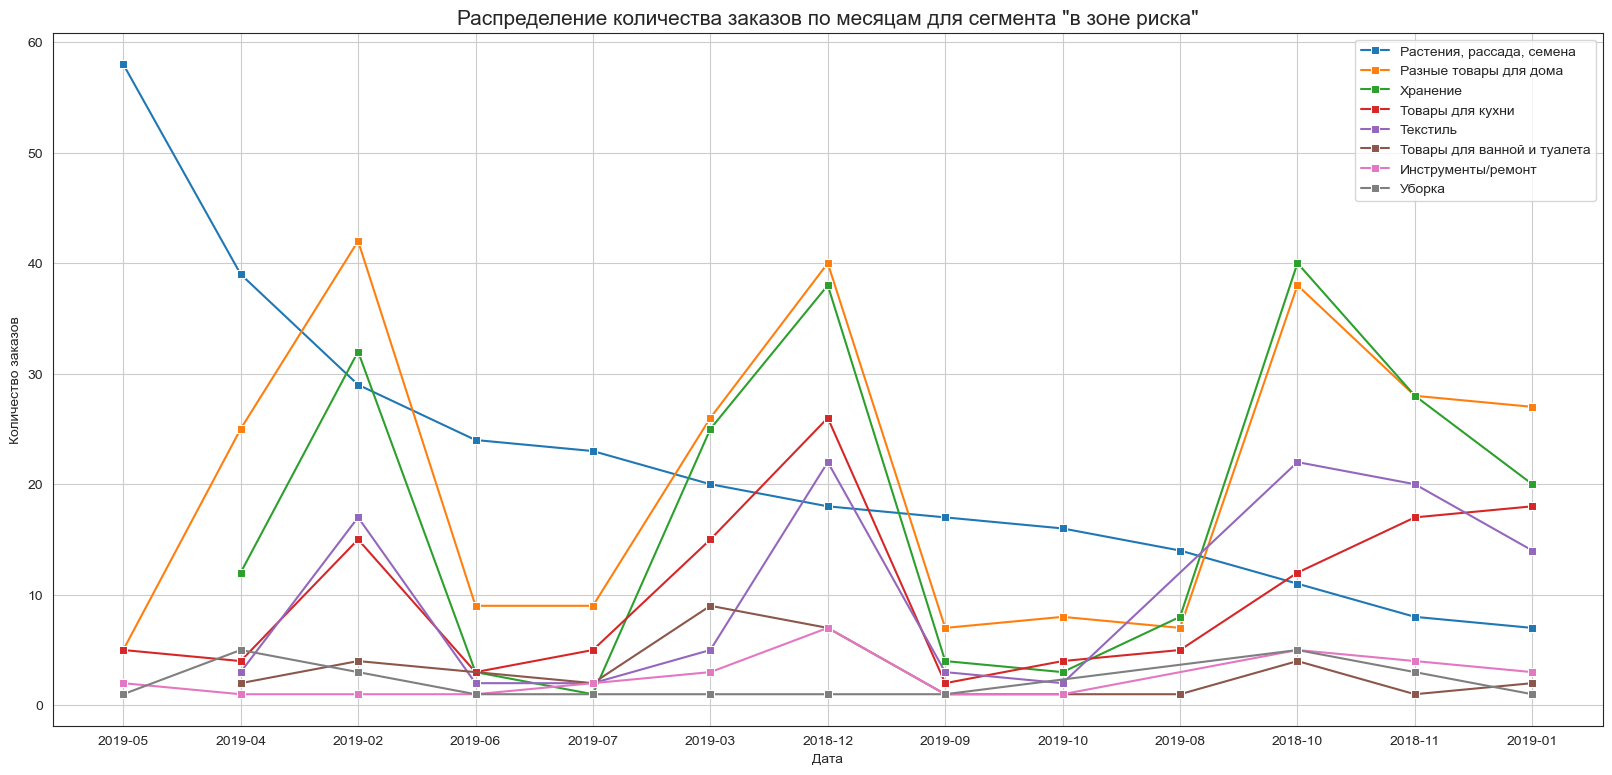

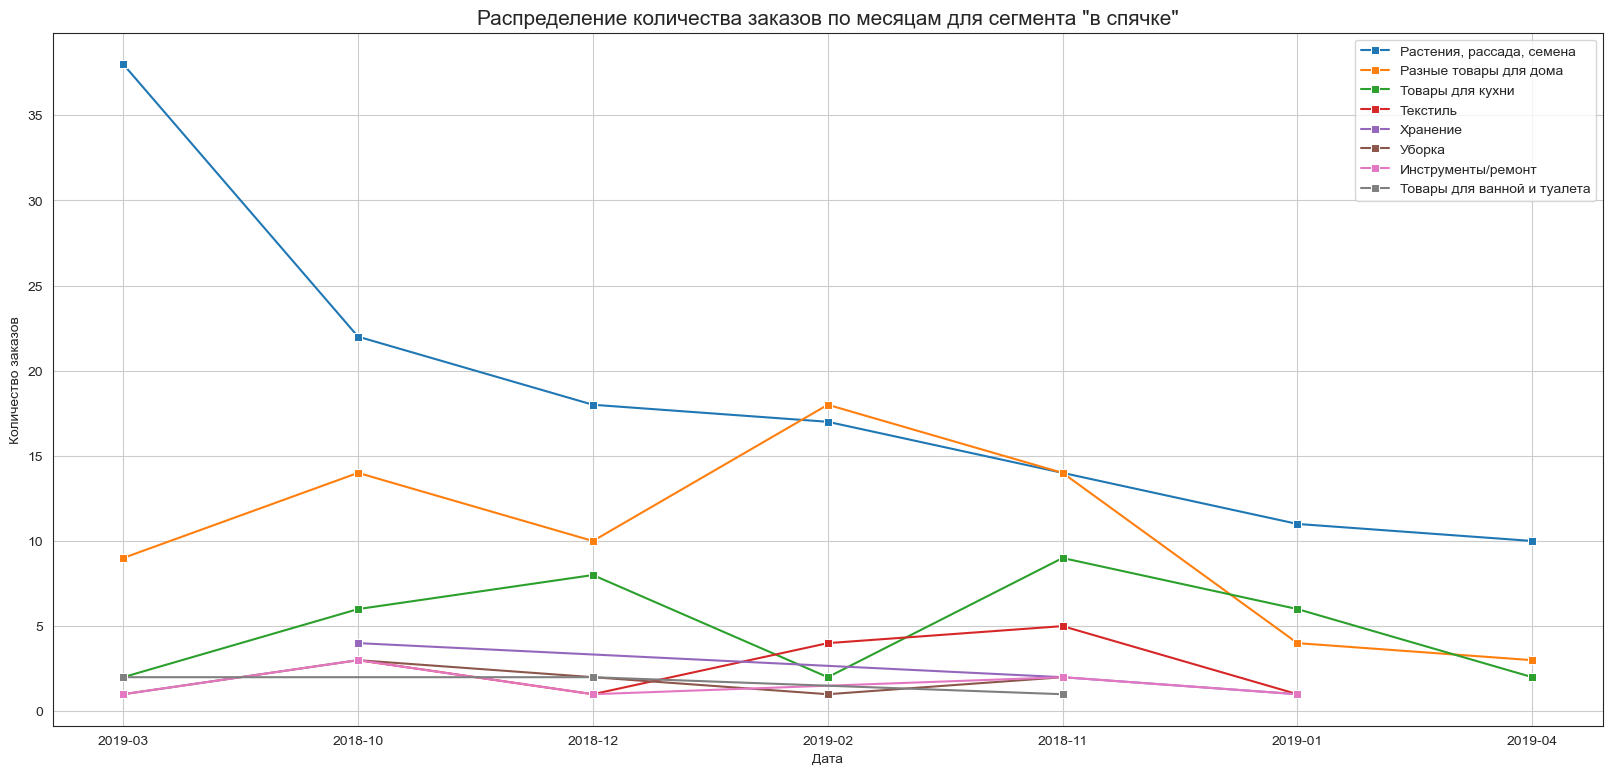

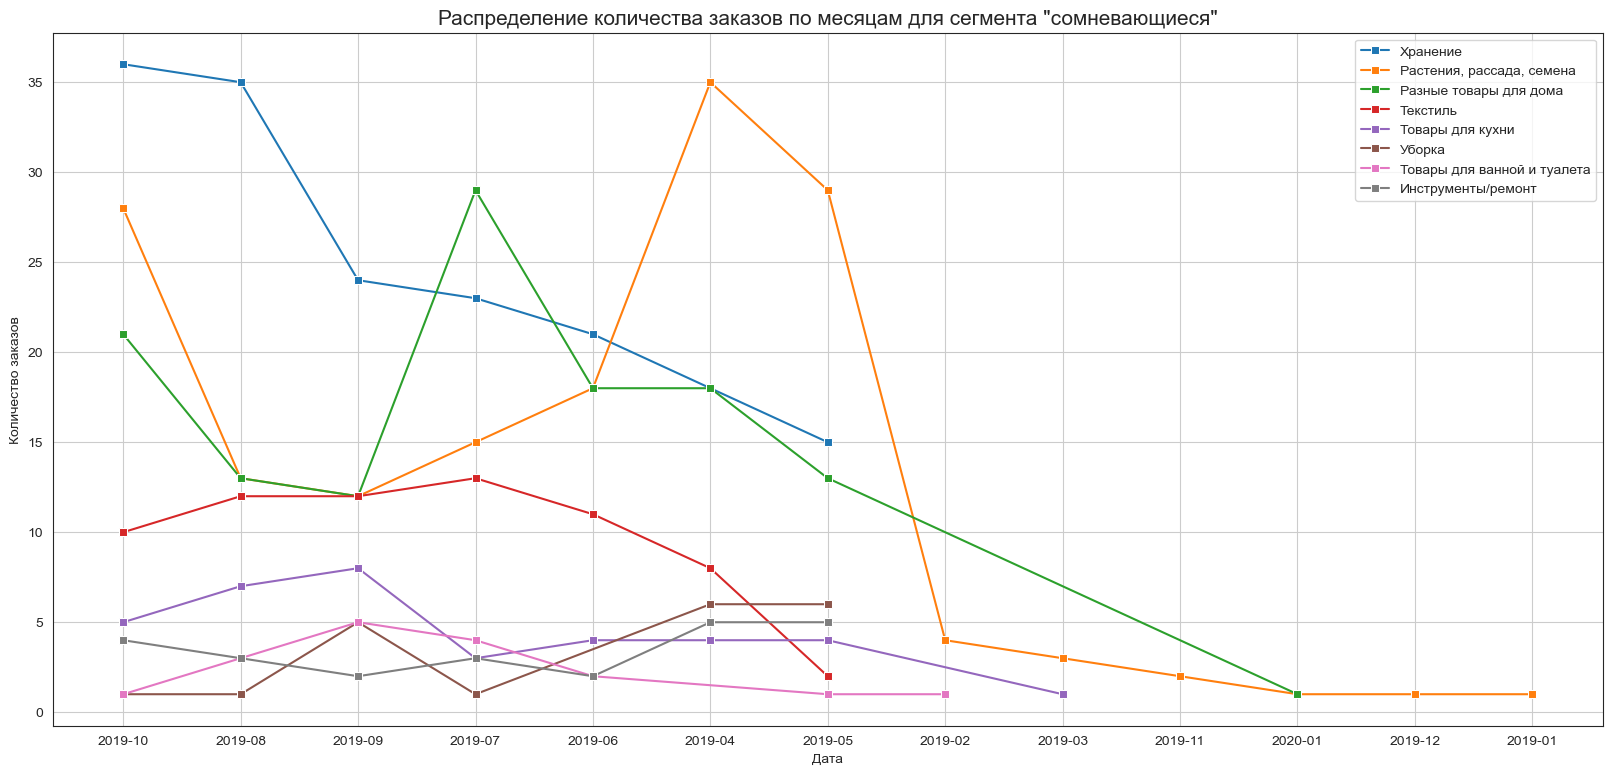

In [101]:
# Перебор уникальных профилей
for profile in final_orders['profile'].unique():
    plt.figure(figsize=(20, 9))
    
    # Перебор уникальных категорий для каждого профиля
    for category in final_orders[final_orders['profile'] == profile]['category'].unique():
        data = final_orders[(final_orders['profile'] == profile) & (final_orders['category'] == category)]
        
        sns.lineplot(data=data, x='month', y='count_orders', marker='s', label=category)
    
    plt.xlabel('Дата')
    plt.ylabel('Количество заказов')
    plt.title(f'Распределение количества заказов по месяцам для сегмента "{profile}"', fontsize=15)
    plt.legend() 
    plt.grid(True)
    plt.show()


1)**По сегменту "лояльные"** по всем категориям товаров наблюдается незначительное скачкообразное увеличение количества заказов с периодичностью в 2-3 месяца, а, начиная с октября 2019 года наблюдается резкое увеличения спроса по  категориям, особенно по категории  "Растения, рассада, семена". Возможно, в конце года была распродажа к Новому году и покупатели закупались впрок на следующий сезон.
Чтобы не потерять лояльность данного сегмента можно попробовать расширить границы сотрудничества путем включения в программу лояльности, приглашая на специальные мероприятия или же проводя анкетирование на предмет пожеланий к развитию интернет-магазина.

2)**По сегменту "в зоне риска"** по всем категориям товаров наблюдается снижение закупок , начиная с апреля-мая 2019 года. При этом следует отметить, что до снижения закупок по категории "Растения, рассада, семена" наблюдается всплеск по закупке в мае 2019 года - спрос на данную категорию носит сезонный характер, покупатели закупаются данной категорией накануне дачного сезона.

В целом, если смотреть на данный сегмент покупателей можно отметить хороший спрос до падения закупок по категориям товаров "Растения, рассада, семена", "Хранение", "Разные товары для дома", "Товары для кухни" и "Текстиль". 
С учетом того, что к сегменту "в зоне риска" относятся покупатели, которые давно не совершали покупок в интернет-магазине, можно попробовать простимулировать их и побудить к покупкам (особенное тех, чей RFM "321", "311" и "312") путем рассылки промокодов на скидку, индивидуальных предложений, особенно по категориям "Растения, рассада, семена", "Хранение", "Разные товары для дома", "Товары для кухни" и "Текстиль".

3)**К сегменту "в спячке"** относятся покупатели, которые совершали покупки давно и на маленькие суммы. По графику видно, что данный сегмент перестал закупаться, начиная с апреля 2019 года, т.е. более 9 месяцев назад. Ранее наблюдались хорошие закупки по категориям "Растения, рассада, семена" и  "Разные товары для дома". Можно попробовать реанимировать данный сегмент путем рассылок промокодов, но, скорее всего, не стоит рассчитывать на большую конверсию в покупки, так как прошло уже достаточно много  времени с момента последней покупки.

4)**"Сомневающиеся"** являются наиболее перспективным для перехода в "лояльные" сегментом. По нему по всем категориям, кроме категории "Растения, рассада, семена" и "Разные товары для дома" закупка по остальным категориям была последний раз в октябре 2019 года. По  "Растения, рассада, семена" и "Разные товары для дома" совершались незначительные покупки в ноябре 2019 года-январе 2020 года. 

Для стимулирования спроса по данному сегменту Можно попробовать  сделать рассылку с промокодами, а также параллельно разослать информацию  с полезным образовательным/информационным контентом  применительно к предлагаемому интернет-магазином ассортиментов, особенно по категориям "Разные товары для дома" , "Растения, рассада, семена" и "Хранение" как наиболее привлекательные направления товаров (судя по производимым ранее закупкам). Также можно предложить скидку на сопутствуюзий товар.

**Выручка по сегментам покупателей по категориям товаров**

In [102]:
# Сгруппируем датасет по категориям, сегментам и посчитаем суммарную выручку
final_revenue = (df_final.groupby(['month', 'category','profile'])
                 .agg(revenue=('revenue', 'sum'))
                .sort_values(by='revenue', ascending=False)
                .reset_index()
                )
final_revenue

month                category        profile  revenue
0    2019-12                Хранение       лояльные 95565.50
1    2018-11                Хранение   в зоне риска 91638.00
2    2018-12                Хранение   в зоне риска 86847.00
3    2019-02                Хранение   в зоне риска 76561.00
4    2019-06                Хранение  сомневающиеся 71639.00
..       ...                     ...            ...      ...
315  2019-10      Инструменты/ремонт   в зоне риска    88.00
316  2018-12      Инструменты/ремонт       в спячке    74.00
317  2019-09                  Уборка   в зоне риска    74.00
318  2018-11      Инструменты/ремонт       лояльные    67.00
319  2020-01  Разные товары для дома  сомневающиеся    15.00

[320 rows x 4 columns]

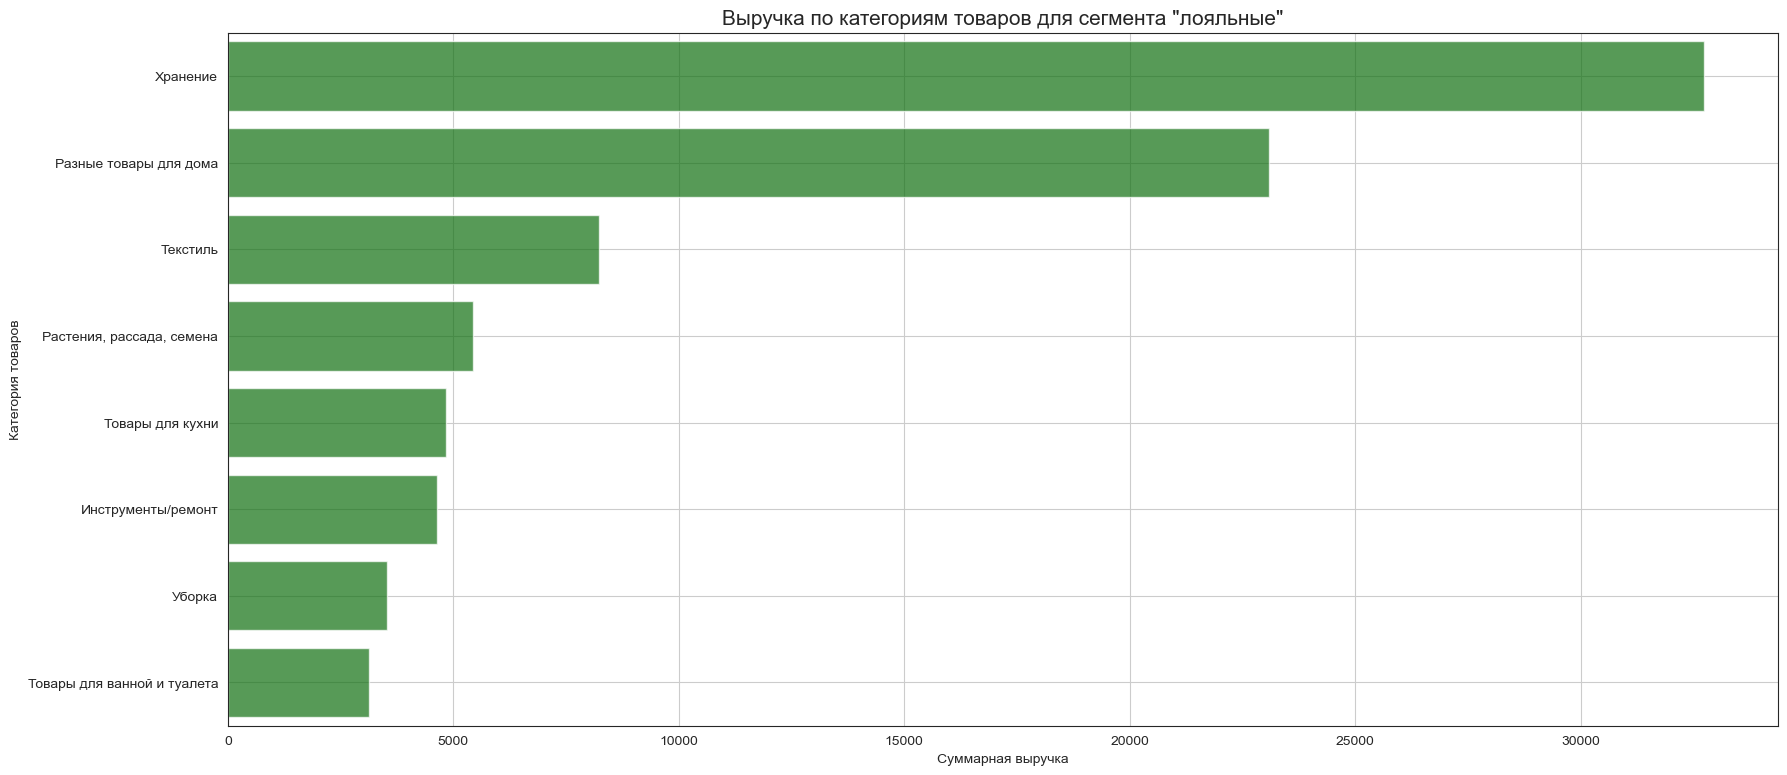

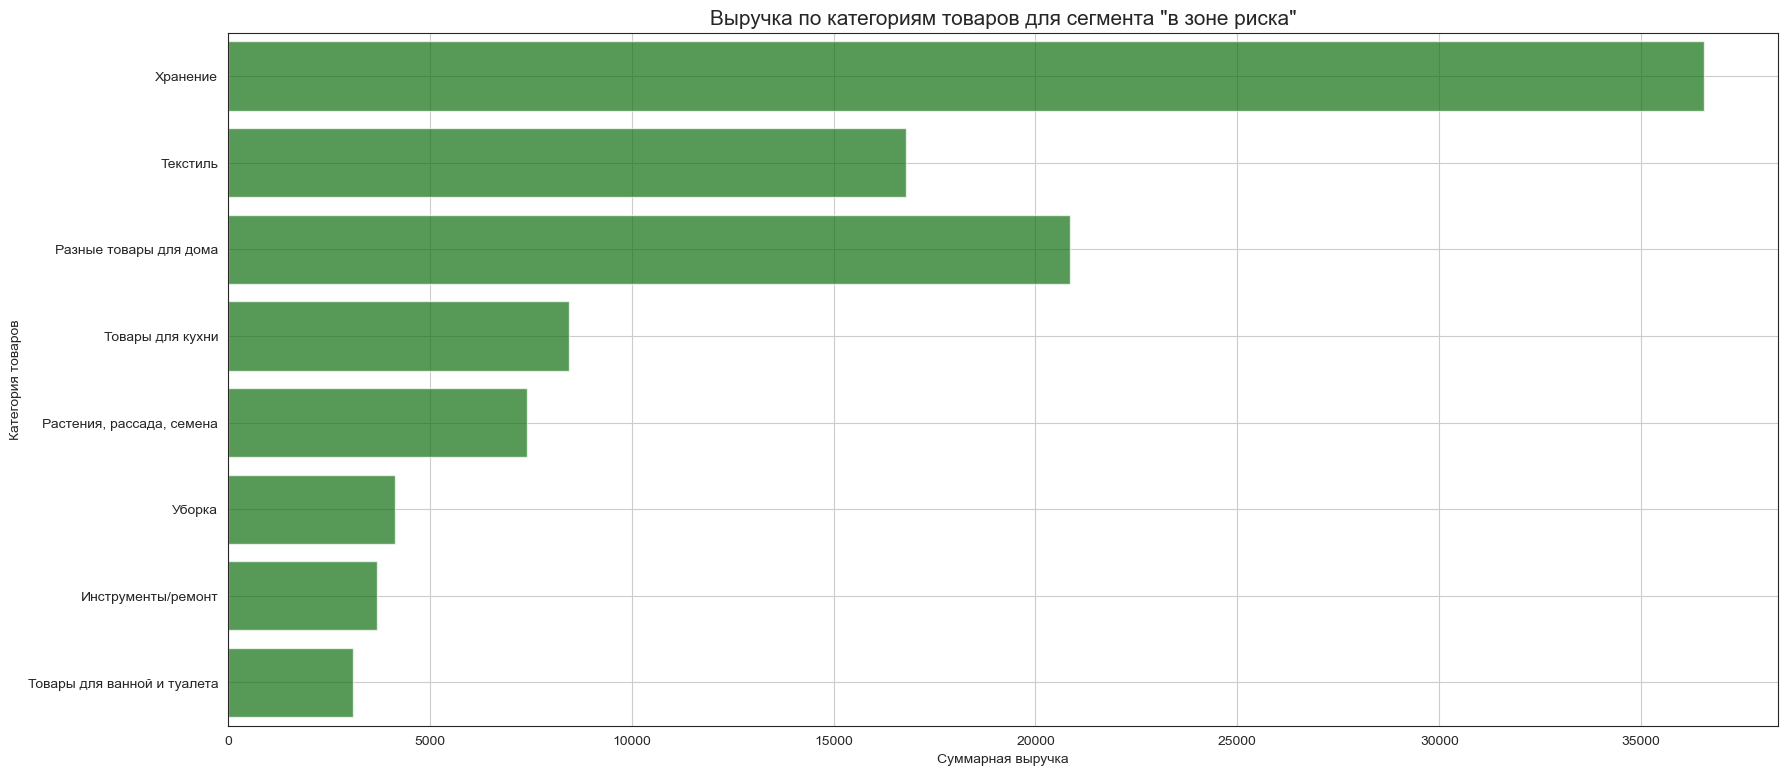

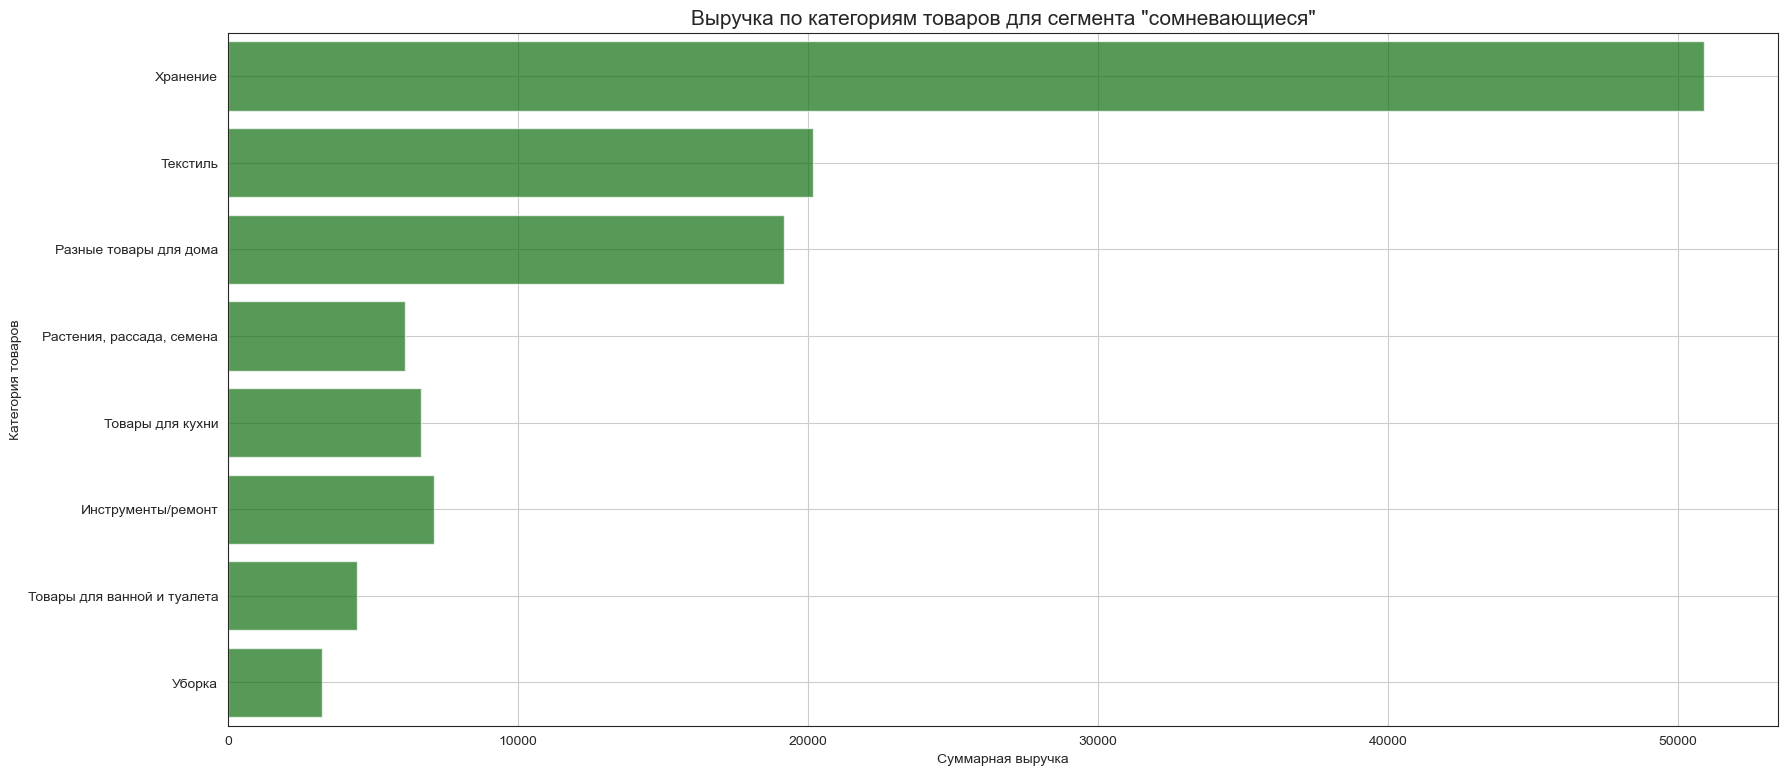

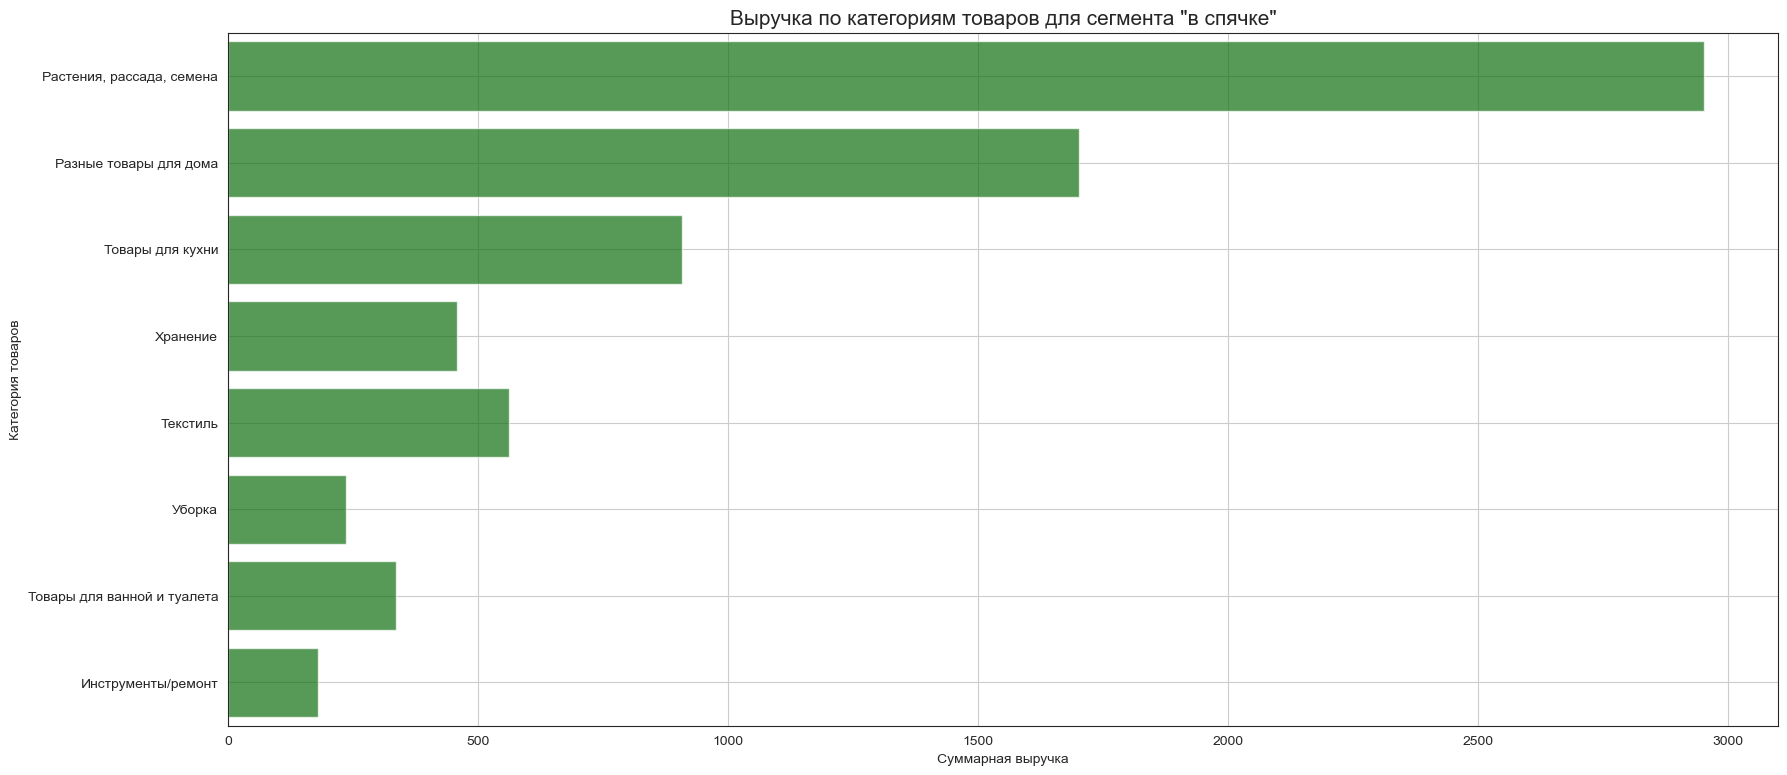

In [103]:
# Перебор уникальных профилей
for profile in final_revenue['profile'].unique():
    plt.figure(figsize=(20, 9))
    
    data = final_revenue[final_revenue['profile'] == profile]
    data = data.sort_values(by='revenue', ascending=False)  # Сортировка данных по убыванию выручки
    palette = ['Green']
    sns.barplot(x='revenue', y='category', data=data, palette=palette, alpha=0.7, ci=None)
    
    
    
    plt.xlabel('Суммарная выручка')
    plt.ylabel('Категория товаров')
    plt.title(f'Выручка по категориям товаров для сегмента "{profile}"', fontsize=15)
    
        
    plt.grid(True)
    
    plt.show()


* **По сегменту "лояльные"** самая большая суммарная выручка по категории "Хранение", далее следуют (в порядке убывания) "Разные товары для дома" и "Текстиль". Наименее всего выручки принесла категория "Товары для ванной и туалета";

* Такие же топ-3 категории по выручке, как и в сегменте "лояльные", наблюдаются **по сегменту "в зоне риска"** - "Хранение",  "Разные товары для дома" и "Текстиль". И наименее популярная категория "Товары для ванной и туалета" также совпадает;

* **По сегменту "сомневающиеся"** самая большая суммарная выручка по категории "Хранение", далее следуют (в порядке убывания) "Текстиль" и "Разные товары для дома". Наименее всего выручки принесла категория "Уборка";

* **По сегменту "в спячке"** самая большая суммарная выручка по категории "Растения, рассада, семена", далее следуют (в порядке убывания) "Разные товары для дома" и "Товары для кухни". Наименее всего выручки принесла категория "Инструменты/ремонт".



**Средний чек по сегментам покупателей по категориям товаров**

In [104]:
# Сгруппируем датасет по категориям, сегментам и посчитаем средний чек

final_bill = (df_final
                  .groupby(['category','profile'])
                  .agg(orders_count=('order_id','count'), revenues=('revenue', 'sum'))
                 .reset_index()
                 )
final_bill['avg_bill'] = final_bill['revenues'] / final_bill['orders_count']
final_bill = final_bill.sort_values(by='avg_bill', ascending=False).reset_index(drop=True)
display(final_bill.style.background_gradient('Blues'))



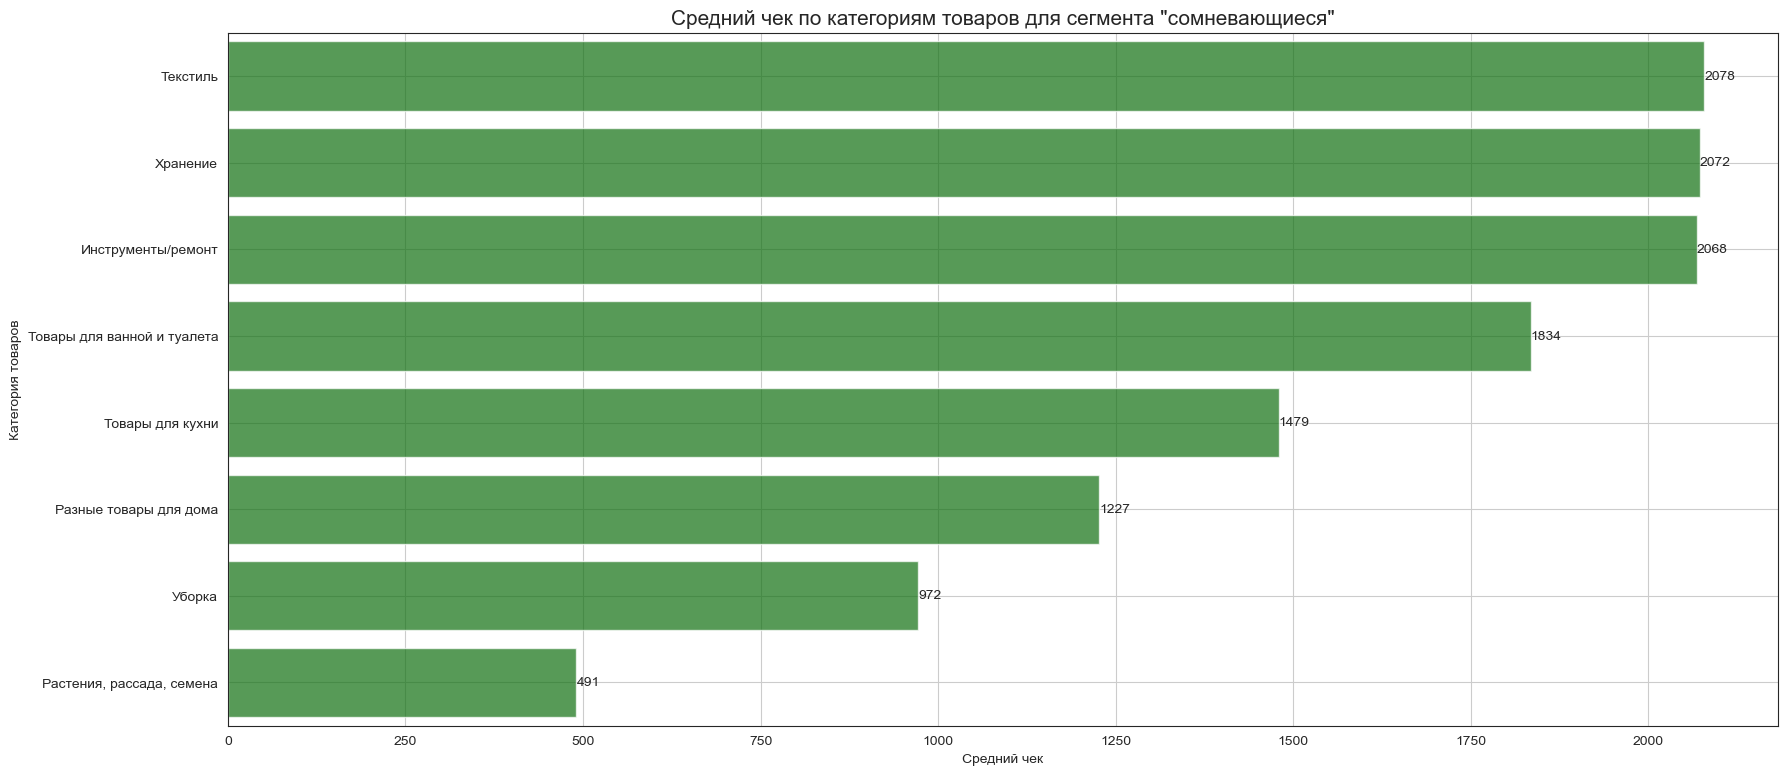

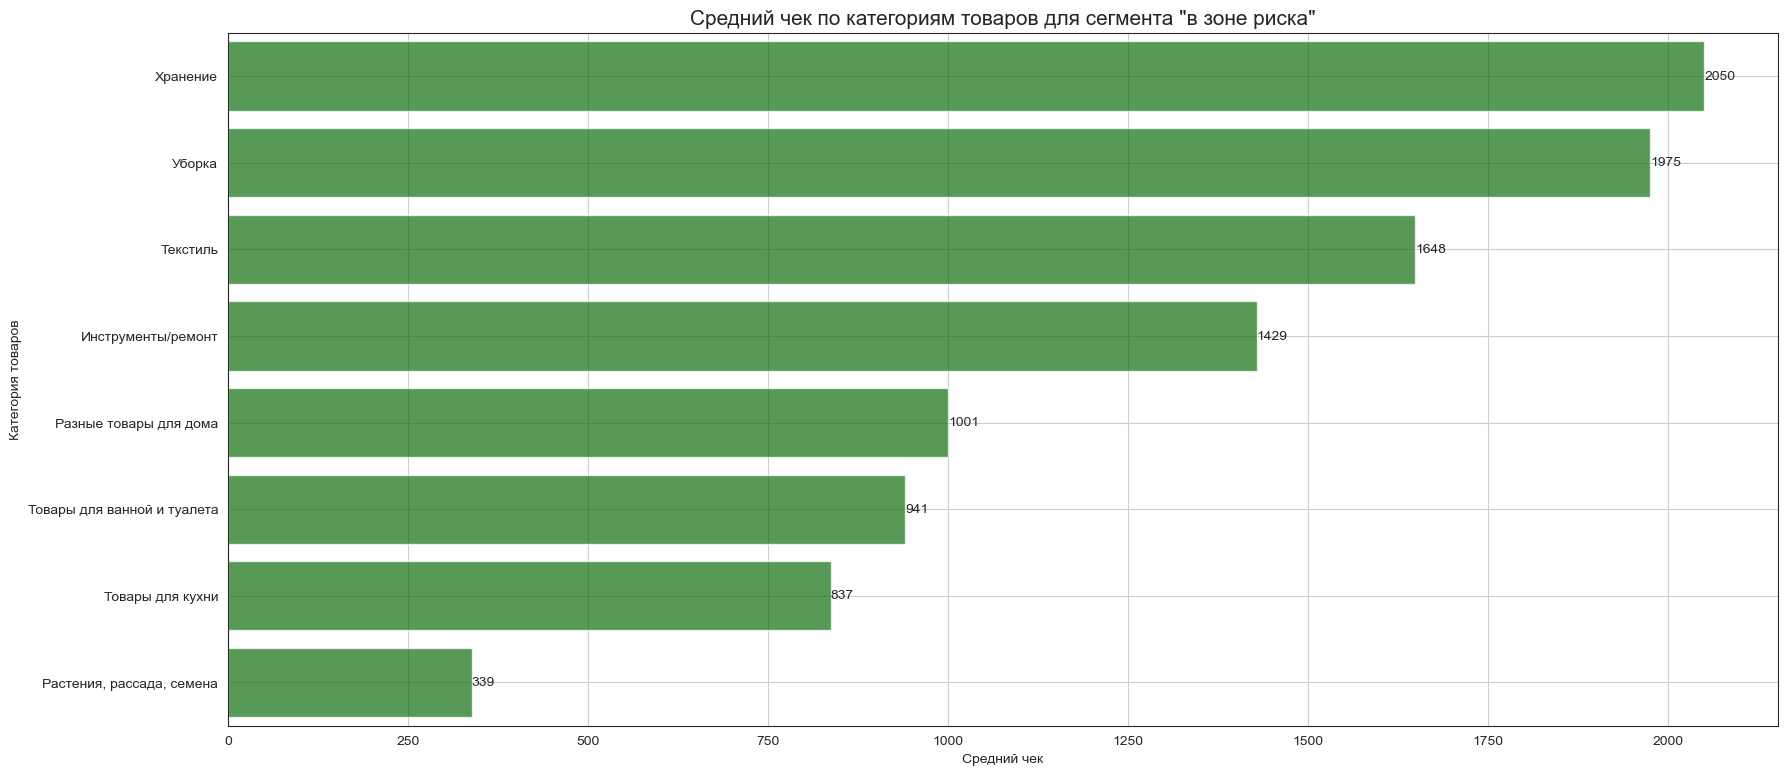

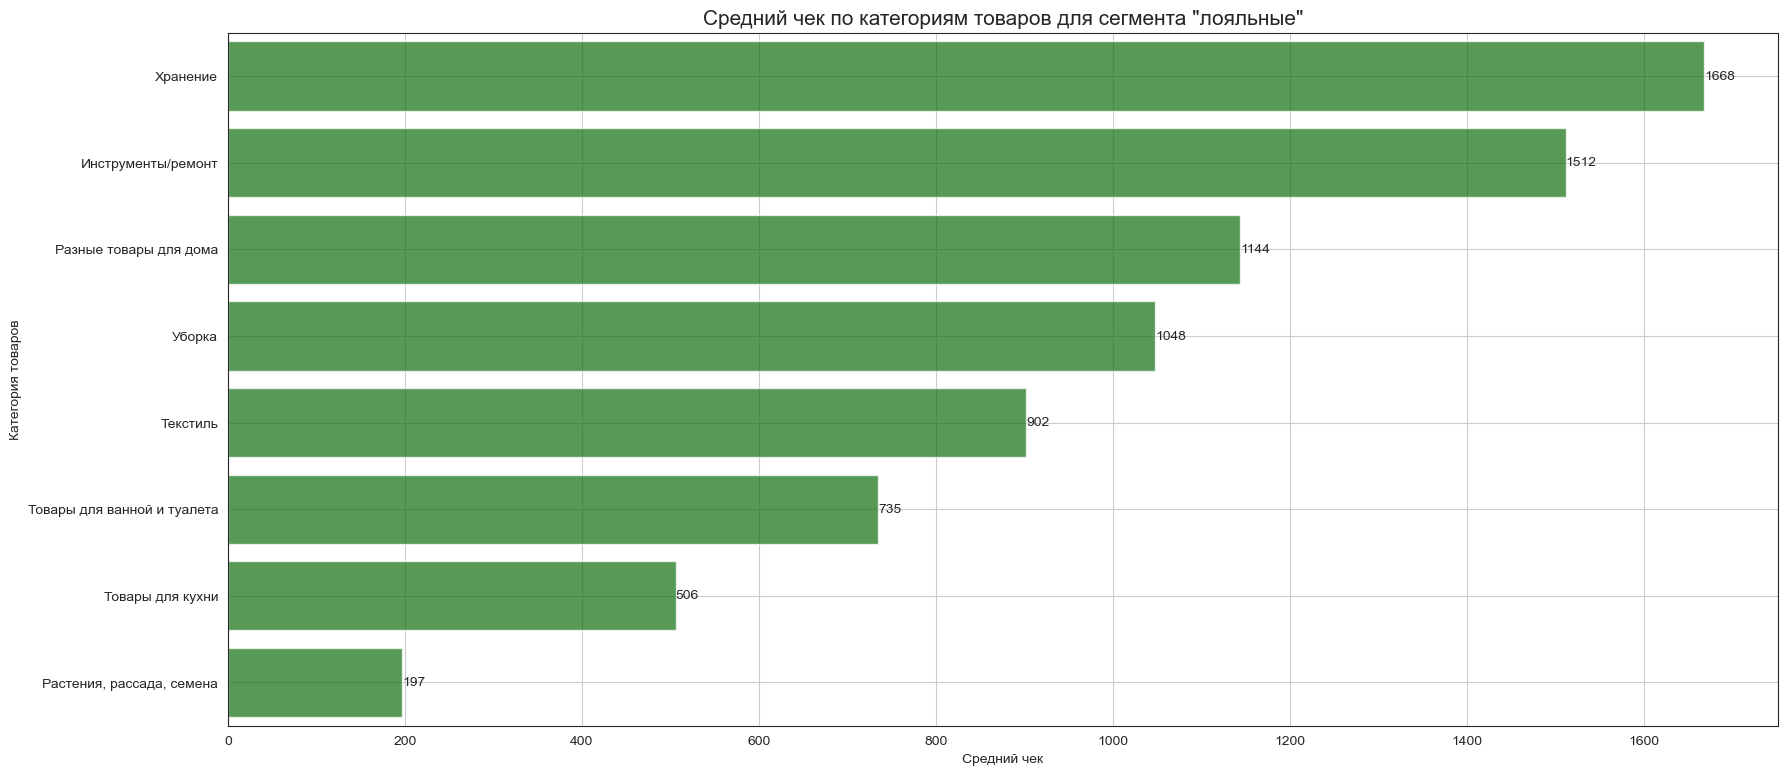

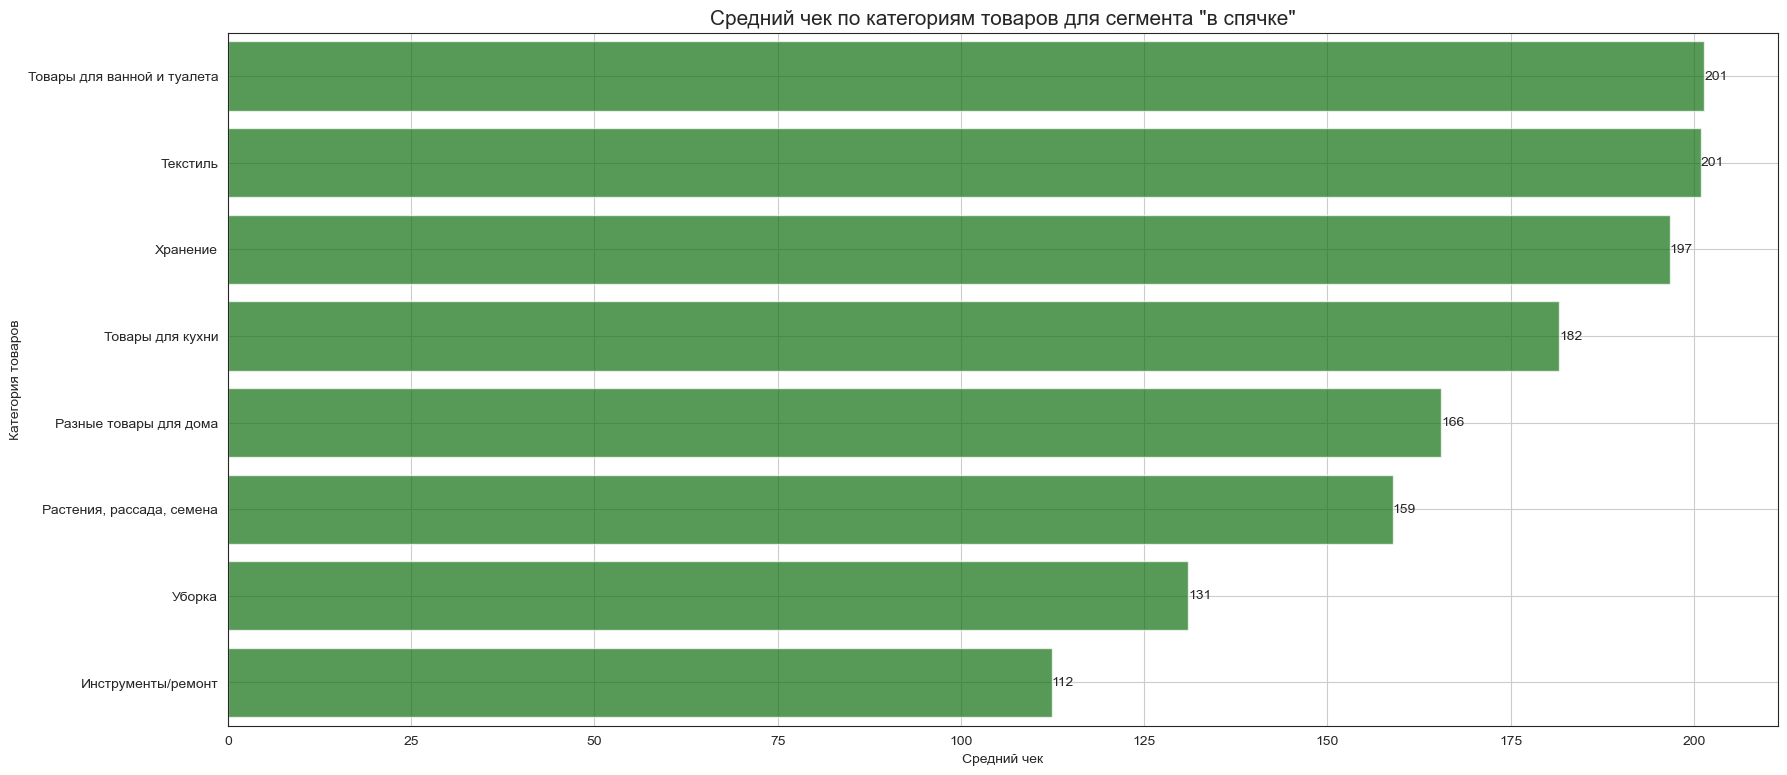

In [105]:
# Перебор уникальных профилей
for profile in final_bill['profile'].unique():
    plt.figure(figsize=(20, 9))
    
    data = final_bill[final_bill['profile'] == profile]
    data = data.sort_values(by='avg_bill', ascending=False)  # Сортировка данных по убыванию выручки
    palette = ['Green']
    sns.barplot(x='avg_bill', y='category', data=data, palette=palette, alpha=0.7, ci=None)
    
    
    
    plt.xlabel('Средний чек')
    plt.ylabel('Категория товаров')
    plt.title(f'Средний чек по категориям товаров для сегмента "{profile}"', fontsize=15)
    
    # Добавление подписей на столбцы с округлением до целого числа
    for i in range(len(data)):
        plt.annotate(f"{round(data['avg_bill'].iloc[i])}", (data['avg_bill'].iloc[i], i), ha='left', va='center')

    plt.grid(True)
    plt.show()


* **По сегменту "сомневающиеся"** практически одинаковые самые высокие средние чеки   по категориям "Текстиль", "Хранение" и  "Инструменты/ремонт". Наименьший средний чек  у категории "Растения, рассада, семена";

* **По сегменту "в зоне риска"** самый высокий средний чек  по категории "Хранение", далее следуют (в порядке убывания) "Уборка" и "Текстиль". Наименьший средний чек  у категории "Растения, рассада, семена";

* **По сегменту "лояльные"** самый высокий средний чек  по категории "Хранение", далее следуют (в порядке убывания) "Инструменты/ремонт" и "Разные товары для дома". Наименьший средний чек  у категории "Растения, рассада, семена";

* **По сегменту "в спячке"** самый высокий средний чек  по категории "Товары для ванной и туалета", далее следуют (в порядке убывания) "Текстиль" и "Хранение". Наименьший средний чек  у категории "Инструменты/ремонт".

**Вывод по п.4 Сегментация покупателей на основе истории покупок:**

В данном разделе была проведена **Сегментация покупателей по покупкам (RFM- анализ)**, в результате которой на основании признаков Recency — давность, Frequency — частота и Monetary — деньги было выделено **18 сегментов покупателей по истории их покупок**.

**Топ-5 сегментов покупателей по истории покупок**:
* 111 - 372 покупателя (покупали часто, не так давно и на большие суммы);
* 223 - 325 покупателя (покупали не так часто, сравнительно давно и на небольшие суммы);
* 323 - 280 покупателей (покупали не так часто, давно и на небольшие суммы);
* 322 - 279 покупателей (покупали не так часто, давно и на средние суммы);
* 112 - 246 покупателей (покупали часто, не так давно и на средние суммы).

Далее было проведено **Обобщение полученных сегментов в группы:**

Ранее полученные на основании RFM- анализа 18 сегментов покупателей укрупнили по группам:
* сомневающиеся	(506 покупателей);
* лояльные	(768 покупателей);
* в спячке	(280 покупателей);
* в зоне риска	(875 покупателей).

В заключение пункта был включен раздел **Анализ полученных групп по категориям товара/сезонности**, рассматривающий сезонность продаж по сегментам покупателей по категориям товаров, выручку по сегментам покупателей по категориям товаров и средний чек по сегментам покупателей по категориям товаров.

*Были сформулированы следующие выводы:*

**Сезонность продаж по сегментам покупателей по категориям товаров:**

* **По сегменту "лояльные"** по всем категориям товаров наблюдается незначительное скачкообразное увеличение количества заказов с периодичностью в 2-3 месяца, а, начиная с октября 2019 года наблюдается резкое увеличения спроса по  категориям, особенно по категории  "Растения, рассада, семена". Возможно, в конце года была распродажа к Новому году и покупатели закупались впрок на следующий сезон.
Чтобы не потерять лояльность данного сегмента можно попробовать расширить границы сотрудничества путем включения в программу лояльности, приглашая на специальные мероприятия или же проводя анкетирование на предмет пожеланий к развитию интернет-магазина.

* **По сегменту "в зоне риска"** по всем категориям товаров наблюдается снижение закупок , начиная с апреля-мая 2019 года. При этом следует отметить, что до снижения закупок по категории "Растения, рассада, семена" наблюдается всплеск по закупке в мае 2019 года - спрос на данную категорию носит сезонный характер, покупатели закупаются данной категорией накануне дачного сезона.

В целом, если смотреть на данный сегмент покупателей можно отметить хороший спрос до падения закупок по категориям товаров "Растения, рассада, семена", "Хранение", "Разные товары для дома", "Товары для кухни" и "Текстиль". 
С учетом того, что к сегменту "в зоне риска" относятся покупатели, которые давно не совершали покупок в интернет-магазине, можно попробовать простимулировать их и побудить к покупкам (особенное тех, чей RFM "321", "311" и "312") путем рассылки промокодов на скидку, индивидуальных предложений, особенно по категориям "Растения, рассада, семена", "Хранение", "Разные товары для дома", "Товары для кухни" и "Текстиль".

* **К сегменту "в спячке"** относятся покупатели, которые совершали покупки давно и на маленькие суммы. По графику видно, что данный сегмент перестал закупаться, начиная с апреля 2019 года, т.е. более 9 месяцев назад. Ранее наблюдались хорошие закупки по категориям "Растения, рассада, семена" и  "Разные товары для дома". Можно попробовать реанимировать данный сегмент путем рассылок промокодов, но, скорее всего, не стоит рассчитывать на большую конверсию в покупки, так как прошло уже достаточно много  времени с момента последней покупки.

* **"Сомневающиеся"** являются наиболее перспективным для перехода в "лояльные" сегментом. По нему по всем категориям, кроме категории "Растения, рассада, семена" и "Разные товары для дома" закупка по остальным категориям была последний раз в октябре 2019 года. По  "Растения, рассада, семена" и "Разные товары для дома" совершались незначительные покупки в ноябре 2019 года-январе 2020 года. 

Для стимулирования спроса по данному сегменту Можно попробовать  сделать рассылку с промокодами, а также параллельно разослать информацию  с полезным образовательным/информационным контентом  применительно к предлагаемому интернет-магазином ассортиментов, особенно по категориям "Разные товары для дома" , "Растения, рассада, семена" и "Хранение" как наиболее привлекательные направления товаров (судя по производимым ранее закупкам). Также можно предложить скидку на сопутствуюзий товар.

**Выручка по сегментам покупателей по категориям товаров:**

* **По сегменту "лояльные"** самая большая суммарная выручка по категории "Хранение", далее следуют (в порядке убывания) "Разные товары для дома" и "Текстиль". Наименее всего выручки принесла категория "Товары для ванной и туалета";

* Такие же топ-3 категории по выручке, как и в сегменте "лояльные", наблюдаются **по сегменту "в зоне риска"** - "Хранение",  "Разные товары для дома" и "Текстиль". И наименее популярная категория "Товары для ванной и туалета" также совпадает;

* **По сегменту "сомневающиеся"** самая большая суммарная выручка по категории "Хранение", далее следуют (в порядке убывания) "Текстиль" и "Разные товары для дома". Наименее всего выручки принесла категория "Уборка";

* **По сегменту "в спячке"** самая большая суммарная выручка по категории "Растения, рассада, семена", далее следуют (в порядке убывания) "Разные товары для дома" и "Товары для кухни". Наименее всего выручки принесла категория "Инструменты/ремонт".

**Средний чек по сегментам покупателей по категориям товаров:**

* **По сегменту "сомневающиеся"** практически одинаковые самые высокие средние чеки   по категориям "Текстиль", "Хранение" и  "Инструменты/ремонт". Наименьший средний чек  у категории "Растения, рассада, семена";

* **По сегменту "в зоне риска"** самый высокий средний чек  по категории "Хранение", далее следуют (в порядке убывания) "Уборка" и "Текстиль". Наименьший средний чек  у категории "Растения, рассада, семена";

* **По сегменту "лояльные"** самый высокий средний чек  по категории "Хранение", далее следуют (в порядке убывания) "Инструменты/ремонт" и "Разные товары для дома". Наименьший средний чек  у категории "Растения, рассада, семена";

* **По сегменту "в спячке"** самый высокий средний чек  по категории "Товары для ванной и туалета", далее следуют (в порядке убывания) "Текстиль" и "Хранение". Наименьший средний чек  у категории "Инструменты/ремонт".




##  Проверка статистических гипотез

### Статистическая значимость различий в среднем чеке заказа между сегментами покупателей

Найдем статистическую значимость различий в среднем чеке заказа между сегментами покупателей.

Для этого сначала сформируем сводную таблицу, группирующую данные по кластерам,с расчетным значением среднего чека, затем проверим на нормальность критерием  Шапиро-Уилка получившиеся значения среднего чека и выберем статистический метод  проверки гипотез.

In [106]:
# Сгруппируем датасет по покупателям,сегментам и посчитаем средний чек

final_profile_bill = (df_final
                  .groupby(['customer_id','profile'])
                  .agg(orders_count=('order_id','count'), revenues=('revenue', 'sum'))
                 .reset_index()
                 )
final_profile_bill['avg_bill'] = final_profile_bill['revenues'] / final_profile_bill['orders_count']
final_profile_bill = final_profile_bill.sort_values(by='avg_bill', ascending=False).reset_index(drop=True)
display(final_profile_bill.head())


customer_id        profile  orders_count  \
0  146cd9bf-a95c-4afb-915b-5f6684b17444  сомневающиеся             1   
1  6987e6d6-a63a-4ce2-a2d0-f424092d235e   в зоне риска             1   
2  58a4c3cc-504f-43ea-a74a-bae19e665552   в зоне риска             2   
3  1b2764ad-9151-4051-a46a-9b01b62e6335   в зоне риска             1   
4  909564b8-3a5c-4d3e-8310-5ba1c837bbd7   в зоне риска             1   

   revenues  avg_bill  
0  49432.00  49432.00  
1  32718.00  32718.00  
2  53232.00  26616.00  
3  24370.00  24370.00  
4  16536.00  16536.00

In [107]:
# Проверим на нормальность распределение средних чеков путем рассчета критерия Шапиро-Уилка
alpha = 0.05

results = st.shapiro(final_profile_bill['avg_bill'])
p_value = results[1]

print('p-значение: ', p_value)

if p_value<alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Так как распределение не нормально, будем проверять наши гипотезы непараметрическим тестом Уилкоксона-Манна-Уитни.
Чтобы снизить вероятность ложнопозитивного результата при множественном тестировании гипотез применим метод Шидака для корректировки уровня  альфа- α1=...=αm=1−(1−α)1/m, где m - количество тестов (в нашем случае m = 12 - 6 событий на 2 теста).

Сформулируем нулевую и альтернативную гипотезы:

**Нулевая гипотеза:** Нет различий в среднем чеке между сегментами покупателей

**Альтернативная гипотеза:** Есть различия в среднем чеке между между сегментами покупателей

Коэффициент альфа: 0.05


In [108]:
# Сформируем группы по сегментам для сравнения по среднему чеку
avg_bill_1=final_profile_bill[final_profile_bill['profile']=='сомневающиеся']['avg_bill']
avg_bill_2=final_profile_bill[final_profile_bill['profile']=='в зоне риска']['avg_bill']
avg_bill_3=final_profile_bill[final_profile_bill['profile']=='лояльные']['avg_bill']
avg_bill_4=final_profile_bill[final_profile_bill['profile']=='в спячке']['avg_bill']

In [109]:
alpha = 1 - (1 - 0.05) ** (1/12) # для корректности применим метод Шидака 

# 1 пара 'сомневающиеся' и 'в зоне риска'
results = st.mannwhitneyu(avg_bill_1,avg_bill_2)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')

else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  2.8338967078860038e-15
Отвергаем нулевую гипотезу: разница статистически значима


In [110]:
alpha = 1 - (1 - 0.05) ** (1/12) # для корректности применим метод Шидака 


# 2 пара 'сомневающиеся' и 'лояльные'
results = st.mannwhitneyu(avg_bill_1,avg_bill_3)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')

else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  3.388472876327536e-11
Отвергаем нулевую гипотезу: разница статистически значима


In [111]:
alpha = 1 - (1 - 0.05) ** (1/12) # для корректности применим метод Шидака 


# 3 пара 'сомневающиеся' и 'в спячке'
results = st.mannwhitneyu(avg_bill_1,avg_bill_4)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')

else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  6.851959118217784e-86
Отвергаем нулевую гипотезу: разница статистически значима


In [112]:
alpha = 1 - (1 - 0.05) ** (1/12) # для корректности применим метод Шидака 


# 4 пара 'в зоне риска' и 'лояльные'
results = st.mannwhitneyu(avg_bill_2,avg_bill_3)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')

else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  0.01078521665206638
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [113]:
alpha = 1 - (1 - 0.05) ** (1/12) # для корректности применим метод Шидака 


# 5 пара 'в зоне риска' и 'в спячке'
results = st.mannwhitneyu(avg_bill_2,avg_bill_4)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')

else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  6.269176039869984e-49
Отвергаем нулевую гипотезу: разница статистически значима


In [114]:
alpha = 1 - (1 - 0.05) ** (1/12) # для корректности применим метод Шидака 


# 6 пара 'лояльные' и 'в спячке'
results = st.mannwhitneyu(avg_bill_3,avg_bill_4)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')

else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  7.693449809724461e-78
Отвергаем нулевую гипотезу: разница статистически значима


 Проверка статистической гипотезы непараметрическим тестом Уилкоксона-Манна-Уитни показала различия в среднем чеке между парами сегментов покупателей:
- 'сомневающиеся' и 'в зоне риска';
- 'сомневающиеся' и 'лояльные';
- 'сомневающиеся' и 'в спячке';
- 'в зоне риска' и 'в спячке';
- 'лояльные' и 'в спячке'.

Между парой 'в зоне риска' и 'лояльные' не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.

### Статистическая значимость различий в количестве заказов между сегментами покупателей

In [115]:
# Сгруппируем датасет по покупателям ,сегментам и посчитаем количество заказов

final_profile_orders = (df_final
                  .groupby(['customer_id','profile'])
                  .agg(orders_count=('order_id', 'count'))
                 .reset_index()
                 )
final_profile_orders = final_profile_orders.sort_values(by='orders_count', ascending=False).reset_index(drop=True)
final_profile_orders.head()

customer_id        profile  orders_count
0  c971fb21-d54c-4134-938f-16b62ee86d3b   в зоне риска           126
1  4d93d3f6-8b24-403b-a74b-f5173e40d7db   в зоне риска            35
2  73d1cd35-5e5f-4629-8cf2-3fda829d4e58       лояльные            17
3  b7b865ab-0735-407f-8d0c-31f74d2806cc  сомневающиеся             7
4  0184f535-b60a-4914-a982-231e3f615206  сомневающиеся             5

In [116]:
# Проверим на нормальность распределение количества заказов путем расчета критерия Шапиро-Уилка
alpha = 0.05 

results = st.shapiro(final_profile_orders['orders_count'])
p_value = results[1]

print('p-значение: ', p_value)

if p_value<alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Так как распределение не нормально, будем проверять наши гипотезы непараметрическим тестом Уилкоксона-Манна-Уитни.
Чтобы снизить вероятность ложнопозитивного результата при множественном тестировании гипотез применим метод Шидака для корректировки уровня  альфа- α1=...=αm=1−(1−α)1/m, где m - количество тестов (в нашем случае m = 12 - 6 событий на 2 теста).

Сформулируем нулевую и альтернативную гипотезы:

**Нулевая гипотеза:**  Нет различий в количестве заказов между сегментами  покупателей

**Альтернативная гипотеза:** Есть различия в количестве заказов  между сегментами покупателей


In [117]:
# Сформируем группы по сегментам для сравнения по количеству заказов
orders_1=final_profile_orders[final_profile_orders['profile']=='сомневающиеся']['orders_count']
orders_2=final_profile_orders[final_profile_orders['profile']=='в зоне риска']['orders_count']
orders_3=final_profile_orders[final_profile_orders['profile']=='лояльные']['orders_count']
orders_4=final_profile_orders[final_profile_orders['profile']=='в спячке']['orders_count']

In [118]:
alpha = 1 - (1 - 0.05) ** (1/12) # для корректности применим метод Шидака 

# 1 пара 'сомневающиеся' и 'в зоне риска'
results = st.mannwhitneyu(orders_1,orders_2)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')

else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  4.036483030251987e-10
Отвергаем нулевую гипотезу: разница статистически значима


In [119]:
alpha = 1 - (1 - 0.05) ** (1/12) # для корректности применим метод Шидака 


# 2 пара 'сомневающиеся' и 'лояльные'
results = st.mannwhitneyu(orders_1,orders_3)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')

else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  1.6569109834275885e-157
Отвергаем нулевую гипотезу: разница статистически значима


In [120]:
alpha = 1 - (1 - 0.05) ** (1/12) # для корректности применим метод Шидака 


# 3 пара 'сомневающиеся' и 'в спячке'
results = st.mannwhitneyu(orders_1,orders_4)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')

else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  7.149664567480675e-14
Отвергаем нулевую гипотезу: разница статистически значима


In [121]:
alpha = 1 - (1 - 0.05) ** (1/12) # для корректности применим метод Шидака 


# 4 пара 'в зоне риска' и 'лояльные'
results = st.mannwhitneyu(orders_2,orders_3)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')

else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  1.3929857609262525e-274
Отвергаем нулевую гипотезу: разница статистически значима


In [122]:
alpha = 1 - (1 - 0.05) ** (1/12) # для корректности применим метод Шидака 


# 5 пара 'в зоне риска' и 'в спячке'
results = st.mannwhitneyu(orders_2,orders_4)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')

else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  5.715394202548779e-06
Отвергаем нулевую гипотезу: разница статистически значима


In [123]:
alpha = 1 - (1 - 0.05) ** (1/12) # для корректности применим метод Шидака 


# 6 пара 'лояльные' и 'в спячке'
results = st.mannwhitneyu(orders_3,orders_4)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')

else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  1.2564918663581757e-195
Отвергаем нулевую гипотезу: разница статистически значима


Проверка статистической гипотезы непараметрическим тестом Уилкоксона-Манна-Уитни показала различия в количестве заказов между всеми парами сегментов покупателей.

**Вывод по п.5 Проверка статистических гипотез:**

В данном разделе была осуществлена проверка **двух статистических гипотез**:

**1. Статистическая значимость различий в среднем чеке заказа между сегментами покупателей:**

1) Были сформулированы нулевая и альтернативная гипотезы:

*Нулевая гипотеза:* Нет различий в среднем чеке между сегментами покупателей

*Альтернативная гипотеза:* Есть различия в среднем чеке между сегментами покупателей

2) Полученные значения среднего чека по сегментам покупателей были проверены на нормальность критерием  Шапиро-Уилка.
Так как проверка показала, что распределение не нормально, был выбран непараметрический тест Уилкоксона-Манна-Уитни для проверки гипотезы;

3) Чтобы снизить вероятность ложнопозитивного результата при множественном тестировании гипотез применим метод Шидака для корректировки уровня  альфа- α1=...=αm=1−(1−α)1/m, где m - количество тестов (в нашем случае m = 12 - 6 событий на 2 теста);

4)  Проверка статистической гипотезы непараметрическим тестом Уилкоксона-Манна-Уитни показала различия в среднем чеке между парами сегментов покупателей:
- 'сомневающиеся' и 'в зоне риска';
- 'сомневающиеся' и 'лояльные';
- 'сомневающиеся' и 'в спячке';
- 'в зоне риска' и 'в спячке';
- 'лояльные' и 'в спячке'.

Между парой 'в зоне риска' и 'лояльные' не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.

**2. Статистическая значимость различий в количестве заказов  между сегментами покупателей:**

1) Были сформулированы нулевая и альтернативная гипотезы:

*Нулевая гипотеза:* Нет различий в количестве заказов между сегментами покупателей

*Альтернативная гипотеза:* Есть различия в количестве заказов  между сегментами покупателей

2) Полученные значения выручки по сегментам покупателей были проверены на нормальность критерием  Шапиро-Уилка.
Так как проверка показала, что распределение не нормально, был выбран непараметрический тест Уилкоксона-Манна-Уитни для проверки гипотезы;

3) Чтобы снизить вероятность ложнопозитивного результата при множественном тестировании гипотез применим метод Шидака для корректировки уровня  альфа- α1=...=αm=1−(1−α)1/m, где m - количество тестов (в нашем случае m = 12 - 6 событий на 2 теста);

4) Проверка статистической гипотезы непараметрическим тестом Уилкоксона-Манна-Уитни показала различия в количестве заказов между всеми парами сегментов покупателей.

**Обе статистические гипотезы показали различия  между парами сегментов покупателей - разбивка на сегменты покупателей на основе истории покупок была проведена корректно.**


## Общий вывод и рекомендации по разработке персонализированных предложений


<div style="border: 1px solid black; padding: 20px">
    
В ходе выполнения проекта было проведено исследование транзакций интернет-магазина товаров для дома и быта «Пока все ещё тут» на основе датасета с данными  за период с  1 октября 2018 года по 31 января 2020 года (487 дней).
    
Исследование состояло из пяти разделов. 
    
<span style="font-size:larger;">**1-й раздел**
    
</span>   Так,  в ходе <span style="font-size:larger;">**Обзора данных**</span> было установлено, что:
1. Файл с данными о  транзакциях интернет-магазина товаров для дома и быта «Пока все ещё тут» состоит из 7474 строк в 6 столбцах;

2. Количество уникальных покупателей:2451;

3. Количество уникальных заказов:3521;

4. Пропуски в данных отсутствуют;

5. Явные дубликаты отсутствуют;

6. Датасет хранит 2 строковых столбца, 1 численный и 3 целочисленных. Необходимо поменять тип данных в столбце date с object на datetime;

7. В столбцах quantity и price очень большой разброс значений, скорее всего, присутствуют выбросы.

<span style="font-size:larger;">**2-й раздел**</span>
    
В результате <span style="font-size:larger;">**Предобработки данных**</span> было выявлено:
    
**Пропуски:**
* Пропуски в данных отсутствуют.

**Дубликаты:**

*  Явные дубликаты в датасете отсутствуют;
*  Было удалено 1886 неявных дубликатов (25% от общего количества записей) по совпадению в столбцах ['product','customer_id', 'order_id'];
*  Было удалено 28 заказов, которым соответствует более 1 покупателя, в т.ч. 26 заказов по 2 покупателя, 2 заказа по 3 покупателя и 1 заказ 4 покупателя.

**Преобразование типов данных:**
* Тип данных в столбце date был изменен с object на datetime.

Датасет с транзакциями интернет-магазина товаров для дома и быта «Пока все ещё тут» содержит данные с 1 октября 2018 года по 31 января 2020 года (487 дней).

**Добавление новых столбцов:**

Добавили 4 новых столбца в датасет: 
* столбец revenue с данными по выручке;
* новые столбцы с информацией о днях ['date'], месяце['month'] и годе ['year'] транзакций интернет-магазина.

<span style="font-size:larger;">**3-й раздел**</span>
    
<span style="font-size:larger;">**Исследовательский анализ данных (EDA)**</span> показал:

В данном разделе был проведен **Анализ выбросов и аномалий**, в результате которого было установлено:

*Количестве товаров:*
* Наблюдается большой разброс в количестве купленного товара- 25%, 50% и 75% перецентили составляют 1 товар, однако среднее значение -2,6 товара и стандартное отклонение 16.45. Также есть всплески - максимальное количество товаров в заказе 1000 шт.;
* Не более чем 1% транзакций интернет-магазина, имеют больше 30 наименований товара в корзине;
* 1 заказ содержал закупку 1000 шт. вантуза с деревянной ручкой d14 см красный, burstenmann, 0522/0000'.     
Возможно, заказ совершали мелкие оптовики либо были проведены совместные закупки либо закупались большие семьи на проведение ремонта и т.д. Скорее всего, такой заказ больше не повторится. Было принято решение удалить его из датасета.

*Стоимость товаров:*

* Наблюдается большой разброс в цене товара- среднее значение -531.26, в то время как медианное значение составляет 150, стандартное отклонение 973.32, что говорит о наличии выбросов. Максимальная цена товара составляет 14 917;
* Имеется 681 единица разнопланового ассортимента товара, стоимость которых превышает 524 (75% перцентиль);
* Не более 5% товаров стоят 2399 (143 ед. товара),  Не более 1% товаров стоят 5249 (35 ед. товара). Скорее всего, это товары премиальной цены. Не будем их удалять из датасета, так как можем потерять важную информацию касательно премиальных товаров.

*Аномалии в датах заказов:*
* 34 уникальных id заказов, даты которых повторяются. Так как мы не знаем точную дату совершения заказа, оставим наиболее позднюю дату.

*Покупатели с аномальным количеством заказов:*

* Не более 1% покупателей совершает более 3-х заказов, не более 5% покупателей совершает более 2-х заказов;
* Всего покупателей, совершивших более 3-х ,  8 человек.Возможно, это клиенты оптовики или клиенты, осуществляющие совместные закупки. Будем иметь их в виду при разработке персонализированных предложений.

*Следут отметить, что значения 95-го и 99-го перцентилей показывают крайне низкую "возвращаемость" покупателей в интернет-магазин.*

**Анализ коммерческих показателей интернет-магазина:**

*Сезонность продаж:*

На графике виден всплеск количества заказов в декабре 2018, феврале 2019 года. Начиная с апреля 2019 года по сентябрь 2019 года количество заказов снижается с небольшим увеличением заказов в июле 2019 года и с октября наблюдается постепенный рост вплоть до января 2020 года.

Видимо, покупатели интернет-магазина предпочитают сезонные закупки впрок.

Менеджменту магазина стоить задуматься о стимулировании спроса покупателей в застойные месяцы, например, посредством предложения скидок на товары, рассылки персонализированных предложений.

*Выручка:*
* В течение всего периода наблюдается зигзагообразное (небольшие всплески через каждые 2-3 месяца) падение выручки с продаж к текущему периоду;
* Темп роста продаж = (выручка янв 2020г / выручка янв 2020г) * 100 = (174036.33 / 229130.00) * 100 = 75,96%. Динамика роста выручки с продаж отрицательная;
* Динамика средней выручки по медиане демонстрирует резкий спад средней выручки  в мае 2019 года и ноябре 2019 года- январе 2020 года.

Для увеличения прибыльности интернет-магазина необходимо провести более тщательный анализ покупателей интернет-магазина по покупкам и выработать персонализированные рекомендации для каждой из категорий на увеличение количества покупок и среднего выручки.

**Оценка пользовательской активности (DAU, MAU):**

*	Среднее кол-во уникальных покупателей в день (DAU): 6;
*	Среднее кол-во уникальных покупателей в месяц (MAU): 200;
*	Регулярность использования интернет-магазина (sticky factor) для месячной аудитории — DAU/MAU: 3%.

По метрикам DAU и MAU и липкому фактору sticky factor DAU/MAU показатели низкие, очевидно, что новые покупатели у интернет-магазина нечастое явление. Менеджменту магазина необходимо задуматься о проведении маркетинговых активностей/ разработке персонализированных предложений по разным сегментам покупателей.

Для возможности проведения в дальнейшем более детального анализа была проведена **Категоризация наименований товаров:**

По результатам анализа наименований товара было выделено **8 категорий товаров**:
* Инструменты/ремонт;
* Разные товары для дома;
* Растения, рассада, семена;
* Текстиль;
* Товары для ванной и туалета;
* Товары для кухни;
* Уборка;
* Хранение.


*Количество проданного товара в каждой из категорий:*

**Топ-3 категории товаров по количеству проданного товара** интернет-магазина товаров для дома и быта «Пока все ещё тут»:
* Растения, рассада, семена;
* Разные товары для дома;
* Хранение.

*Сезонность продаж по категориям:*

**Топ-3 категории товаров по количеству заказов**:
* Растения, рассада, семена;
* Разные товары для дома;
* Хранение.

По категории товаров "Растения, рассада, семена" наблюдается пик количества заказов в апреле 2019 г и январе 2020 г.
Покупатели закупаются впрок на сезон.

По категории товаров "Разные товары для дома" график скачкообразный - всплески наблюдаются через каждые 2-3 месяца. 

По категории товаров "Хранение" график тоже скачкообразный, с всплесками через каждые 2-3 месяца.

По категориям товаров "Товары для кухни",  "Текстиль", "Инструменты/ремонт", "Товары для ванной и туалета"  и "Уборка", начиная с марта 2019 года, количество заказов приблизительно на одном уровне, нет влияния сезонности.

*Выручка по категориям:*

Как видно из диаграммы, наиболее прибыльная категория "Хранение": 1 320 209,хотя по объему продаж она составляет всего 20%.
Далее идут "Разные товары для дома" (805 963, 22% по объему продаж) и "Текстиль" (460 468,  10% по объему продаж).

Самая продаваемая категория "Растения, рассада, семена" находится на 4-м месте по объему выручки - 283 303.

Менее всего выручки приносят категории "Товары для ванной и туалета"(97 749) и "Уборка" (115 301), которые также являются наименее продаваемыми  (не более 3% по объему продаж).

*Средний чек по категориям:*

**По среднему чеку** лидируют следующие **топ-3 категории товаров**:
* Хранение (1867);
* Инструменты/ремонт (1508);
* Текстиль (1354).

Самая продаваемая категория "Растения, рассада, семена" дает самый маленький средний чек (279).
С покупателями, приобретающими данную категорию товаров, надо поработать - предлагать сопутствующий товар со скидкой, разрабатывать маркетинговые акции, стимулирующие к покупке. Также необходимо проанализировать ценообразование продуктов в категории.

<span style="font-size:larger;">**4-й раздел**</span>
    
В разделе <span style="font-size:larger;"> **Сегментация покупателей на основе истории покупок**</span> на сновании признаков Recency — давность, Frequency — частота и Monetary — деньги был проведен RFM- анализ, в результате которого было выделено 18 сегментов покупателей по истории их покупок.  
    
  **Топ-5 сегментов покупателей по истории покупок**:
* 111 - 372 покупателя (покупали часто, не так давно и на большие суммы);
* 223 - 325 покупателя (покупали не так часто, сравнительно давно и на небольшие суммы);
* 323 - 280 покупателей (покупали не так часто, давно и на небольшие суммы);
* 322 - 279 покупателей (покупали не так часто, давно и на средние суммы);
* 112 - 246 покупателей (покупали часто, не так давно и на средние суммы).


Далее было проведено **Обобщение полученных сегментов в группы:**

Ранее полученные на основании RFM- анализа 18 сегментов покупателей укрупнили по группам:
* сомневающиеся	(506 покупателей);
* лояльные	(768 покупателей);
* в спячке	(280 покупателей);
* в зоне риска	(875 покупателей).

В заключение пункта был включен раздел **Анализ полученных групп по категориям товара/сезонности**, рассматривающий сезонность продаж по сегментам покупателей по категориям товаров, выручку по сегментам покупателей по категориям товаров и средний чек по сегментам покупателей по категориям товаров.

*Были сформулированы следующие выводы:*

**Сезонность продаж по сегментам покупателей по категориям товаров:**

* **По сегменту "лояльные"** по всем категориям товаров наблюдается незначительное скачкообразное увеличение количества заказов с периодичностью в 2-3 месяца, а, начиная с октября 2019 года наблюдается резкое увеличения спроса по  категориям, особенно по категории  "Растения, рассада, семена". Возможно, в конце года была распродажа к Новому году и покупатели закупались впрок на следующий сезон.
Чтобы не потерять лояльность данного сегмента можно попробовать расширить границы сотрудничества путем включения в программу лояльности, приглашая на специальные мероприятия или же проводя анкетирование на предмет пожеланий к развитию интернет-магазина.

* **По сегменту "в зоне риска"** по всем категориям товаров наблюдается снижение закупок , начиная с апреля-мая 2019 года. При этом следует отметить, что до снижения закупок по категории "Растения, рассада, семена" наблюдается всплеск по закупке в мае 2019 года - спрос на данную категорию носит сезонный характер, покупатели закупаются данной категорией накануне дачного сезона.

В целом, если смотреть на данный сегмент покупателей можно отметить хороший спрос до падения закупок по категориям товаров "Растения, рассада, семена", "Хранение", "Разные товары для дома", "Товары для кухни" и "Текстиль". 
С учетом того, что к сегменту "в зоне риска" относятся покупатели, которые давно не совершали покупок в интернет-магазине, можно попробовать простимулировать их и побудить к покупкам (особенное тех, чей RFM "321", "311" и "312") путем рассылки промокодов на скидку, индивидуальных предложений.

* **К сегменту "в спячке"** относятся покупатели, которые совершали покупки давно и на маленькие суммы. По графику видно, что данный сегмент перестал закупаться, начиная с апреля 2019 года, т.е. более 9 месяцев назад. Ранее наблюдались хорошие закупки по категориям "Растения, рассада, семена" и  "Разные товары для дома". Можно попробовать реанимировать данный сегмент путем рассылок промокодов, но, скорее всего, не стоит рассчитывать на большую конверсию в покупки, так как прошло уже достаточно много  времени с момента последней покупки.

* **"Сомневающиеся"** являются наиболее перспективным для перехода в "лояльные" сегментом. По нему по всем категориям, кроме категории "Растения, рассада, семена" и "Разные товары для дома" закупка по остальным категориям была последний раз в октябре 2019 года. По  "Растения, рассада, семена" и "Разные товары для дома" совершались незначительные покупки в ноябре 2019 года-январе 2020 года. 


Для стимулирования спроса по данному сегменту Можно попробовать  сделать рассылку с промокодами, а также параллельно разослать информацию  с полезным образовательным/информационным контентом  применительно к предлагаемому интернет-магазином ассортиментов, особенно по категориям "Разные товары для дома" , "Растения, рассада, семена" и "Хранение" как наиболее привлекательные направления товаров (судя по производимым ранее закупкам). Также можно предложить скидку на сопутствуюзий товар.

**Выручка по сегментам покупателей по категориям товаров:**

* **По сегменту "лояльные"** самая большая суммарная выручка по категории "Хранение", далее следуют (в порядке убывания) "Разные товары для дома" и "Текстиль". Наименее всего выручки принесла категория "Товары для ванной и туалета";

* Такие же топ-3 категории по выручке, как и в сегменте "лояльные", наблюдаются **по сегменту "в зоне риска"** - "Хранение",  "Разные товары для дома" и "Текстиль". И наименее популярная категория "Товары для ванной и туалета" также совпадает;

* **По сегменту "сомневающиеся"** самая большая суммарная выручка по категории "Хранение", далее следуют (в порядке убывания) "Текстиль" и "Разные товары для дома". Наименее всего выручки принесла категория "Уборка";

* **По сегменту "в спячке"** самая большая суммарная выручка по категории "Растения, рассада, семена", далее следуют (в порядке убывания) "Разные товары для дома" и "Товары для кухни". Наименее всего выручки принесла категория "Инструменты/ремонт".

**Средний чек по сегментам покупателей по категориям товаров:**

* **По сегменту "сомневающиеся"** практически одинаковые самые высокие средние чеки   по категориям "Текстиль", "Хранение" и  "Инструменты/ремонт". Наименьший средний чек  у категории "Растения, рассада, семена";

* **По сегменту "в зоне риска"** самый высокий средний чек  по категории "Хранение", далее следуют (в порядке убывания) "Уборка" и "Текстиль". Наименьший средний чек  у категории "Растения, рассада, семена";

* **По сегменту "лояльные"** самый высокий средний чек  по категории "Хранение", далее следуют (в порядке убывания) "Инструменты/ремонт" и "Разные товары для дома". Наименьший средний чек  у категории "Растения, рассада, семена";

* **По сегменту "в спячке"** самый высокий средний чек  по категории "Товары для ванной и туалета", далее следуют (в порядке убывания) "Текстиль" и "Хранение". Наименьший средний чек  у категории "Инструменты/ремонт".

<span style="font-size:larger;">**5-й раздел**</span>
    
Заключительным разделом проекта стала <span style="font-size:larger;">**Проверка статистических гипотез**</span>  :

В данном разделе была осуществлена проверка **двух статистических гипотез**:

**1. Статистическая значимость различий в среднем чеке заказа между сегментами покупателей:**

1) Были сформулированы нулевая и альтернативная гипотезы:

*Нулевая гипотеза:* Нет различий в среднем чеке между сегментами покупателей

*Альтернативная гипотеза:* Есть различия в среднем чеке между сегментами покупателей

2) Полученные значения среднего чека по сегментам покупателей были проверены на нормальность критерием  Шапиро-Уилка.
Так как проверка показала, что распределение не нормально, был выбран непараметрический тест Уилкоксона-Манна-Уитни для проверки гипотезы;

3) Чтобы снизить вероятность ложнопозитивного результата при множественном тестировании гипотез применим метод Шидака для корректировки уровня  альфа- α1=...=αm=1−(1−α)1/m, где m - количество тестов (в нашем случае m = 12 - 6 событий на 2 теста);

4)  Проверка статистической гипотезы непараметрическим тестом Уилкоксона-Манна-Уитни показала различия в среднем чеке между парами сегментов покупателей:
- 'сомневающиеся' и 'в зоне риска';
- 'сомневающиеся' и 'лояльные';
- 'сомневающиеся' и 'в спячке';
- 'в зоне риска' и 'в спячке';
- 'лояльные' и 'в спячке'.

Между парой 'в зоне риска' и 'лояльные' не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.

**2. Статистическая значимость различий в количестве заказов  между сегментами покупателей:**

1) Были сформулированы нулевая и альтернативная гипотезы:

*Нулевая гипотеза:* Нет различий в количестве заказов между сегментами покупателей

*Альтернативная гипотеза:* Есть различия в количестве заказов  между сегментами покупателей

2) Полученные значения выручки по сегментам покупателей были проверены на нормальность критерием  Шапиро-Уилка.
Так как проверка показала, что распределение не нормально, был выбран непараметрический тест Уилкоксона-Манна-Уитни для проверки гипотезы;

3) Чтобы снизить вероятность ложнопозитивного результата при множественном тестировании гипотез применим метод Шидака для корректировки уровня  альфа- α1=...=αm=1−(1−α)1/m, где m - количество тестов (в нашем случае m = 12 - 6 событий на 2 теста);

4) Проверка статистической гипотезы непараметрическим тестом Уилкоксона-Манна-Уитни показала различия в количестве заказов между всеми парами сегментов покупателей.

**Обе статистические гипотезы показали различия  между парами сегментов покупателей - разбивка на сегменты покупателей на основе истории покупок была проведена корректно.**




    


























</div>

<div style="border: 1px solid black; padding: 20px">


<span style="font-size:larger;">**Рекомендации по разработке персонализированных предложений:**</span>
    
На основе сегментации покупателей предлагаются следующие рекомендации по персонализации предложений для покупателей:
    
1)  **По сегменту "лояльные"** 
    Чтобы не потерять лояльность данного сегмента можно попробовать расширить границы сотрудничества путем включения в программу лояльности, приглашая на специальные мероприятия или же проводя анкетирование на предмет пожеланий к развитию интернет-магазина.
    
*Предпочтительные категории товаров*: "Хранение", "Инструменты/ремонт", "Разные товары для дома" и "Текстиль".
    
Учитывая скачкообразный спрос каждые 2-3 месяца проводить рассылку с предложением промокодов, скидок на предпочтительные категории товаров + предлагать скидку при заказу сопутствующего товара (как вариант, по категории "Растения, рассада, семена", как одной из самой покупаемой категории по сегменту).
    
    
2) **По сегменту "в зоне риска"** 
    С учетом того, что к сегменту "в зоне риска" относятся покупатели, которые давно не совершали покупок в интернет-магазине, можно попробовать простимулировать их и побудить к покупкам (особенное тех, чей RFM "321", "311" и "312") путем рассылки промокодов на скидку, индивидуальных предложений, акций "1+1 товар".
    
*Предпочтительные категории товаров*: "Растения, рассада, семена", "Хранение", "Разные товары для дома", "Товары для кухни" и "Текстиль".
    
Спрос на товары по сегменту достаточно ровный, низкий, поэтому рассылки предложений можно проводить, например, ежемесячно или каждые 2 недели.
    
3) **По сегменту "в спячке"** 
    Можно попробовать реанимировать данный сегмент путем рассылок промокодов, но, скорее всего, не стоит рассчитывать на большую конверсию в покупки, так как прошло уже достаточно много времени с момента последней покупки.
    
*Предпочтительные категории товаров*: "Растения, рассада, семена" и  "Разные товары для дома".

4) **По сегменту*"Сомневающиеся"** 
    Для стимулирования спроса по данному сегменту можно попробовать сделать рассылку с промокодами, а также параллельно разослать информацию с полезным образовательным/информационным контентом применительно к предлагаемому интернет-магазином ассортименту. Также можно предложить скидку на сопутствующий товар.

*Предпочтительные категории товаров*: "Разные товары для дома" , "Текстиль", "Растения, рассада, семена" и "Хранение".
    
Рассылки проводить не реже 1 раза в месяц.
    
Кроме того, менеджменту магазина  рекомендуется  задуматься о **ребрендинге страницы интернет-магазина**, а также **массовом запуске рекламы магазина** в различных источниках для целей увеличения пользовательских метрик и , как следствие, увеличении прибыльности бизнеса. На текущий момент значения пользовательских метрик DAU и MAU и липкого фактора sticky factor DAU/MAU крайне низкие:
    
*   Среднее кол-во уникальных покупателей в день (DAU): 6;
*	Среднее кол-во уникальных покупателей в месяц (MAU): 200;
*	Регулярность использования интернет-магазина (sticky factor) для месячной аудитории — DAU/MAU: 3%.
    
И с учетом выявленного факта, что  1% покупателей совершает более 3-х заказов, не более 5% покупателей совершает более 2-х заказов, рекомендуется модернизировать (при наличии) или **разработать программу лояльности**, побуждающую покупателей осуществлять покупки большее количество раз. Также совместно с маркетологами **внедрить такие акции, как "Купи в текущем периоде и в течение 30 дней получи скидку на следующую покупку"** и т.д.

    
    
    
</div>